In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [2]:
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

In [3]:
custom_palette = ['#33A4FF', '#FFB733', '#9FF767']
sns.set_palette(custom_palette)

In [4]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

In [5]:
import numpy as np
df['diabete'] = np.where(df['BLDS'] >= 126, 2,
                         np.where((df['BLDS'] < 126) & (df['BLDS'] >= 100), 1, 0))
df = df.drop("BLDS", axis = 1)
df

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35     170      75       90.0         1.0          1.0   
1         Male   30     180      80       89.0         0.9          1.2   
2         Male   40     165      75       91.0         1.2          1.5   
3         Male   50     175      80       91.0         1.5          1.2   
4         Male   50     165      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45     175      80       92.1         1.5          1.5   
991342    Male   35     170      75       86.0         1.0          1.5   
991343  Female   40     155      50       68.0         1.0          0.7   
991344    Male   25     175      60       72.0         1.5          1.0   
991345    Male   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP   DBP  tot_chole  HDL_chole  LDL_chole  \
0             1.0         1.0  120.0  80.0      193.0       48.0      126.0   
1             1.0         1.0  130.0  82.0      228.0       55.0      148.0   
2             1.0         1.0  120.0  70.0      136.0       41.0       74.0   
3             1.0         1.0  145.0  87.0      201.0       76.0      104.0   
4             1.0         1.0  138.0  82.0      199.0       61.0      117.0   
...           ...         ...    ...   ...        ...        ...        ...   
991341        1.0         1.0  114.0  80.0      198.0       46.0      125.0   
991342        1.0         1.0  119.0  83.0      133.0       40.0       84.0   
991343        1.0         1.0  110.0  70.0      205.0       96.0       77.0   
991344        1.0         1.0  119.0  74.0      122.0       38.0       73.0   
991345        1.0         1.0  133.0  79.0      225.0       39.0      153.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1            1.0               1.0      21.0   
1              121.0        15.8            1.0               0.9      20.0   
2              104.0        15.8            1.0               0.9      47.0   
3              106.0        17.6            1.0               1.1      29.0   
4              104.0        13.8            1.0               0.8      19.0   
...              ...         ...            ...               ...       ...   
991341         132.0        15.0            1.0               1.0      26.0   
991342          45.0        15.8            1.0               1.1      14.0   
991343         157.0        14.3            1.0               0.8      30.0   
991344          53.0        14.5            1.0               0.8      21.0   
991345         163.0        15.8            1.0               0.9      24.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN  diabete  
0           35.0       40.0               1.0      Y        0  
1           36.0       27.0               3.0      N        1  
2           32.0       68.0               1.0      N        0  
3           34.0       18.0               1.0      N        0  
4           12.0       25.0               1.0      N        1  
...          ...        ...               ...    ...      ...  
991341      36.0       27.0               1.0      N        0  
991342      17.0       15.0               1.0      N        0  
991343      27.0       17.0               3.0      Y        0  
991344      14.0       17.0               1.0      N        0  
991345      43.0       36.0               3.0      Y        0  

[991346 rows x 24 columns]

In [6]:
df['height'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height'] ** 2)
df

sex  age  height  weight  waistline  sight_left  sight_right  \
0         Male   35    1.70      75       90.0         1.0          1.0   
1         Male   30    1.80      80       89.0         0.9          1.2   
2         Male   40    1.65      75       91.0         1.2          1.5   
3         Male   50    1.75      80       91.0         1.5          1.2   
4         Male   50    1.65      60       80.0         1.0          1.2   
...        ...  ...     ...     ...        ...         ...          ...   
991341    Male   45    1.75      80       92.1         1.5          1.5   
991342    Male   35    1.70      75       86.0         1.0          1.5   
991343  Female   40    1.55      50       68.0         1.0          0.7   
991344    Male   25    1.75      60       72.0         1.5          1.0   
991345    Male   50    1.60      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP   DBP  tot_chole  HDL_chole  LDL_chole  \
0             1.0         1.0  120.0  80.0      193.0       48.0      126.0   
1             1.0         1.0  130.0  82.0      228.0       55.0      148.0   
2             1.0         1.0  120.0  70.0      136.0       41.0       74.0   
3             1.0         1.0  145.0  87.0      201.0       76.0      104.0   
4             1.0         1.0  138.0  82.0      199.0       61.0      117.0   
...           ...         ...    ...   ...        ...        ...        ...   
991341        1.0         1.0  114.0  80.0      198.0       46.0      125.0   
991342        1.0         1.0  119.0  83.0      133.0       40.0       84.0   
991343        1.0         1.0  110.0  70.0      205.0       96.0       77.0   
991344        1.0         1.0  119.0  74.0      122.0       38.0       73.0   
991345        1.0         1.0  133.0  79.0      225.0       39.0      153.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1            1.0               1.0      21.0   
1              121.0        15.8            1.0               0.9      20.0   
2              104.0        15.8            1.0               0.9      47.0   
3              106.0        17.6            1.0               1.1      29.0   
4              104.0        13.8            1.0               0.8      19.0   
...              ...         ...            ...               ...       ...   
991341         132.0        15.0            1.0               1.0      26.0   
991342          45.0        15.8            1.0               1.1      14.0   
991343         157.0        14.3            1.0               0.8      30.0   
991344          53.0        14.5            1.0               0.8      21.0   
991345         163.0        15.8            1.0               0.9      24.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN  diabete        bmi  
0           35.0       40.0               1.0      Y        0  25.951557  
1           36.0       27.0               3.0      N        1  24.691358  
2           32.0       68.0               1.0      N        0  27.548209  
3           34.0       18.0               1.0      N        0  26.122449  
4           12.0       25.0               1.0      N        1  22.038567  
...          ...        ...               ...    ...      ...        ...  
991341      36.0       27.0               1.0      N        0  26.122449  
991342      17.0       15.0               1.0      N        0  25.951557  
991343      27.0       17.0               3.0      Y        0  20.811655  
991344      14.0       17.0               1.0      N        0  19.591837  
991345      43.0       36.0               3.0      Y        0  27.343750  

[991346 rows x 25 columns]

In [7]:
df['sex'] = np.where(df['sex'] == "Male", 1, 0) # 남자 1, 여자 0
df['DRK_YN'] = np.where(df['DRK_YN'] == "Y", 1, 0) # 1이 음주 ㅇㅇ, 0이 음주 ㄴㄴ
df['hear_left'] = np.where(df['hear_left'] == 2, 1, 0)
df['hear_right'] = np.where(df['hear_right'] == 2, 1, 0)
df

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35    1.70      75       90.0         1.0          1.0   
1         1   30    1.80      80       89.0         0.9          1.2   
2         1   40    1.65      75       91.0         1.2          1.5   
3         1   50    1.75      80       91.0         1.5          1.2   
4         1   50    1.65      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    1   45    1.75      80       92.1         1.5          1.5   
991342    1   35    1.70      75       86.0         1.0          1.5   
991343    0   40    1.55      50       68.0         1.0          0.7   
991344    1   25    1.75      60       72.0         1.5          1.0   
991345    1   50    1.60      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP   DBP  tot_chole  HDL_chole  LDL_chole  \
0               0           0  120.0  80.0      193.0       48.0      126.0   
1               0           0  130.0  82.0      228.0       55.0      148.0   
2               0           0  120.0  70.0      136.0       41.0       74.0   
3               0           0  145.0  87.0      201.0       76.0      104.0   
4               0           0  138.0  82.0      199.0       61.0      117.0   
...           ...         ...    ...   ...        ...        ...        ...   
991341          0           0  114.0  80.0      198.0       46.0      125.0   
991342          0           0  119.0  83.0      133.0       40.0       84.0   
991343          0           0  110.0  70.0      205.0       96.0       77.0   
991344          0           0  119.0  74.0      122.0       38.0       73.0   
991345          0           0  133.0  79.0      225.0       39.0      153.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1            1.0               1.0      21.0   
1              121.0        15.8            1.0               0.9      20.0   
2              104.0        15.8            1.0               0.9      47.0   
3              106.0        17.6            1.0               1.1      29.0   
4              104.0        13.8            1.0               0.8      19.0   
...              ...         ...            ...               ...       ...   
991341         132.0        15.0            1.0               1.0      26.0   
991342          45.0        15.8            1.0               1.1      14.0   
991343         157.0        14.3            1.0               0.8      30.0   
991344          53.0        14.5            1.0               0.8      21.0   
991345         163.0        15.8            1.0               0.9      24.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0           35.0       40.0               1.0       1        0  25.951557  
1           36.0       27.0               3.0       0        1  24.691358  
2           32.0       68.0               1.0       0        0  27.548209  
3           34.0       18.0               1.0       0        0  26.122449  
4           12.0       25.0               1.0       0        1  22.038567  
...          ...        ...               ...     ...      ...        ...  
991341      36.0       27.0               1.0       0        0  26.122449  
991342      17.0       15.0               1.0       0        0  25.951557  
991343      27.0       17.0               3.0       1        0  20.811655  
991344      14.0       17.0               1.0       0        0  19.591837  
991345      43.0       36.0               3.0       1        0  27.343750  

[991346 rows x 25 columns]

In [8]:
df['age'].value_counts()

40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: age, dtype: int64

In [8]:
df_2030 = df[(df['age']==25) | (df['age']==20) | (df['age']==35) | (df['age']==30)]
df_2030

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35    1.70      75       90.0         1.0          1.0   
1         1   30    1.80      80       89.0         0.9          1.2   
7         1   35    1.75      65       84.2         1.2          1.0   
13        1   30    1.75      75       88.0         1.2          1.2   
14        0   30    1.60      50       76.0         0.9          1.0   
...     ...  ...     ...     ...        ...         ...          ...   
991333    0   35    1.55      65       70.0         0.7          0.9   
991337    0   35    1.65      70       81.0         1.0          1.0   
991338    1   20    1.75      65       74.5         1.0          1.5   
991342    1   35    1.70      75       86.0         1.0          1.5   
991344    1   25    1.75      60       72.0         1.5          1.0   

        hear_left  hear_right    SBP   DBP  tot_chole  HDL_chole  LDL_chole  \
0               0           0  120.0  80.0      193.0       48.0      126.0   
1               0           0  130.0  82.0      228.0       55.0      148.0   
7               0           0  132.0  80.0      185.0       58.0      107.0   
13              0           0  118.0  72.0      200.0       55.0      129.0   
14              0           0  129.0  77.0      205.0       53.0      108.0   
...           ...         ...    ...   ...        ...        ...        ...   
991333          0           0  110.0  80.0      209.0       57.0      140.0   
991337          0           0  113.0  69.0      173.0       63.0       92.0   
991338          0           0  105.0  70.0      211.0       72.0      120.0   
991342          0           0  119.0  83.0      133.0       40.0       84.0   
991344          0           0  119.0  74.0      122.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1            1.0               1.0      21.0   
1              121.0        15.8            1.0               0.9      20.0   
7              101.0        14.4            1.0               0.8      18.0   
13              77.0        15.7            1.0               0.9      13.0   
14             219.0        14.5            1.0               0.6      21.0   
...              ...         ...            ...               ...       ...   
991333          59.0        12.9            1.0               1.0      25.0   
991337          88.0        13.3            1.0               0.7      20.0   
991338          92.0        15.4            1.0               0.8      25.0   
991342          45.0        15.8            1.0               1.1      14.0   
991344          53.0        14.5            1.0               0.8      21.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0           35.0       40.0               1.0       1        0  25.951557  
1           36.0       27.0               3.0       0        1  24.691358  
7           18.0       35.0               3.0       1        0  21.224490  
13          16.0       19.0               1.0       1        0  24.489796  
14          24.0       58.0               1.0       0        0  19.531250  
...          ...        ...               ...     ...      ...        ...  
991333      12.0       13.0               1.0       1        0  27.055151  
991337      17.0       12.0               1.0       0        0  25.711662  
991338      26.0       50.0               2.0       1        0  21.224490  
991342      17.0       15.0               1.0       0        0  25.951557  
991344      14.0       17.0               1.0       0        0  19.591837  

[248667 rows x 25 columns]

In [9]:
# age라는 변인의 카테고리수를 줄이기 위해서, 연령대로 변환
df_2030['age'] = np.where(df_2030['age'] == 20, 0,
                           np.where(df_2030['age'] == 25, 1,
                                    np.where(df_2030['age'] == 30, 2, 3)))

C:\Users\hwwe1\AppData\Local\Temp\ipykernel_24904\1107320600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2030['age'] = np.where(df_2030['age'] == 20, 0,


In [11]:
df_2030

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1    3    1.70      75       90.0         1.0          1.0   
1         1    2    1.80      80       89.0         0.9          1.2   
7         1    3    1.75      65       84.2         1.2          1.0   
13        1    2    1.75      75       88.0         1.2          1.2   
14        0    2    1.60      50       76.0         0.9          1.0   
...     ...  ...     ...     ...        ...         ...          ...   
991333    0    3    1.55      65       70.0         0.7          0.9   
991337    0    3    1.65      70       81.0         1.0          1.0   
991338    1    0    1.75      65       74.5         1.0          1.5   
991342    1    3    1.70      75       86.0         1.0          1.5   
991344    1    1    1.75      60       72.0         1.5          1.0   

        hear_left  hear_right    SBP   DBP  tot_chole  HDL_chole  LDL_chole  \
0               0           0  120.0  80.0      193.0       48.0      126.0   
1               0           0  130.0  82.0      228.0       55.0      148.0   
7               0           0  132.0  80.0      185.0       58.0      107.0   
13              0           0  118.0  72.0      200.0       55.0      129.0   
14              0           0  129.0  77.0      205.0       53.0      108.0   
...           ...         ...    ...   ...        ...        ...        ...   
991333          0           0  110.0  80.0      209.0       57.0      140.0   
991337          0           0  113.0  69.0      173.0       63.0       92.0   
991338          0           0  105.0  70.0      211.0       72.0      120.0   
991342          0           0  119.0  83.0      133.0       40.0       84.0   
991344          0           0  119.0  74.0      122.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1            1.0               1.0      21.0   
1              121.0        15.8            1.0               0.9      20.0   
7              101.0        14.4            1.0               0.8      18.0   
13              77.0        15.7            1.0               0.9      13.0   
14             219.0        14.5            1.0               0.6      21.0   
...              ...         ...            ...               ...       ...   
991333          59.0        12.9            1.0               1.0      25.0   
991337          88.0        13.3            1.0               0.7      20.0   
991338          92.0        15.4            1.0               0.8      25.0   
991342          45.0        15.8            1.0               1.1      14.0   
991344          53.0        14.5            1.0               0.8      21.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0           35.0       40.0               1.0       1        0  25.951557  
1           36.0       27.0               3.0       0        1  24.691358  
7           18.0       35.0               3.0       1        0  21.224490  
13          16.0       19.0               1.0       1        0  24.489796  
14          24.0       58.0               1.0       0        0  19.531250  
...          ...        ...               ...     ...      ...        ...  
991333      12.0       13.0               1.0       1        0  27.055151  
991337      17.0       12.0               1.0       0        0  25.711662  
991338      26.0       50.0               2.0       1        0  21.224490  
991342      17.0       15.0               1.0       0        0  25.951557  
991344      14.0       17.0               1.0       0        0  19.591837  

[248667 rows x 25 columns]

In [10]:
# 범주형 변인들의 분포 확인: sex, DRK_YN, SMK_stat_type_cd
print(df_2030.SMK_stat_type_cd.value_counts())
print()
print(df_2030.DRK_YN.value_counts())
print()
print(df_2030.sex.value_counts())
print(df_2030.hear_left.value_counts())
print()
print(df_2030.hear_right.value_counts())
print()
print(df_2030.hear_left.value_counts())
print()
print(df_2030.hear_right.value_counts())
print()
print(df_2030.age.value_counts())
print()
print(df_2030.urine_protein.value_counts())
print()
print(df_2030.diabete.value_counts())

1.0    145986
3.0     71951
2.0     30730
Name: SMK_stat_type_cd, dtype: int64

1    164924
0     83743
Name: DRK_YN, dtype: int64

1    151219
0     97448
Name: sex, dtype: int64
0    247852
1       815
Name: hear_left, dtype: int64

0    247826
1       841
Name: hear_right, dtype: int64

0    247852
1       815
Name: hear_left, dtype: int64

0    247826
1       841
Name: hear_right, dtype: int64

3    84726
2    77600
1    64370
0    21971
Name: age, dtype: int64

1.0    235999
2.0      8134
3.0      3317
4.0       910
5.0       253
6.0        54
Name: urine_protein, dtype: int64

0    194394
1     49606
2      4667
Name: diabete, dtype: int64


In [11]:
df_2030['SMK_stat_type_cd'] = df_2030['SMK_stat_type_cd'].astype('int')
df_2030['urine_protein'] = df_2030['urine_protein'].astype('int')
df_2030


C:\Users\hwwe1\AppData\Local\Temp\ipykernel_24904\1557813249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2030['SMK_stat_type_cd'] = df_2030['SMK_stat_type_cd'].astype('int')
C:\Users\hwwe1\AppData\Local\Temp\ipykernel_24904\1557813249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2030['urine_protein'] = df_2030['urine_protein'].astype('int')


sex  age  height  weight  waistline  sight_left  sight_right  \
0         1    3    1.70      75       90.0         1.0          1.0   
1         1    2    1.80      80       89.0         0.9          1.2   
7         1    3    1.75      65       84.2         1.2          1.0   
13        1    2    1.75      75       88.0         1.2          1.2   
14        0    2    1.60      50       76.0         0.9          1.0   
...     ...  ...     ...     ...        ...         ...          ...   
991333    0    3    1.55      65       70.0         0.7          0.9   
991337    0    3    1.65      70       81.0         1.0          1.0   
991338    1    0    1.75      65       74.5         1.0          1.5   
991342    1    3    1.70      75       86.0         1.0          1.5   
991344    1    1    1.75      60       72.0         1.5          1.0   

        hear_left  hear_right    SBP   DBP  tot_chole  HDL_chole  LDL_chole  \
0               0           0  120.0  80.0      193.0       48.0      126.0   
1               0           0  130.0  82.0      228.0       55.0      148.0   
7               0           0  132.0  80.0      185.0       58.0      107.0   
13              0           0  118.0  72.0      200.0       55.0      129.0   
14              0           0  129.0  77.0      205.0       53.0      108.0   
...           ...         ...    ...   ...        ...        ...        ...   
991333          0           0  110.0  80.0      209.0       57.0      140.0   
991337          0           0  113.0  69.0      173.0       63.0       92.0   
991338          0           0  105.0  70.0      211.0       72.0      120.0   
991342          0           0  119.0  83.0      133.0       40.0       84.0   
991344          0           0  119.0  74.0      122.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1              1               1.0      21.0   
1              121.0        15.8              1               0.9      20.0   
7              101.0        14.4              1               0.8      18.0   
13              77.0        15.7              1               0.9      13.0   
14             219.0        14.5              1               0.6      21.0   
...              ...         ...            ...               ...       ...   
991333          59.0        12.9              1               1.0      25.0   
991337          88.0        13.3              1               0.7      20.0   
991338          92.0        15.4              1               0.8      25.0   
991342          45.0        15.8              1               1.1      14.0   
991344          53.0        14.5              1               0.8      21.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0           35.0       40.0                 1       1        0  25.951557  
1           36.0       27.0                 3       0        1  24.691358  
7           18.0       35.0                 3       1        0  21.224490  
13          16.0       19.0                 1       1        0  24.489796  
14          24.0       58.0                 1       0        0  19.531250  
...          ...        ...               ...     ...      ...        ...  
991333      12.0       13.0                 1       1        0  27.055151  
991337      17.0       12.0                 1       0        0  25.711662  
991338      26.0       50.0                 2       1        0  21.224490  
991342      17.0       15.0                 1       0        0  25.951557  
991344      14.0       17.0                 1       0        0  19.591837  

[248667 rows x 25 columns]

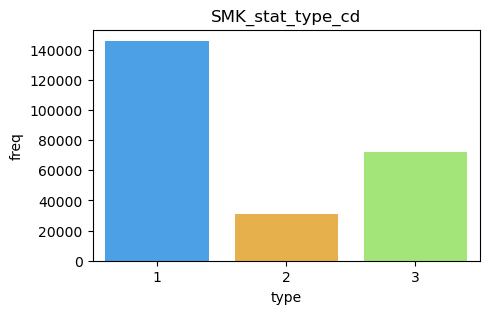

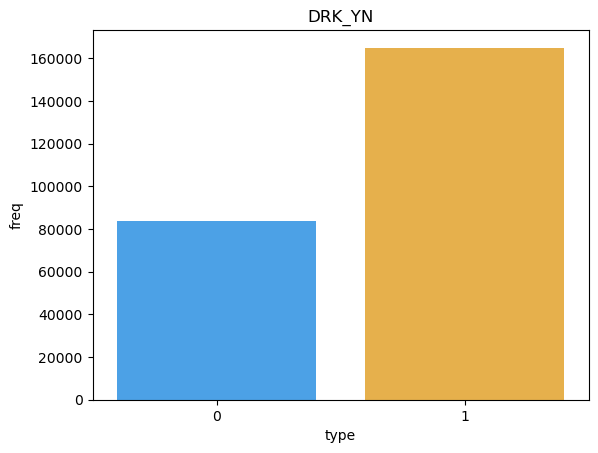

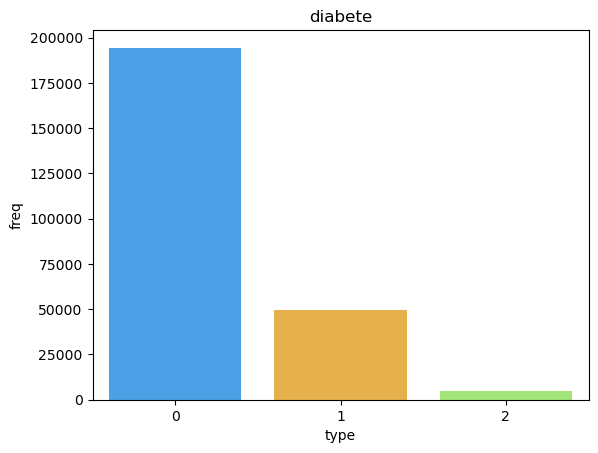

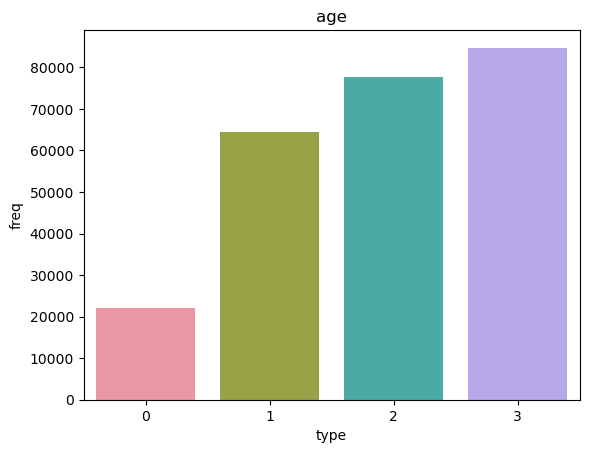

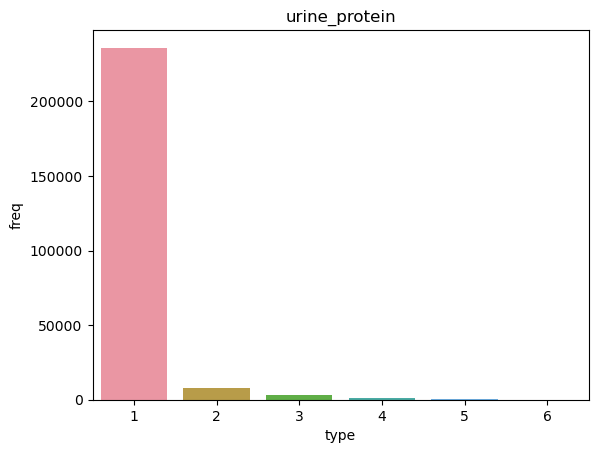

In [9]:
cate_list = ["SMK_stat_type_cd", "DRK_YN", "sex", "diabete", "hear_left", "hear_right", "age", "urine_protein"]

fig, ax = plt.subplots(1, figsize=(5, 3))

for i in range(len(cate_list)):
    freq = df_2030[cate_list[i]].value_counts().reset_index()
    freq.columns = ['type','freq']
    sns.barplot(x = "type", y = "freq", data = freq)
    plt.title(cate_list[i])
    plt.show()

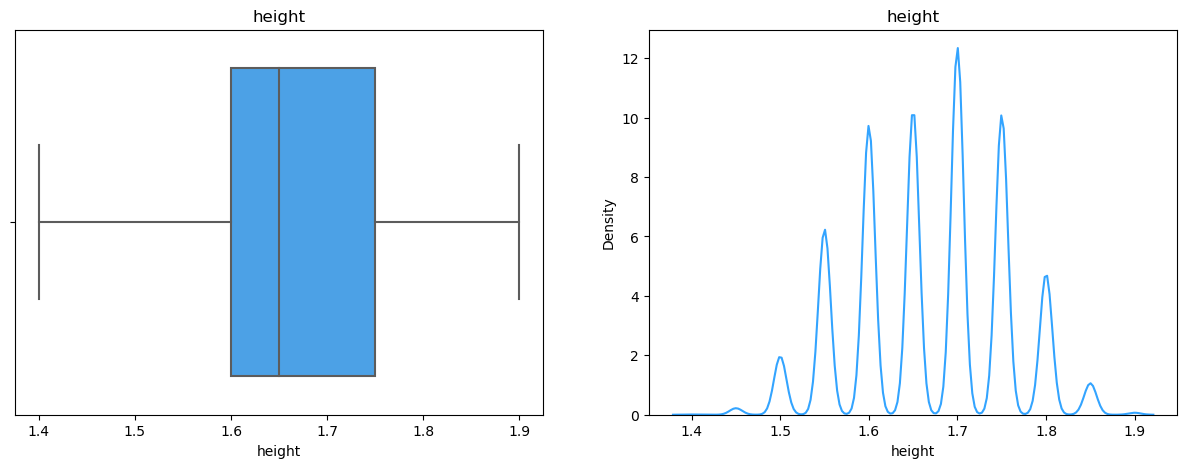

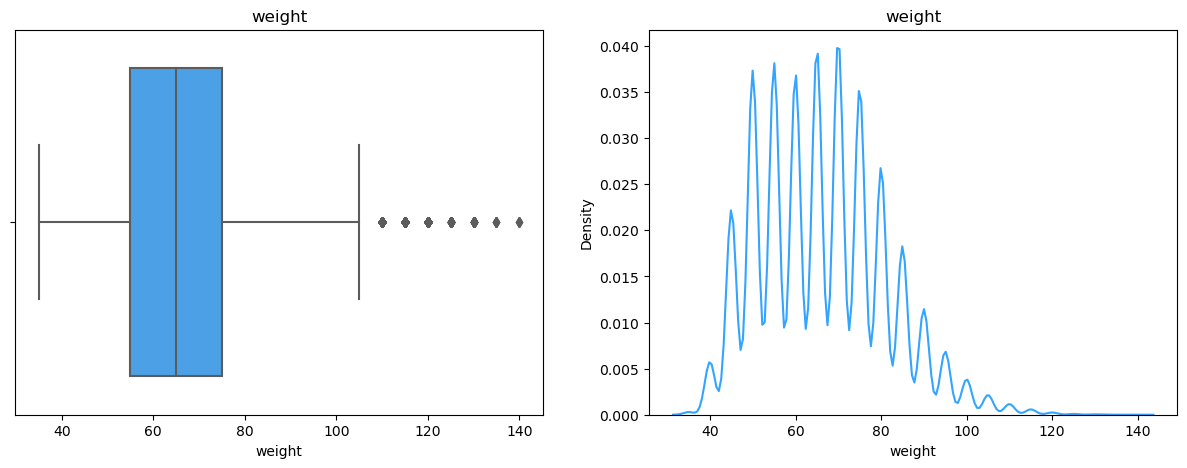

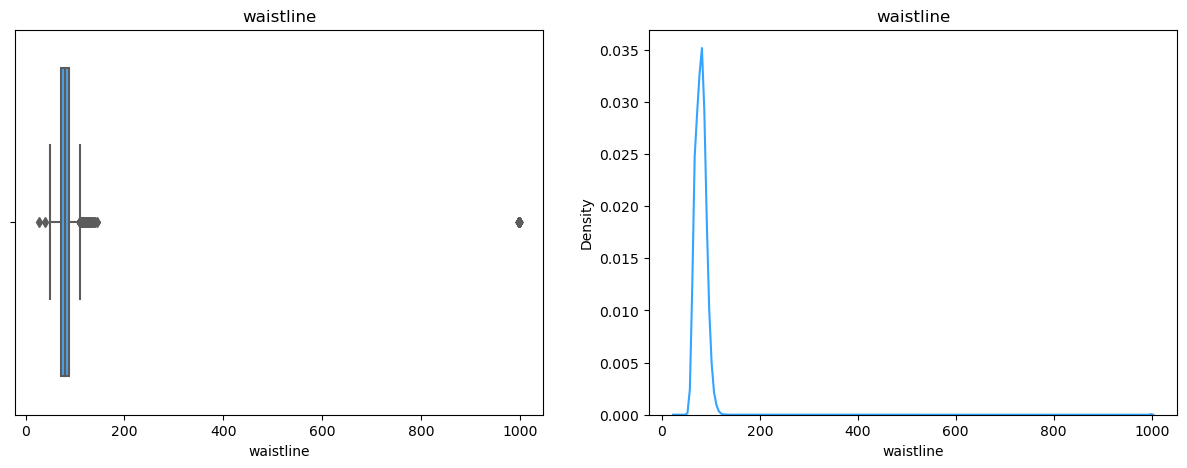

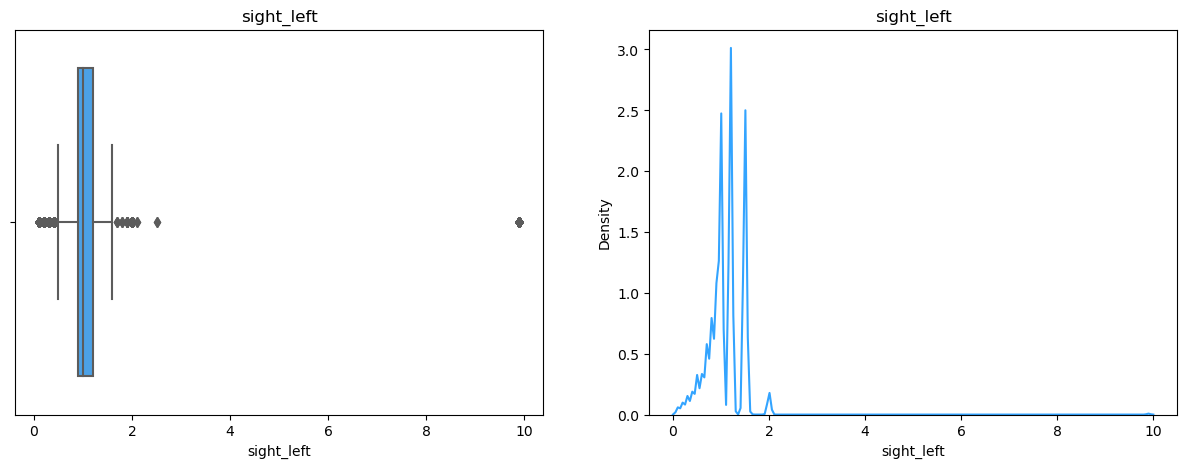

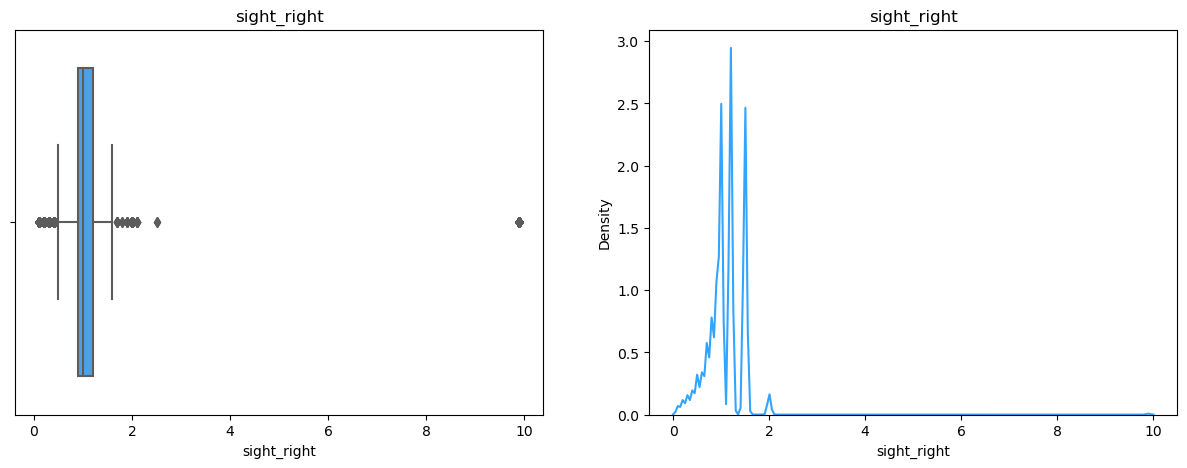

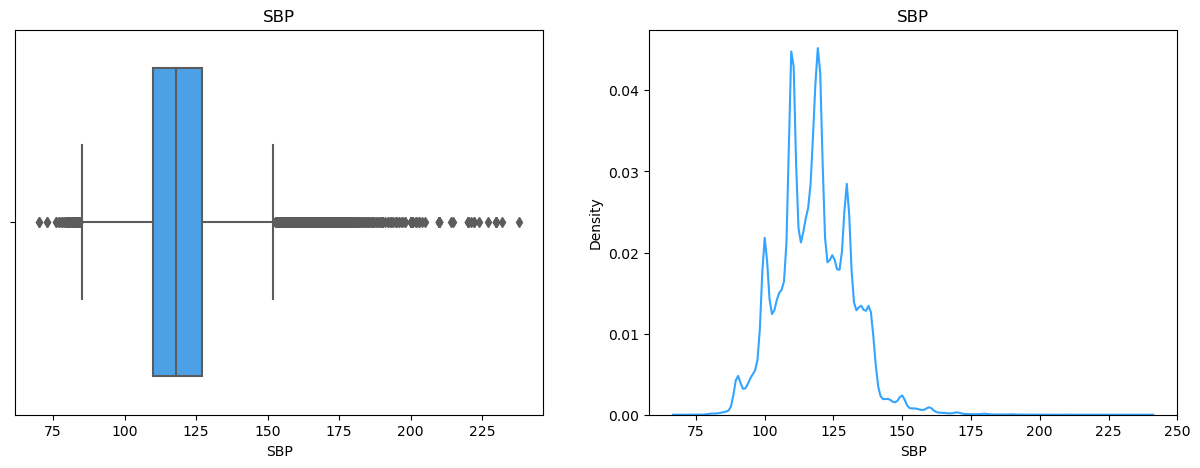

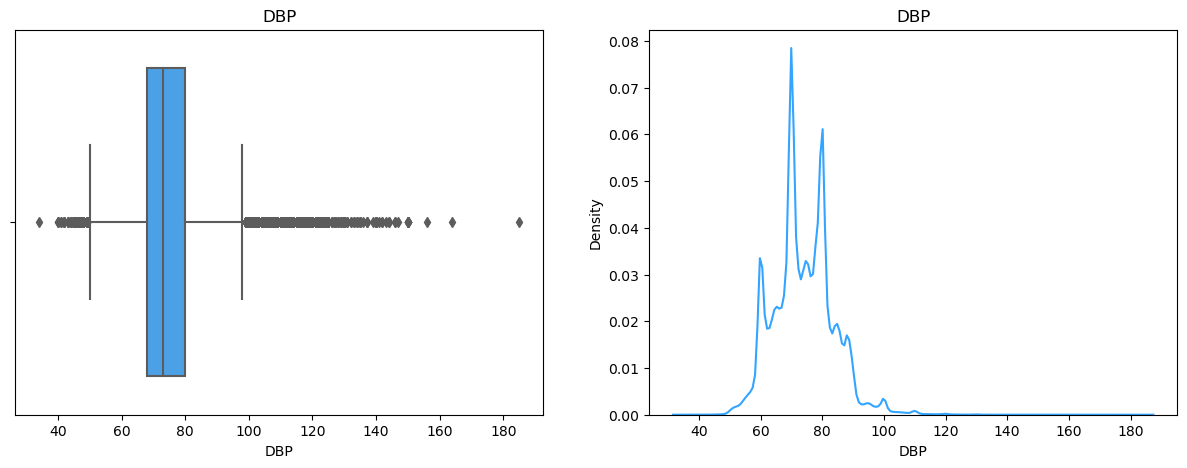

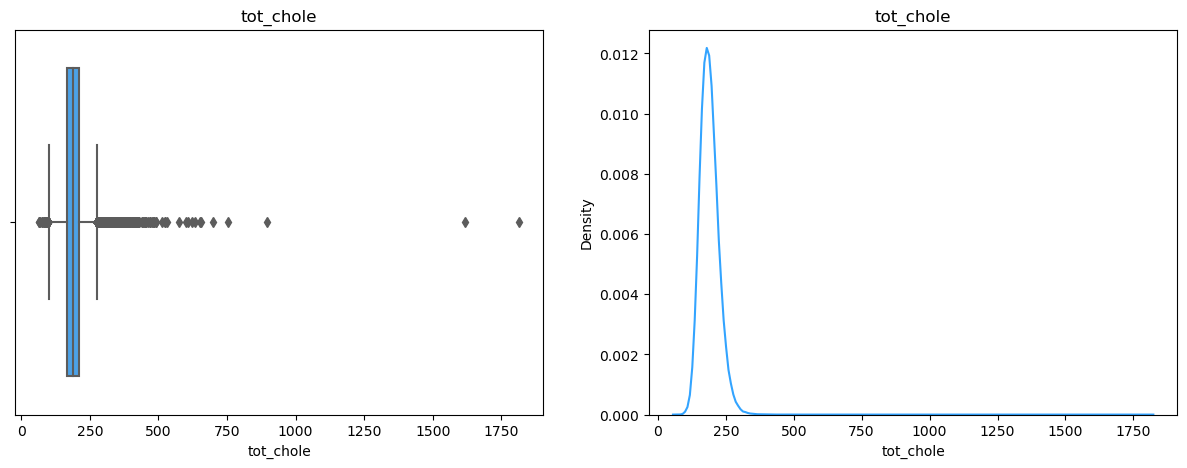

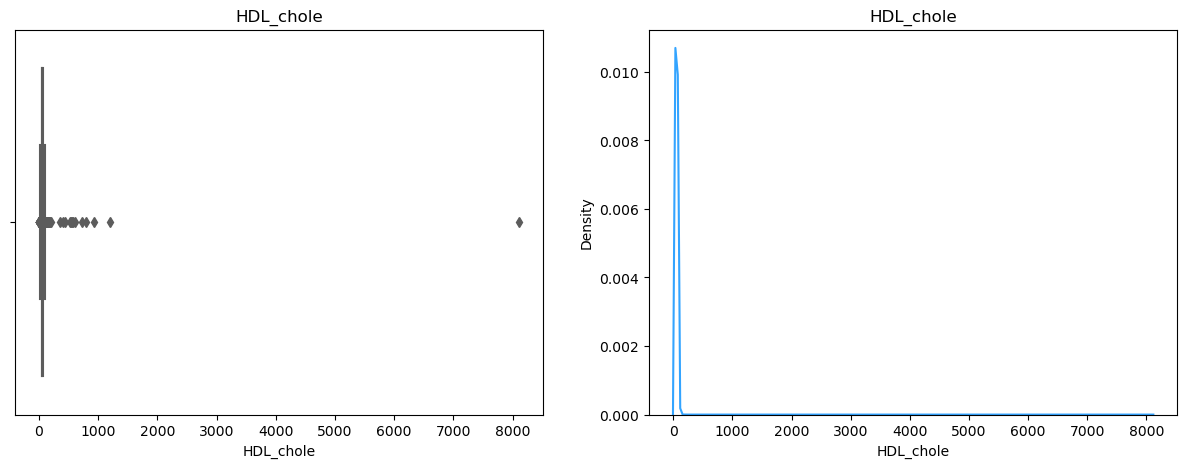

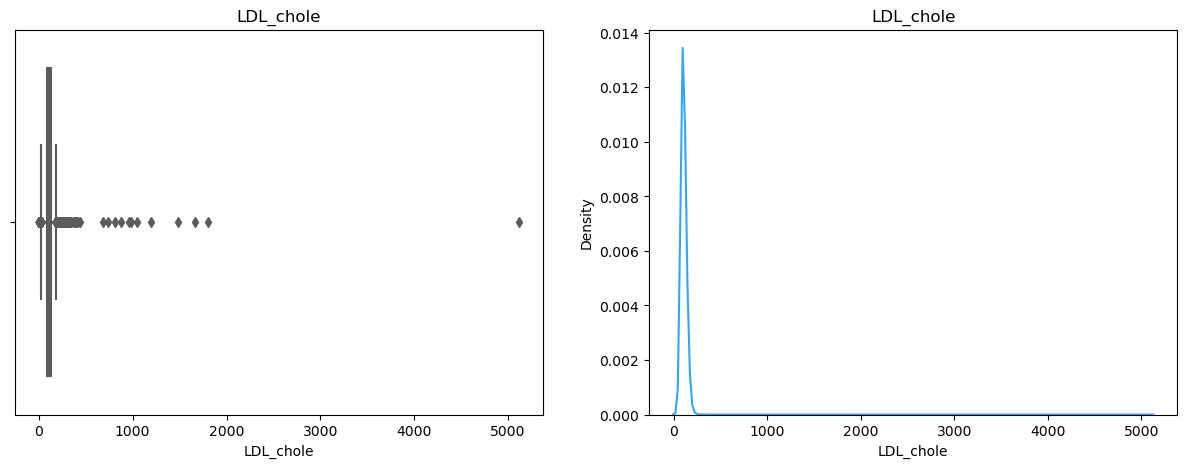

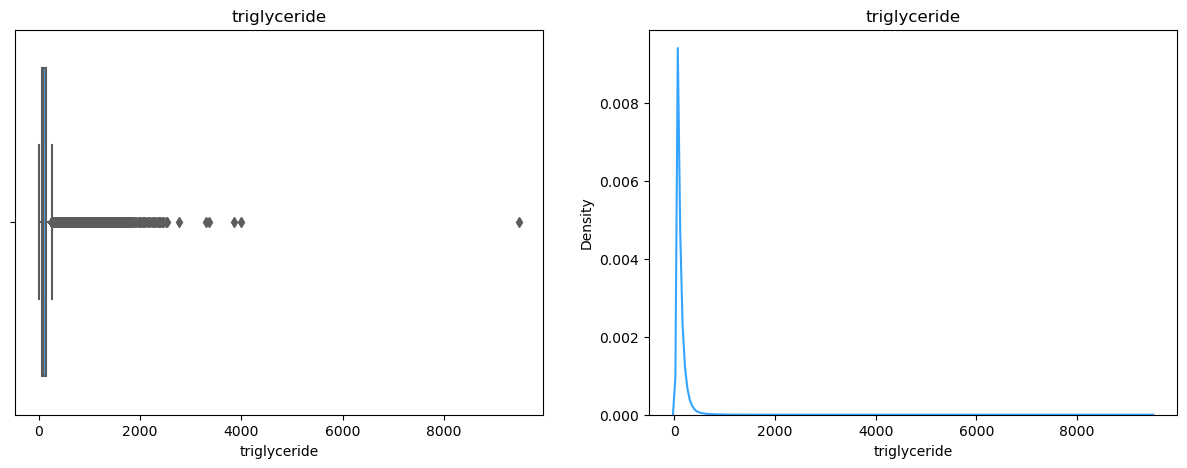

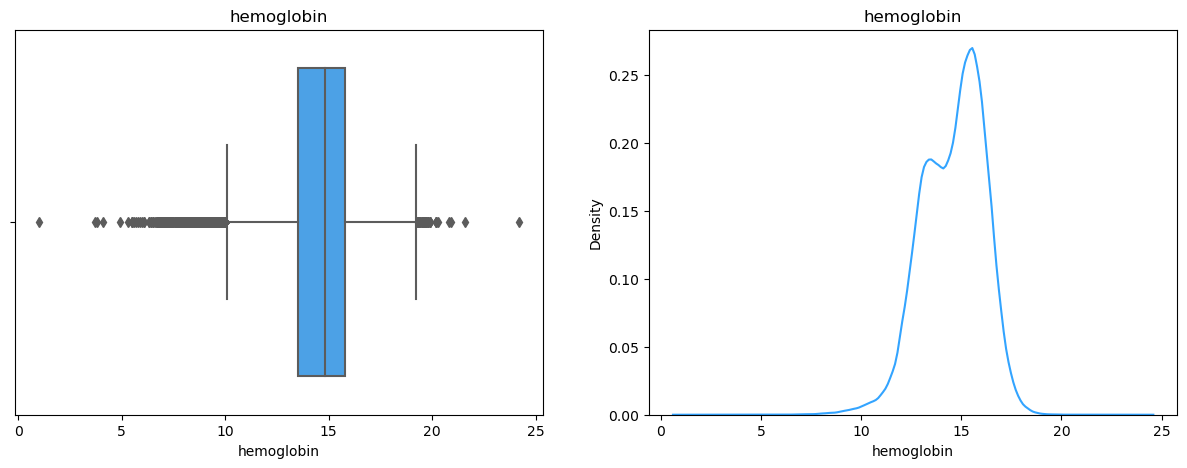

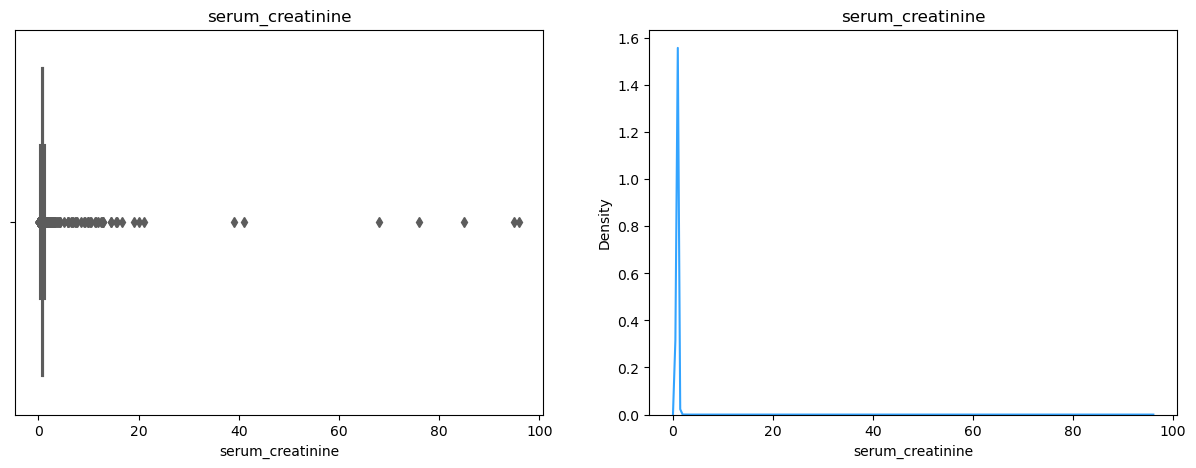

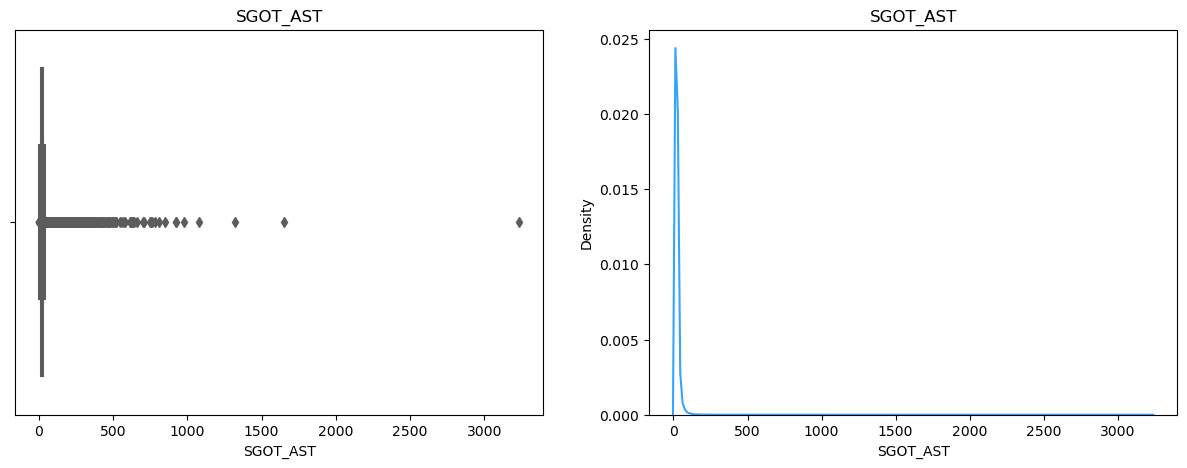

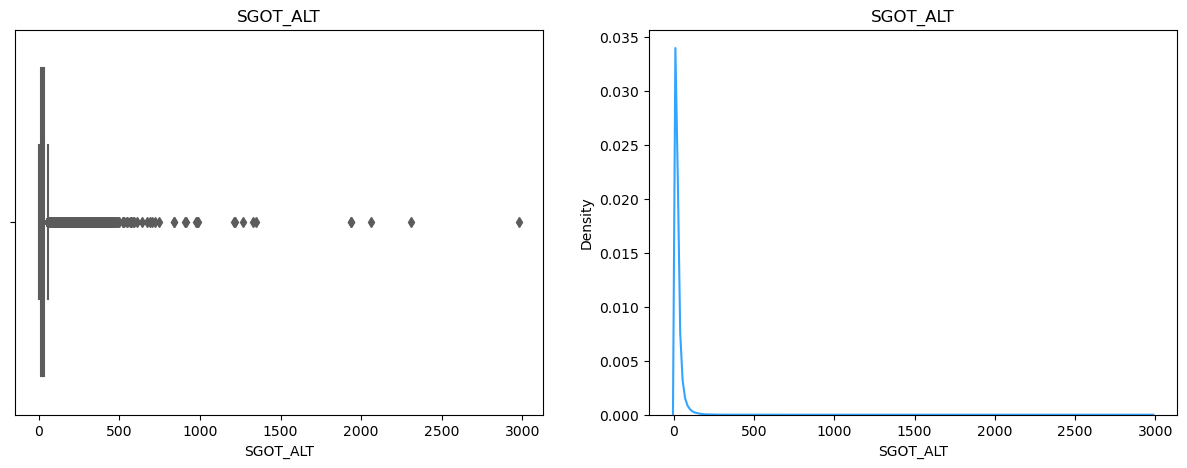

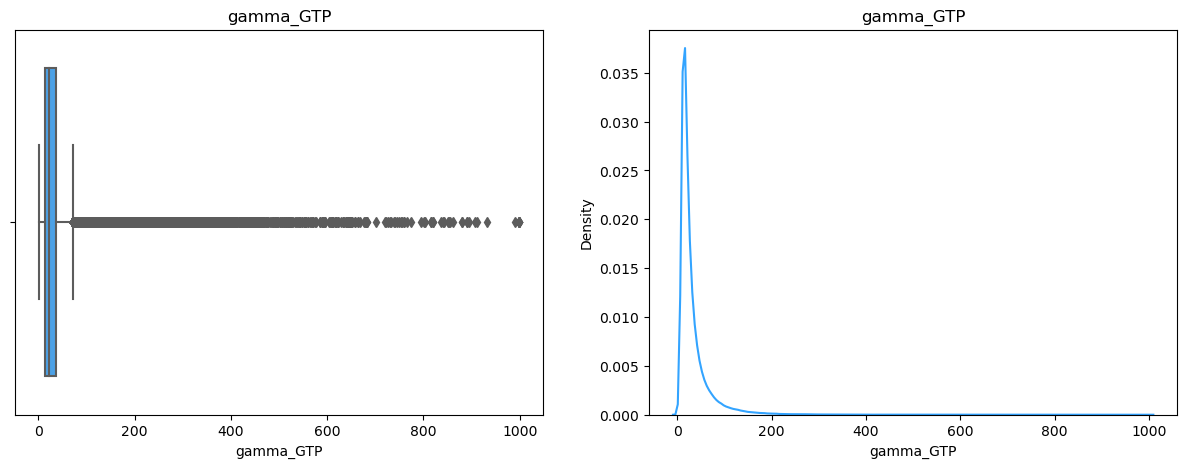

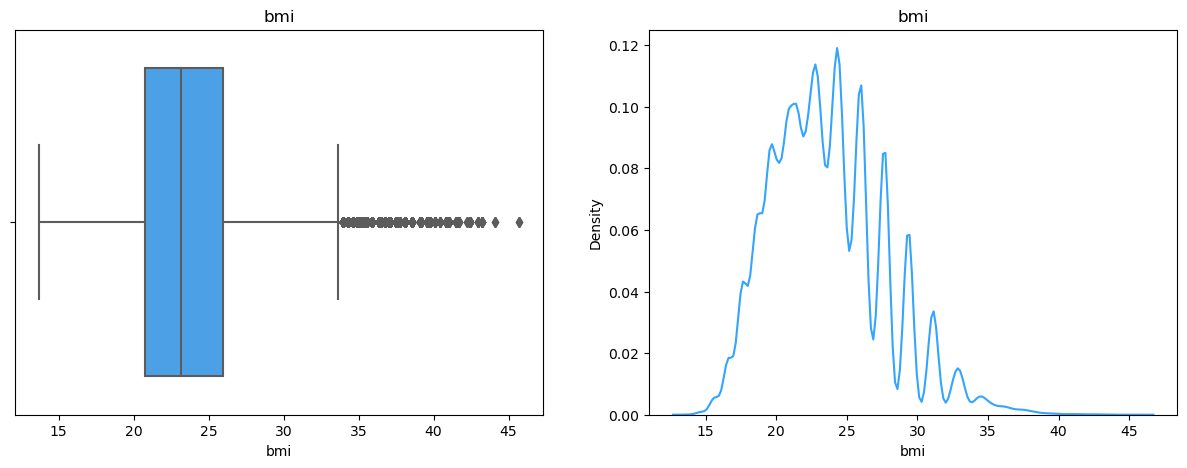

In [13]:
# 연속변인: 박스플롯과 히스토그램
for col in df_2030.drop(cate_list, axis = 1).columns:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    sns.boxplot(data = df_2030, x = col, ax=axes[0])
    axes[0].set_title(col)
    
    sns.kdeplot(data = df_2030, x = col, ax=axes[1])
    axes[1].set_title(col)
    
    plt.show()

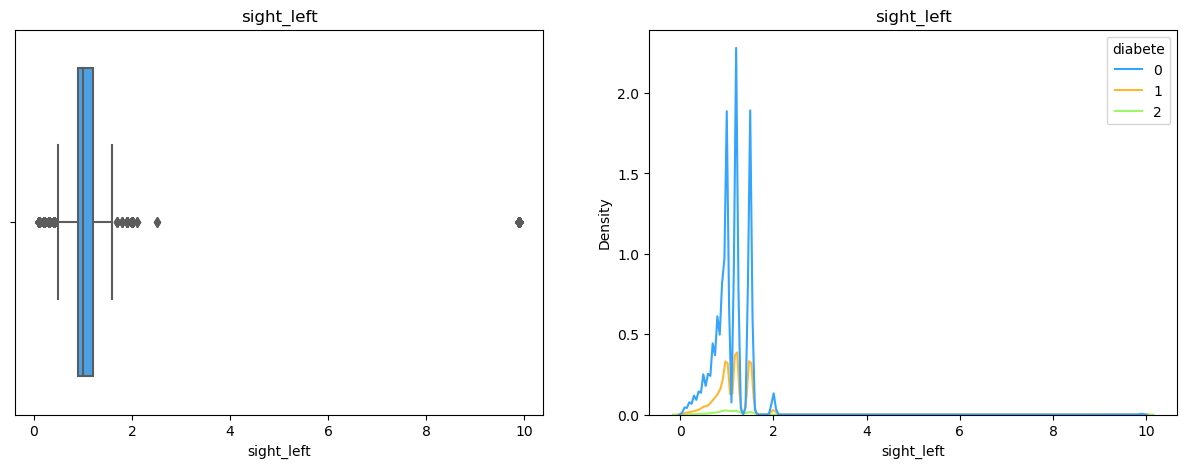

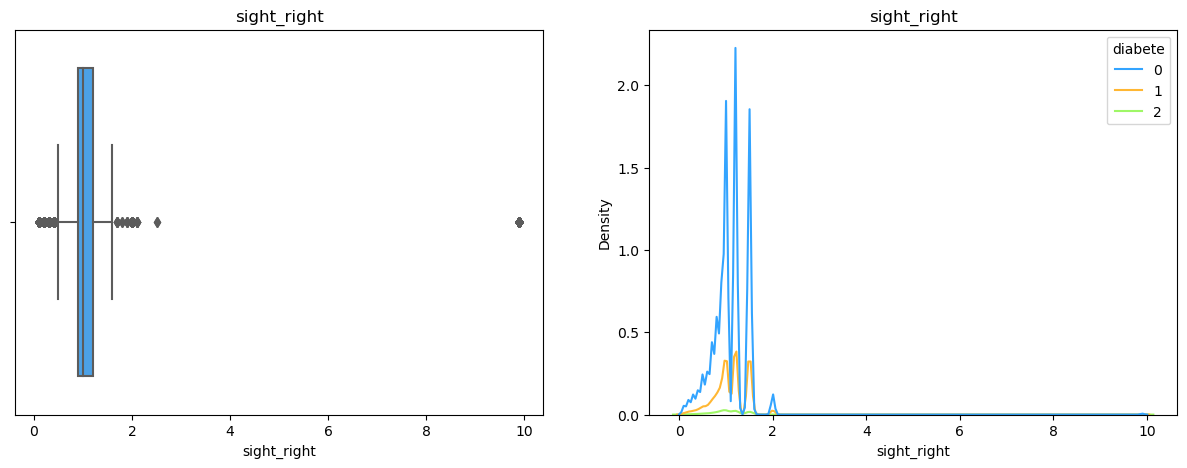

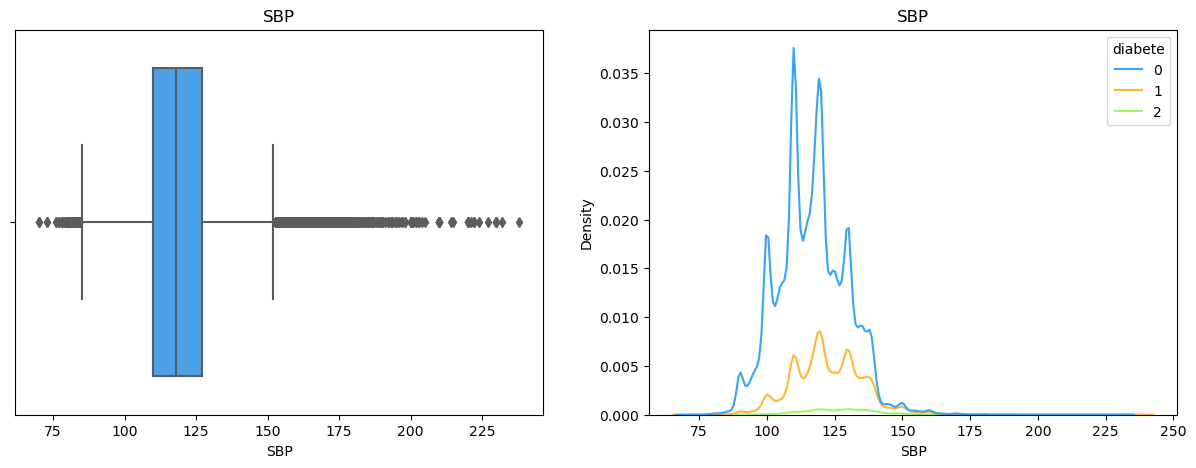

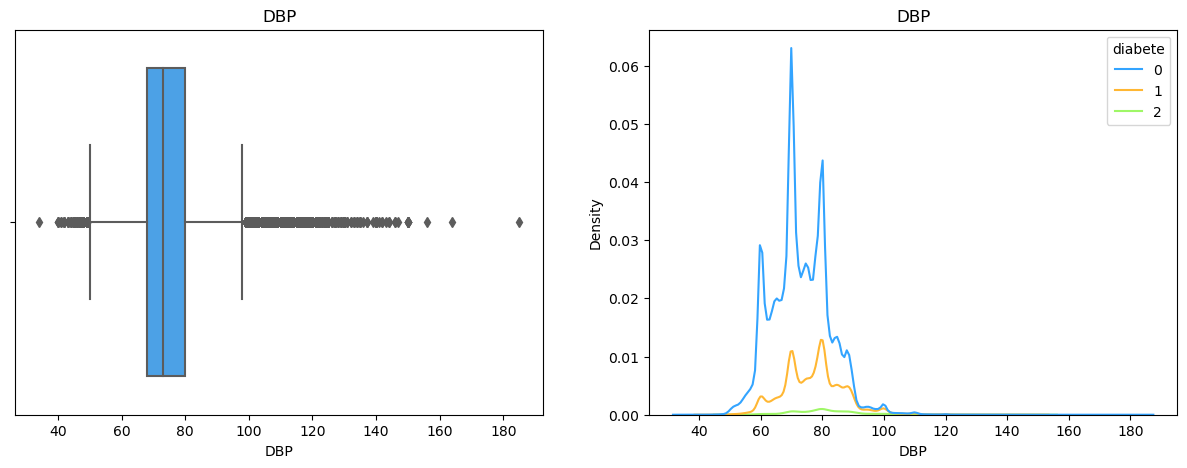

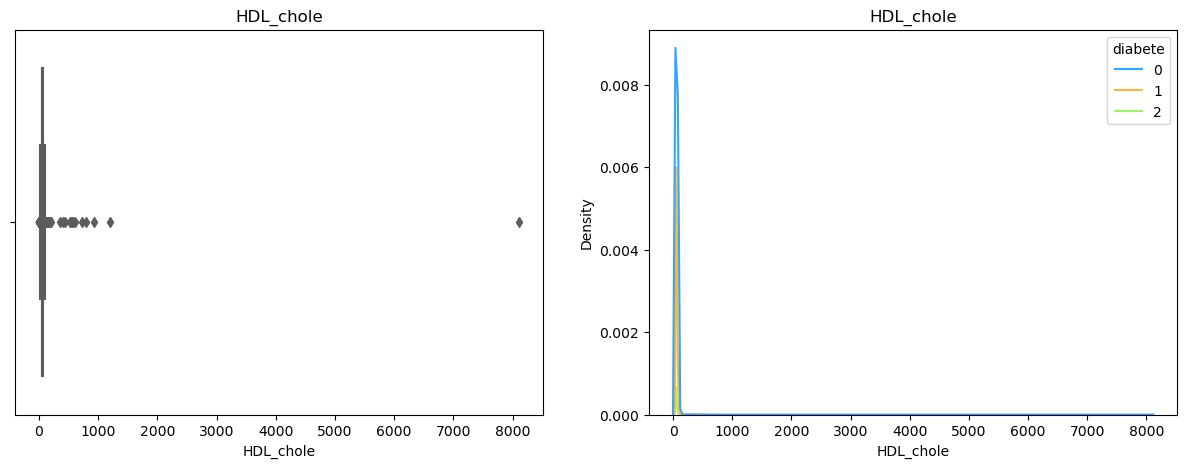

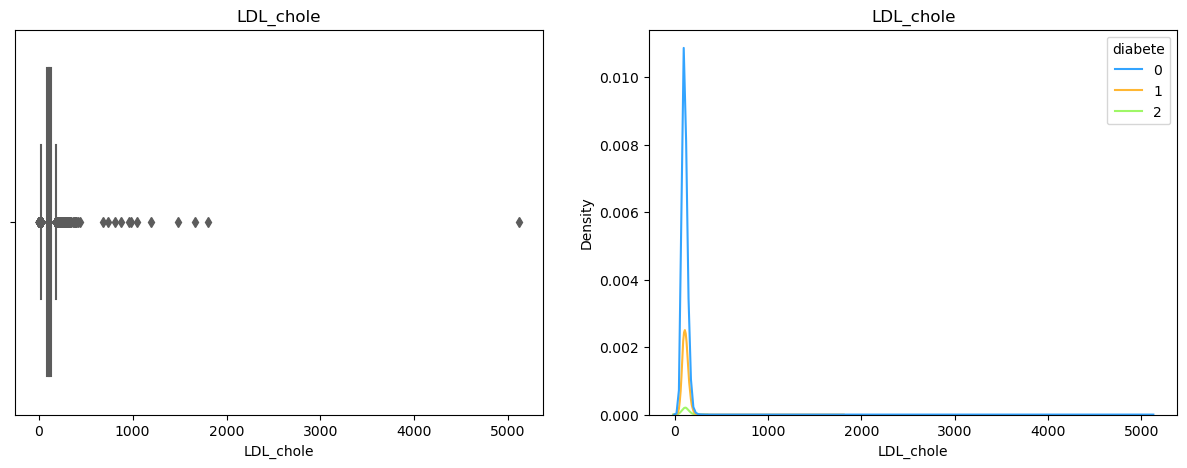

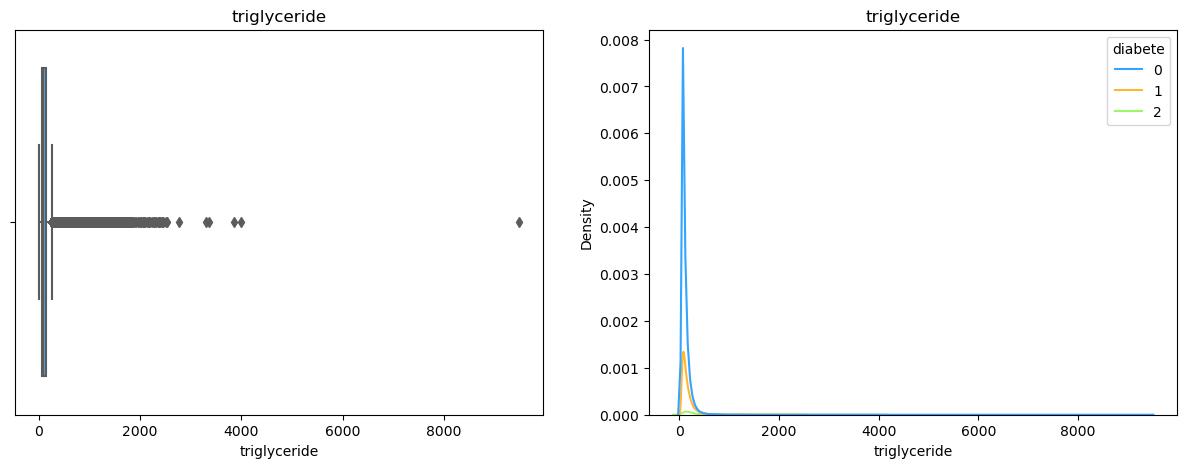

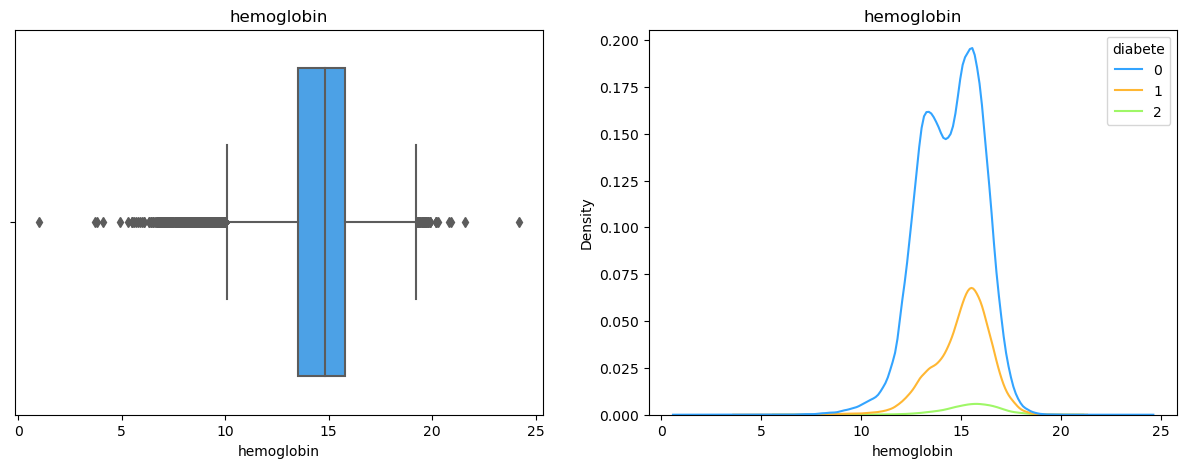

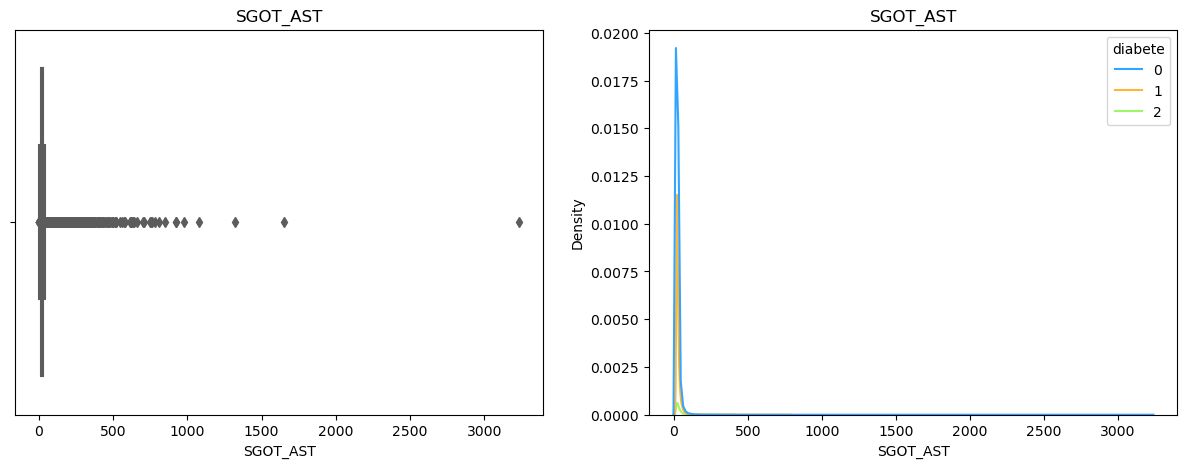

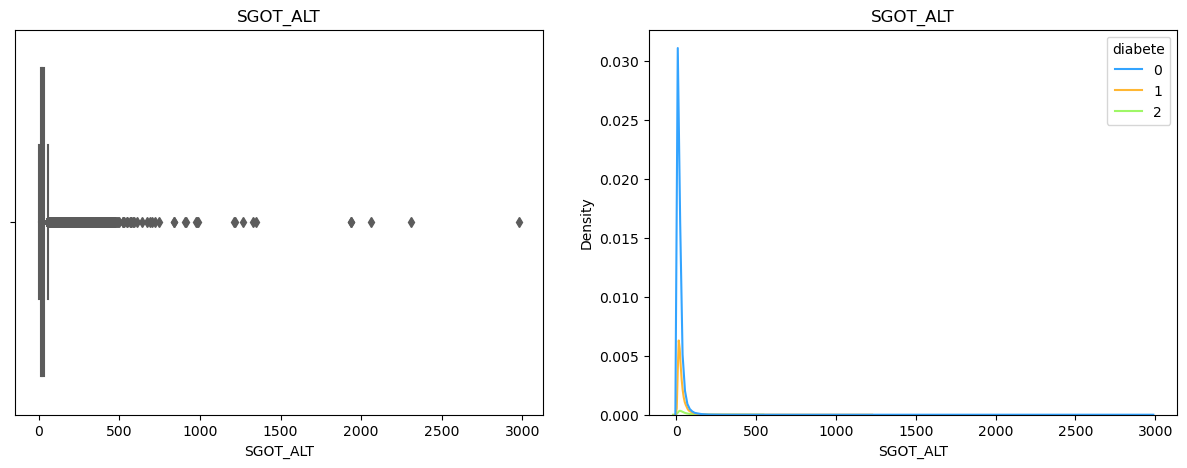

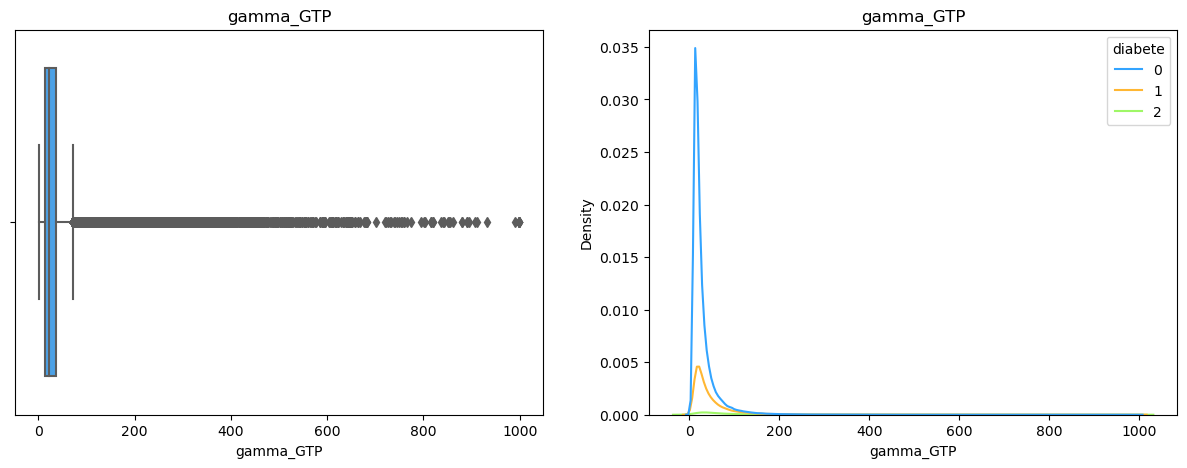

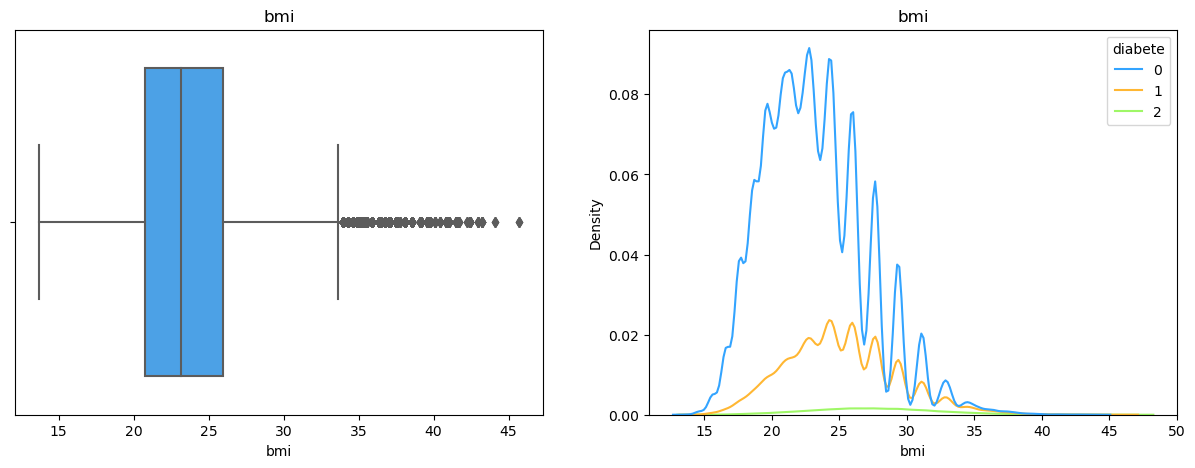

In [10]:
# 연속변인: 범주형 종속변인(diabete)에 따른 박스플롯과 히스토그램
for col in df_2030.drop(cate_list, axis = 1).columns:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    sns.boxplot(data = df_2030, x = col, hue = "diabete", ax=axes[0], palette=custom_palette)
    axes[0].set_title(col)
    
    sns.kdeplot(data = df_2030, x = col, hue = "diabete", ax=axes[1], palette=custom_palette)
    axes[1].set_title(col)
    
    plt.show()

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
0         3         1.0          1.0  120.0  80.0       48.0      126.0   
1         2         0.9          1.2  130.0  82.0       55.0      148.0   
2         3         1.2          1.0  132.0  80.0       58.0      107.0   
3         2         1.2          1.2  118.0  72.0       55.0      129.0   
4         2         0.9          1.0  129.0  77.0       53.0      108.0   
...     ...         ...          ...    ...   ...        ...        ...   
248662    3         0.7          0.9  110.0  80.0       57.0      140.0   
248663    3         1.0          1.0  113.0  69.0       63.0       92.0   
248664    0         1.0          1.5  105.0  70.0       72.0      120.0   
248665    3         1.0          1.5  119.0  83.0       40.0       84.0   
248666    1         1.5          1.0  119.0  74.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
0               92.0        17.1              1      21.0      35.0   
1              121.0        15.8              1      20.0      36.0   
2              101.0        14.4              1      18.0      18.0   
3               77.0        15.7              1      13.0      16.0   
4              219.0        14.5              1      21.0      24.0   
...              ...         ...            ...       ...       ...   
248662          59.0        12.9              1      25.0      12.0   
248663          88.0        13.3              1      20.0      17.0   
248664          92.0        15.4              1      25.0      26.0   
248665          45.0        15.8              1      14.0      17.0   
248666          53.0        14.5              1      21.0      14.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0            40.0                 1       1        0  25.951557  
1            27.0                 3       0        1  24.691358  
2            35.0                 3       1        0  21.224490  
3            19.0                 1       1        0  24.489796  
4            58.0                 1       0        0  19.531250  
...           ...               ...     ...      ...        ...  
248662       13.0                 1       1        0  27.055151  
248663       12.0                 1       0        0  25.711662  
248664       50.0                 2       1        0  21.224490  
248665       15.0                 1       0        0  25.951557  
248666       17.0                 1       0        0  19.591837  

[248631 rows x 17 columns]

<AxesSubplot:xlabel='hemoglobin', ylabel='Density'>

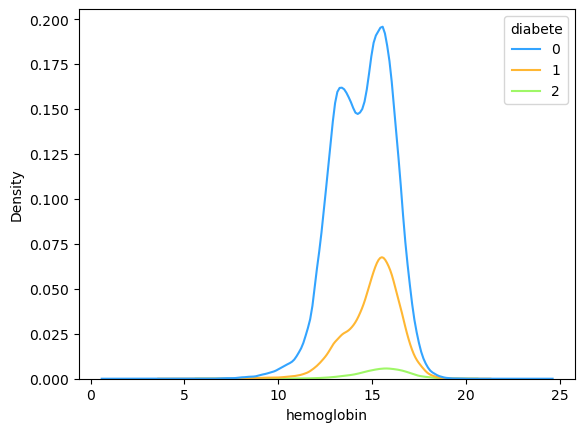

In [19]:
sns.kdeplot(data = df_2030[df_2030["triglyceride"]<1000], x = "hemoglobin", hue = "diabete", palette=custom_palette)

In [14]:
df_2030

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1    3    1.70      75       90.0         1.0          1.0   
1         1    2    1.80      80       89.0         0.9          1.2   
7         1    3    1.75      65       84.2         1.2          1.0   
13        1    2    1.75      75       88.0         1.2          1.2   
14        0    2    1.60      50       76.0         0.9          1.0   
...     ...  ...     ...     ...        ...         ...          ...   
991333    0    3    1.55      65       70.0         0.7          0.9   
991337    0    3    1.65      70       81.0         1.0          1.0   
991338    1    0    1.75      65       74.5         1.0          1.5   
991342    1    3    1.70      75       86.0         1.0          1.5   
991344    1    1    1.75      60       72.0         1.5          1.0   

        hear_left  hear_right    SBP   DBP  tot_chole  HDL_chole  LDL_chole  \
0               0           0  120.0  80.0      193.0       48.0      126.0   
1               0           0  130.0  82.0      228.0       55.0      148.0   
7               0           0  132.0  80.0      185.0       58.0      107.0   
13              0           0  118.0  72.0      200.0       55.0      129.0   
14              0           0  129.0  77.0      205.0       53.0      108.0   
...           ...         ...    ...   ...        ...        ...        ...   
991333          0           0  110.0  80.0      209.0       57.0      140.0   
991337          0           0  113.0  69.0      173.0       63.0       92.0   
991338          0           0  105.0  70.0      211.0       72.0      120.0   
991342          0           0  119.0  83.0      133.0       40.0       84.0   
991344          0           0  119.0  74.0      122.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1              1               1.0      21.0   
1              121.0        15.8              1               0.9      20.0   
7              101.0        14.4              1               0.8      18.0   
13              77.0        15.7              1               0.9      13.0   
14             219.0        14.5              1               0.6      21.0   
...              ...         ...            ...               ...       ...   
991333          59.0        12.9              1               1.0      25.0   
991337          88.0        13.3              1               0.7      20.0   
991338          92.0        15.4              1               0.8      25.0   
991342          45.0        15.8              1               1.1      14.0   
991344          53.0        14.5              1               0.8      21.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0           35.0       40.0                 1       1        0  25.951557  
1           36.0       27.0                 3       0        1  24.691358  
7           18.0       35.0                 3       1        0  21.224490  
13          16.0       19.0                 1       1        0  24.489796  
14          24.0       58.0                 1       0        0  19.531250  
...          ...        ...               ...     ...      ...        ...  
991333      12.0       13.0                 1       1        0  27.055151  
991337      17.0       12.0                 1       0        0  25.711662  
991338      26.0       50.0                 2       1        0  21.224490  
991342      17.0       15.0                 1       0        0  25.951557  
991344      14.0       17.0                 1       0        0  19.591837  

[248667 rows x 25 columns]

In [15]:
df_2030 = df_2030.drop(['hear_left', 'hear_right'], axis = 1)
df_2030

sex  age  height  weight  waistline  sight_left  sight_right    SBP  \
0         1    3    1.70      75       90.0         1.0          1.0  120.0   
1         1    2    1.80      80       89.0         0.9          1.2  130.0   
7         1    3    1.75      65       84.2         1.2          1.0  132.0   
13        1    2    1.75      75       88.0         1.2          1.2  118.0   
14        0    2    1.60      50       76.0         0.9          1.0  129.0   
...     ...  ...     ...     ...        ...         ...          ...    ...   
991333    0    3    1.55      65       70.0         0.7          0.9  110.0   
991337    0    3    1.65      70       81.0         1.0          1.0  113.0   
991338    1    0    1.75      65       74.5         1.0          1.5  105.0   
991342    1    3    1.70      75       86.0         1.0          1.5  119.0   
991344    1    1    1.75      60       72.0         1.5          1.0  119.0   

         DBP  tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0       80.0      193.0       48.0      126.0          92.0        17.1   
1       82.0      228.0       55.0      148.0         121.0        15.8   
7       80.0      185.0       58.0      107.0         101.0        14.4   
13      72.0      200.0       55.0      129.0          77.0        15.7   
14      77.0      205.0       53.0      108.0         219.0        14.5   
...      ...        ...        ...        ...           ...         ...   
991333  80.0      209.0       57.0      140.0          59.0        12.9   
991337  69.0      173.0       63.0       92.0          88.0        13.3   
991338  70.0      211.0       72.0      120.0          92.0        15.4   
991342  83.0      133.0       40.0       84.0          45.0        15.8   
991344  74.0      122.0       38.0       73.0          53.0        14.5   

        urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0                   1               1.0      21.0      35.0       40.0   
1                   1               0.9      20.0      36.0       27.0   
7                   1               0.8      18.0      18.0       35.0   
13                  1               0.9      13.0      16.0       19.0   
14                  1               0.6      21.0      24.0       58.0   
...               ...               ...       ...       ...        ...   
991333              1               1.0      25.0      12.0       13.0   
991337              1               0.7      20.0      17.0       12.0   
991338              1               0.8      25.0      26.0       50.0   
991342              1               1.1      14.0      17.0       15.0   
991344              1               0.8      21.0      14.0       17.0   

        SMK_stat_type_cd  DRK_YN  diabete        bmi  
0                      1       1        0  25.951557  
1                      3       0        1  24.691358  
7                      3       1        0  21.224490  
13                     1       1        0  24.489796  
14                     1       0        0  19.531250  
...                  ...     ...      ...        ...  
991333                 1       1        0  27.055151  
991337                 1       0        0  25.711662  
991338                 2       1        0  21.224490  
991342                 1       0        0  25.951557  
991344                 1       0        0  19.591837  

[248667 rows x 23 columns]

<AxesSubplot:>

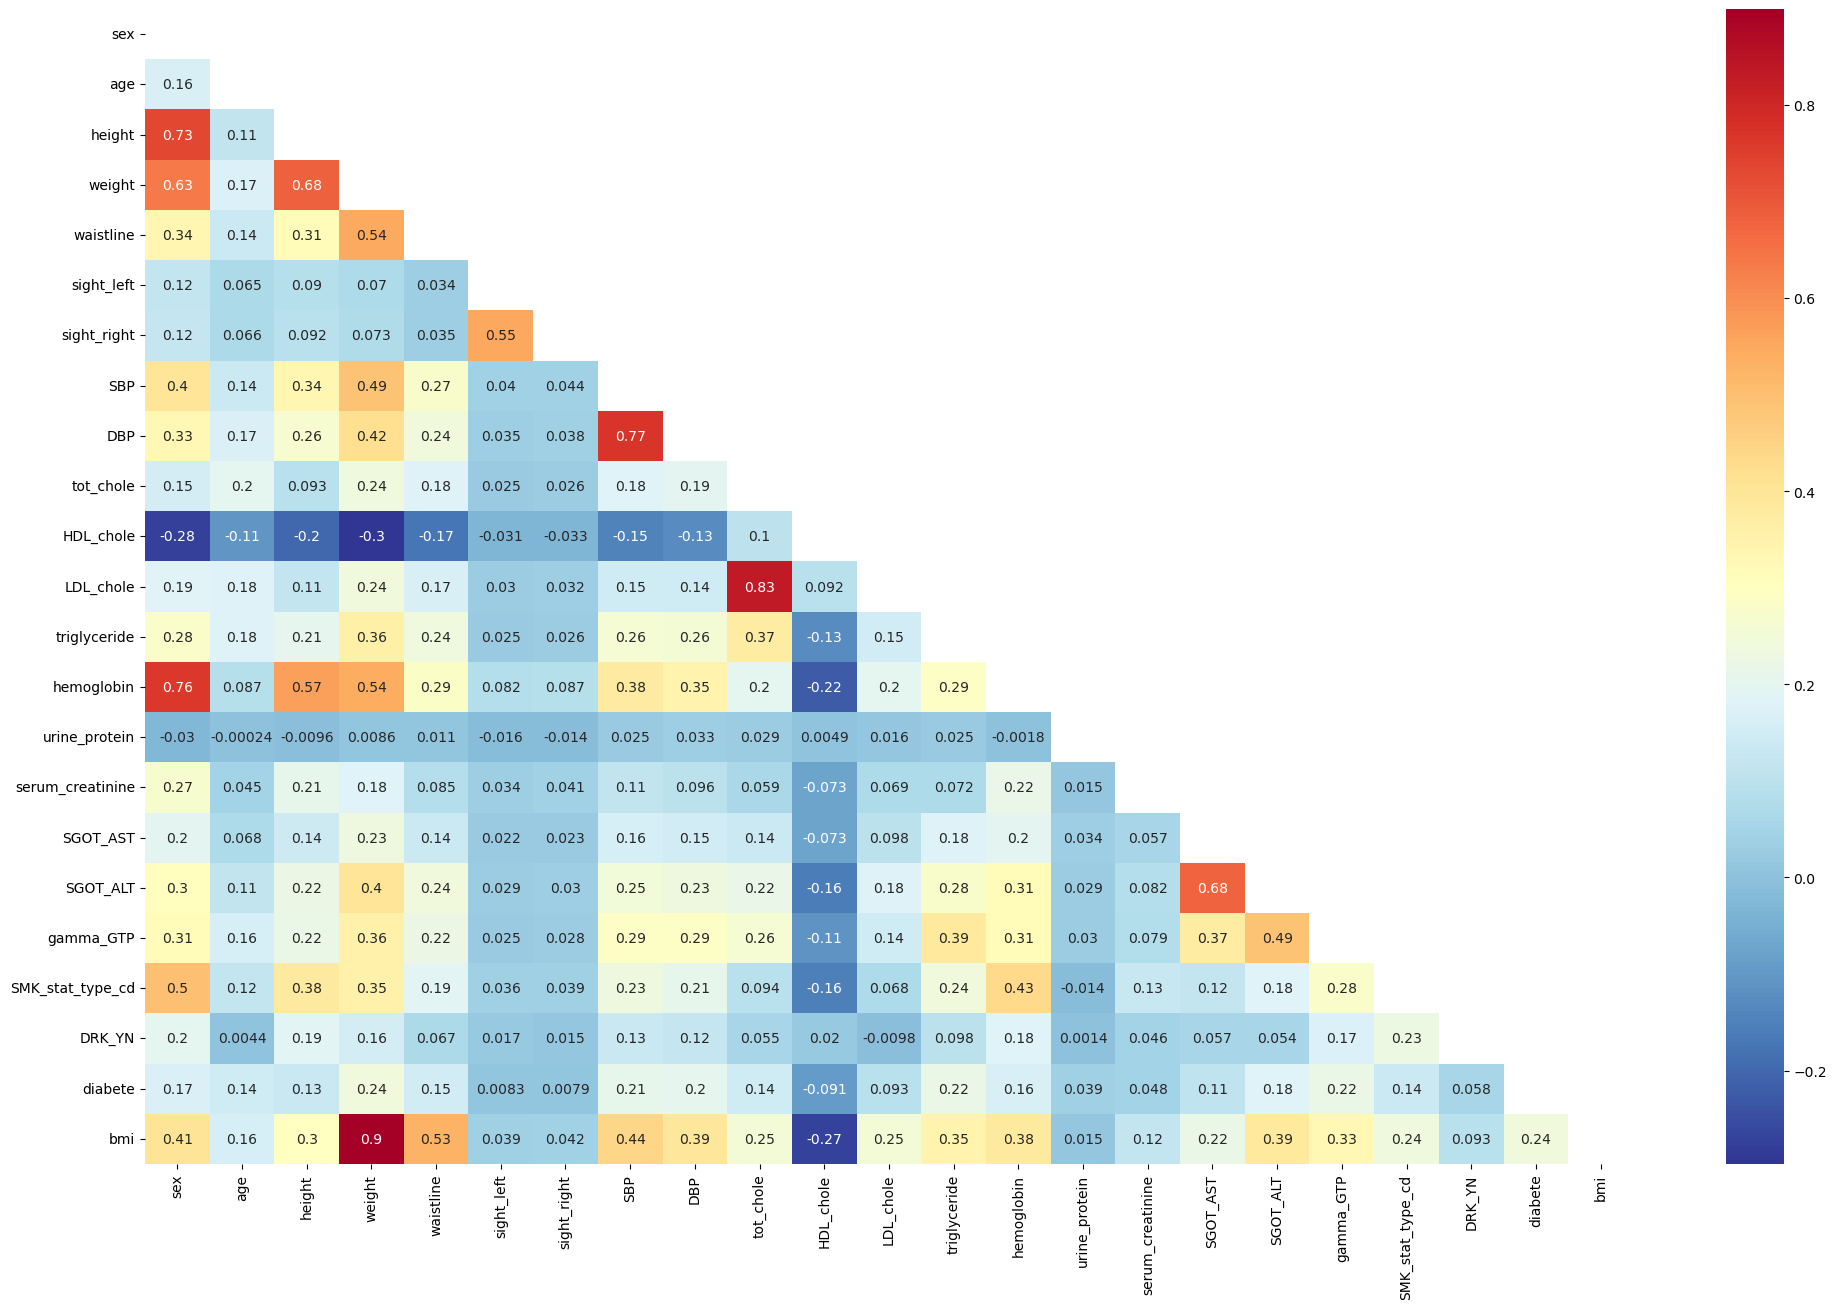

In [16]:
plt.figure(figsize=(24, 15))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.triu(np.ones_like(df_2030.corr(), dtype=bool))

sns.heatmap(df_2030.corr(),
            cmap = 'RdYlBu_r',
            mask=mask,
            annot=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_dropped = df_2030.drop("diabete", axis = 1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_2030.values, i) for i in range(df_2030.shape[1])]
vif["features"] = df_2030.columns
vif = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)
vif

VIF          features
0   319.762561            height
1   282.773217               bmi
2   255.603458            weight
3   226.733054        hemoglobin
4   225.928322               SBP
5   154.917893               DBP
6   134.177589         tot_chole
7    44.922641         LDL_chole
8    31.486510         waistline
9    11.819457        sight_left
10   11.513027       sight_right
11    9.637951     urine_protein
12    9.636178               sex
13    9.293961         HDL_chole
14    6.616606  SMK_stat_type_cd
15    5.407090               age
16    5.253911          SGOT_AST
17    4.947000  serum_creatinine
18    4.399005          SGOT_ALT
19    3.569323      triglyceride
20    3.294556            DRK_YN
21    2.751331         gamma_GTP
22    1.410512           diabete

<AxesSubplot:xlabel='VIF', ylabel='features'>

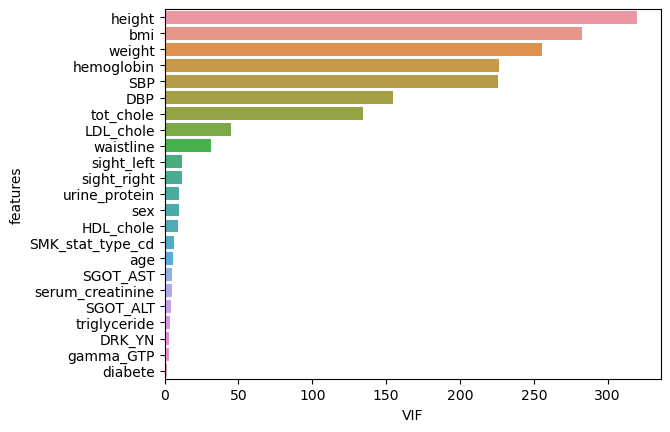

In [18]:
sns.barplot(data = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True),
           y = "features",
           x = "VIF")

In [19]:
# 데이터 준비
# X: 독립변수 데이터프레임, y: 종속변수 시리즈
X = df_2030.drop(['diabete'], axis=1)  #
y = df_2030['diabete']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 라쏘 회귀 모델 생성 및 학습
lasso_cv = LassoCV(cv=10)
lasso_cv.fit(X_scaled, y)

# 최적의 알파 출력
print('최적의 알파: ', lasso_cv.alpha_)

# 계수가 0인 특성 추출
zero_coef_features = X.columns[lasso_cv.coef_ == 0]
print('제거할 특성: ', zero_coef_features)

최적의 알파:  0.0005295667161157412
제거할 특성:  Index(['sex', 'height', 'waistline'], dtype='object')


In [20]:
df_2030 = df_2030.drop(['sex', 'height', 'waistline'], axis = 1)
df_2030

age  weight  sight_left  sight_right    SBP   DBP  tot_chole  \
0         3      75         1.0          1.0  120.0  80.0      193.0   
1         2      80         0.9          1.2  130.0  82.0      228.0   
7         3      65         1.2          1.0  132.0  80.0      185.0   
13        2      75         1.2          1.2  118.0  72.0      200.0   
14        2      50         0.9          1.0  129.0  77.0      205.0   
...     ...     ...         ...          ...    ...   ...        ...   
991333    3      65         0.7          0.9  110.0  80.0      209.0   
991337    3      70         1.0          1.0  113.0  69.0      173.0   
991338    0      65         1.0          1.5  105.0  70.0      211.0   
991342    3      75         1.0          1.5  119.0  83.0      133.0   
991344    1      60         1.5          1.0  119.0  74.0      122.0   

        HDL_chole  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0            48.0      126.0          92.0        17.1              1   
1            55.0      148.0         121.0        15.8              1   
7            58.0      107.0         101.0        14.4              1   
13           55.0      129.0          77.0        15.7              1   
14           53.0      108.0         219.0        14.5              1   
...           ...        ...           ...         ...            ...   
991333       57.0      140.0          59.0        12.9              1   
991337       63.0       92.0          88.0        13.3              1   
991338       72.0      120.0          92.0        15.4              1   
991342       40.0       84.0          45.0        15.8              1   
991344       38.0       73.0          53.0        14.5              1   

        serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  \
0                    1.0      21.0      35.0       40.0                 1   
1                    0.9      20.0      36.0       27.0                 3   
7                    0.8      18.0      18.0       35.0                 3   
13                   0.9      13.0      16.0       19.0                 1   
14                   0.6      21.0      24.0       58.0                 1   
...                  ...       ...       ...        ...               ...   
991333               1.0      25.0      12.0       13.0                 1   
991337               0.7      20.0      17.0       12.0                 1   
991338               0.8      25.0      26.0       50.0                 2   
991342               1.1      14.0      17.0       15.0                 1   
991344               0.8      21.0      14.0       17.0                 1   

        DRK_YN  diabete        bmi  
0            1        0  25.951557  
1            0        1  24.691358  
7            1        0  21.224490  
13           1        0  24.489796  
14           0        0  19.531250  
...        ...      ...        ...  
991333       1        0  27.055151  
991337       0        0  25.711662  
991338       1        0  21.224490  
991342       0        0  25.951557  
991344       0        0  19.591837  

[248667 rows x 20 columns]

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_dropped = df_2030.drop("diabete", axis = 1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_2030.values, i) for i in range(df_2030.shape[1])]
vif["features"] = df_2030.columns
vif = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)
vif

VIF          features
0   207.990393               SBP
1   179.372621               bmi
2   154.374515               DBP
3   138.926999            weight
4   119.648548         tot_chole
5   106.940949        hemoglobin
6    41.110090         LDL_chole
7    11.738782        sight_left
8    11.452779       sight_right
9     9.338317     urine_protein
10    8.552223         HDL_chole
11    6.315038  SMK_stat_type_cd
12    5.316434               age
13    5.224952          SGOT_AST
14    4.859927  serum_creatinine
15    4.329048          SGOT_ALT
16    3.384263      triglyceride
17    3.287449            DRK_YN
18    2.677040         gamma_GTP
19    1.396857           diabete

In [22]:
df_2030 = df_2030.drop(['weight', 'tot_chole'], axis = 1)
df_2030

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
0         3         1.0          1.0  120.0  80.0       48.0      126.0   
1         2         0.9          1.2  130.0  82.0       55.0      148.0   
7         3         1.2          1.0  132.0  80.0       58.0      107.0   
13        2         1.2          1.2  118.0  72.0       55.0      129.0   
14        2         0.9          1.0  129.0  77.0       53.0      108.0   
...     ...         ...          ...    ...   ...        ...        ...   
991333    3         0.7          0.9  110.0  80.0       57.0      140.0   
991337    3         1.0          1.0  113.0  69.0       63.0       92.0   
991338    0         1.0          1.5  105.0  70.0       72.0      120.0   
991342    3         1.0          1.5  119.0  83.0       40.0       84.0   
991344    1         1.5          1.0  119.0  74.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  serum_creatinine  SGOT_AST  \
0               92.0        17.1              1               1.0      21.0   
1              121.0        15.8              1               0.9      20.0   
7              101.0        14.4              1               0.8      18.0   
13              77.0        15.7              1               0.9      13.0   
14             219.0        14.5              1               0.6      21.0   
...              ...         ...            ...               ...       ...   
991333          59.0        12.9              1               1.0      25.0   
991337          88.0        13.3              1               0.7      20.0   
991338          92.0        15.4              1               0.8      25.0   
991342          45.0        15.8              1               1.1      14.0   
991344          53.0        14.5              1               0.8      21.0   

        SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0           35.0       40.0                 1       1        0  25.951557  
1           36.0       27.0                 3       0        1  24.691358  
7           18.0       35.0                 3       1        0  21.224490  
13          16.0       19.0                 1       1        0  24.489796  
14          24.0       58.0                 1       0        0  19.531250  
...          ...        ...               ...     ...      ...        ...  
991333      12.0       13.0                 1       1        0  27.055151  
991337      17.0       12.0                 1       0        0  25.711662  
991338      26.0       50.0                 2       1        0  21.224490  
991342      17.0       15.0                 1       0        0  25.951557  
991344      14.0       17.0                 1       0        0  19.591837  

[248667 rows x 18 columns]

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_dropped = df_2030.drop("diabete", axis = 1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(df_2030.values, i) for i in range(df_2030.shape[1])]
vif["features"] = df_2030.columns
vif = vif.sort_values(by = 'VIF', ascending=False).reset_index(drop=True)
vif

VIF          features
0   206.047418               SBP
1   153.444878               DBP
2    99.259938        hemoglobin
3    55.629719               bmi
4    13.404232         LDL_chole
5    11.730374        sight_left
6    11.448428       sight_right
7     9.205660     urine_protein
8     7.841642         HDL_chole
9     6.075031  SMK_stat_type_cd
10    5.291580               age
11    5.210835          SGOT_AST
12    4.819734  serum_creatinine
13    4.278365          SGOT_ALT
14    3.244953            DRK_YN
15    2.926736      triglyceride
16    2.660279         gamma_GTP
17    1.393967           diabete

In [24]:
# 데이터 준비
# X: 독립변수 데이터프레임, y: 종속변수 시리즈
X = df_2030.drop(['diabete'], axis=1)  # 'target'은 종속변수의 열 이름입니다.
y = df_2030['diabete']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 라쏘 회귀 모델 생성 및 학습
lasso_cv = LassoCV(cv=10)  # cv는 교차 검증에 사용할 부분의 개수
lasso_cv.fit(X_scaled, y)

# 최적의 알파 출력
print('최적의 알파: ', lasso_cv.alpha_)

# 계수가 0인 특성 추출
zero_coef_features = X.columns[lasso_cv.coef_ == 0]
print('제거할 특성: ', zero_coef_features)

최적의 알파:  0.001396843651022368
제거할 특성:  Index(['serum_creatinine'], dtype='object')


In [25]:
df_2030 = df_2030.drop(['serum_creatinine'], axis = 1)
df_2030

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
0         3         1.0          1.0  120.0  80.0       48.0      126.0   
1         2         0.9          1.2  130.0  82.0       55.0      148.0   
7         3         1.2          1.0  132.0  80.0       58.0      107.0   
13        2         1.2          1.2  118.0  72.0       55.0      129.0   
14        2         0.9          1.0  129.0  77.0       53.0      108.0   
...     ...         ...          ...    ...   ...        ...        ...   
991333    3         0.7          0.9  110.0  80.0       57.0      140.0   
991337    3         1.0          1.0  113.0  69.0       63.0       92.0   
991338    0         1.0          1.5  105.0  70.0       72.0      120.0   
991342    3         1.0          1.5  119.0  83.0       40.0       84.0   
991344    1         1.5          1.0  119.0  74.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
0               92.0        17.1              1      21.0      35.0   
1              121.0        15.8              1      20.0      36.0   
7              101.0        14.4              1      18.0      18.0   
13              77.0        15.7              1      13.0      16.0   
14             219.0        14.5              1      21.0      24.0   
...              ...         ...            ...       ...       ...   
991333          59.0        12.9              1      25.0      12.0   
991337          88.0        13.3              1      20.0      17.0   
991338          92.0        15.4              1      25.0      26.0   
991342          45.0        15.8              1      14.0      17.0   
991344          53.0        14.5              1      21.0      14.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0            40.0                 1       1        0  25.951557  
1            27.0                 3       0        1  24.691358  
7            35.0                 3       1        0  21.224490  
13           19.0                 1       1        0  24.489796  
14           58.0                 1       0        0  19.531250  
...           ...               ...     ...      ...        ...  
991333       13.0                 1       1        0  27.055151  
991337       12.0                 1       0        0  25.711662  
991338       50.0                 2       1        0  21.224490  
991342       15.0                 1       0        0  25.951557  
991344       17.0                 1       0        0  19.591837  

[248667 rows x 17 columns]

In [29]:
df_2030.to_csv("df_2030_ver_1.csv", index = False)

In [7]:
df_2030 = pd.read_csv("df_2030_ver_1.csv")
df

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
0         3         1.0          1.0  120.0  80.0       48.0      126.0   
1         2         0.9          1.2  130.0  82.0       55.0      148.0   
2         3         1.2          1.0  132.0  80.0       58.0      107.0   
3         2         1.2          1.2  118.0  72.0       55.0      129.0   
4         2         0.9          1.0  129.0  77.0       53.0      108.0   
...     ...         ...          ...    ...   ...        ...        ...   
248662    3         0.7          0.9  110.0  80.0       57.0      140.0   
248663    3         1.0          1.0  113.0  69.0       63.0       92.0   
248664    0         1.0          1.5  105.0  70.0       72.0      120.0   
248665    3         1.0          1.5  119.0  83.0       40.0       84.0   
248666    1         1.5          1.0  119.0  74.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
0               92.0        17.1              1      21.0      35.0   
1              121.0        15.8              1      20.0      36.0   
2              101.0        14.4              1      18.0      18.0   
3               77.0        15.7              1      13.0      16.0   
4              219.0        14.5              1      21.0      24.0   
...              ...         ...            ...       ...       ...   
248662          59.0        12.9              1      25.0      12.0   
248663          88.0        13.3              1      20.0      17.0   
248664          92.0        15.4              1      25.0      26.0   
248665          45.0        15.8              1      14.0      17.0   
248666          53.0        14.5              1      21.0      14.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0            40.0                 1       1        0  25.951557  
1            27.0                 3       0        1  24.691358  
2            35.0                 3       1        0  21.224490  
3            19.0                 1       1        0  24.489796  
4            58.0                 1       0        0  19.531250  
...           ...               ...     ...      ...        ...  
248662       13.0                 1       1        0  27.055151  
248663       12.0                 1       0        0  25.711662  
248664       50.0                 2       1        0  21.224490  
248665       15.0                 1       0        0  25.951557  
248666       17.0                 1       0        0  19.591837  

[248667 rows x 17 columns]

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
0         3         1.0          1.0  120.0  80.0       48.0      126.0   
1         2         0.9          1.2  130.0  82.0       55.0      148.0   
2         3         1.2          1.0  132.0  80.0       58.0      107.0   
3         2         1.2          1.2  118.0  72.0       55.0      129.0   
4         2         0.9          1.0  129.0  77.0       53.0      108.0   
...     ...         ...          ...    ...   ...        ...        ...   
248662    3         0.7          0.9  110.0  80.0       57.0      140.0   
248663    3         1.0          1.0  113.0  69.0       63.0       92.0   
248664    0         1.0          1.5  105.0  70.0       72.0      120.0   
248665    3         1.0          1.5  119.0  83.0       40.0       84.0   
248666    1         1.5          1.0  119.0  74.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
0               92.0        17.1              1      21.0      35.0   
1              121.0        15.8              1      20.0      36.0   
2              101.0        14.4              1      18.0      18.0   
3               77.0        15.7              1      13.0      16.0   
4              219.0        14.5              1      21.0      24.0   
...              ...         ...            ...       ...       ...   
248662          59.0        12.9              1      25.0      12.0   
248663          88.0        13.3              1      20.0      17.0   
248664          92.0        15.4              1      25.0      26.0   
248665          45.0        15.8              1      14.0      17.0   
248666          53.0        14.5              1      21.0      14.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0            40.0                 1       1        0  25.951557  
1            27.0                 3       0        1  24.691358  
2            35.0                 3       1        0  21.224490  
3            19.0                 1       1        0  24.489796  
4            58.0                 1       0        0  19.531250  
...           ...               ...     ...      ...        ...  
248662       13.0                 1       1        0  27.055151  
248663       12.0                 1       0        0  25.711662  
248664       50.0                 2       1        0  21.224490  
248665       15.0                 1       0        0  25.951557  
248666       17.0                 1       0        0  19.591837  

[248667 rows x 17 columns]

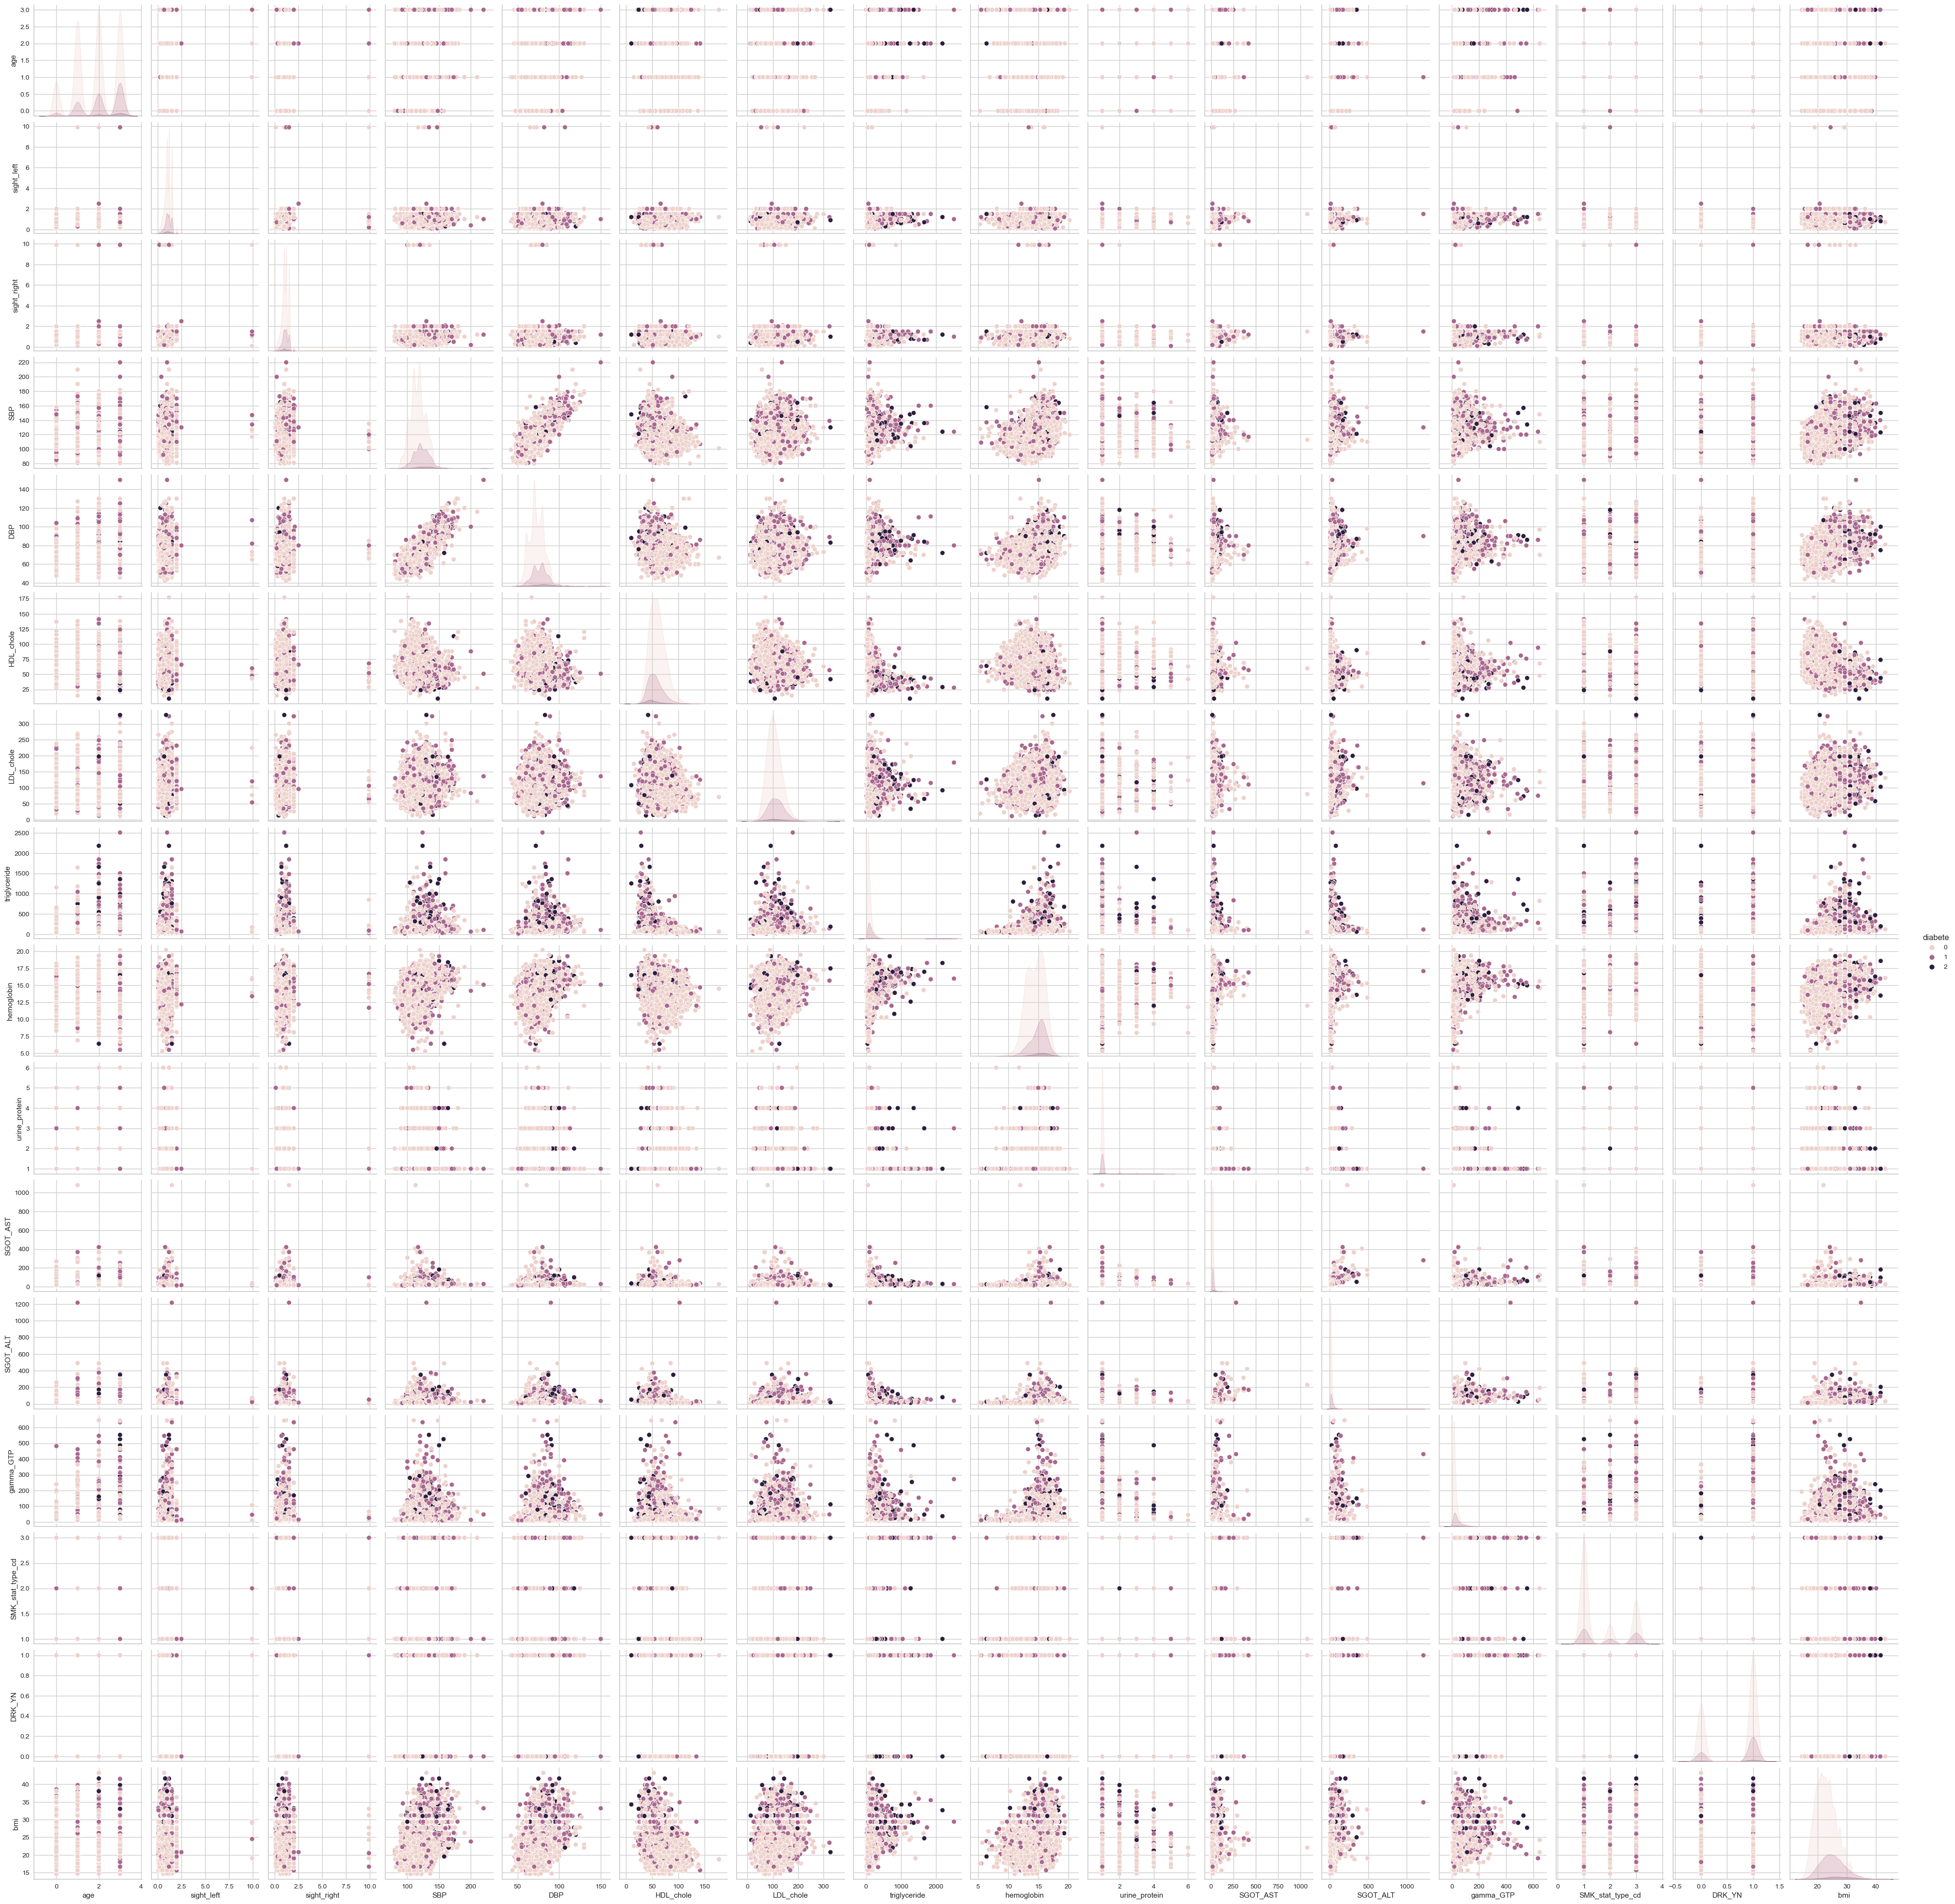

In [53]:
sns.pairplot(df_2030.sample(n=15000),
            hue = 'diabete')

In [28]:
df_2030.diabete.value_counts()

0    194394
1     49606
2      4667
Name: diabete, dtype: int64

In [26]:
# 클래스 불균형 해소 안함
# 제거한 변수: serum_creatinine, weight', 'tot_chole, sex', 'height', 'waistline
from pycaret.classification import *
exp_name = setup(data =  df_2030.sample(n=5000),  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=6132, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

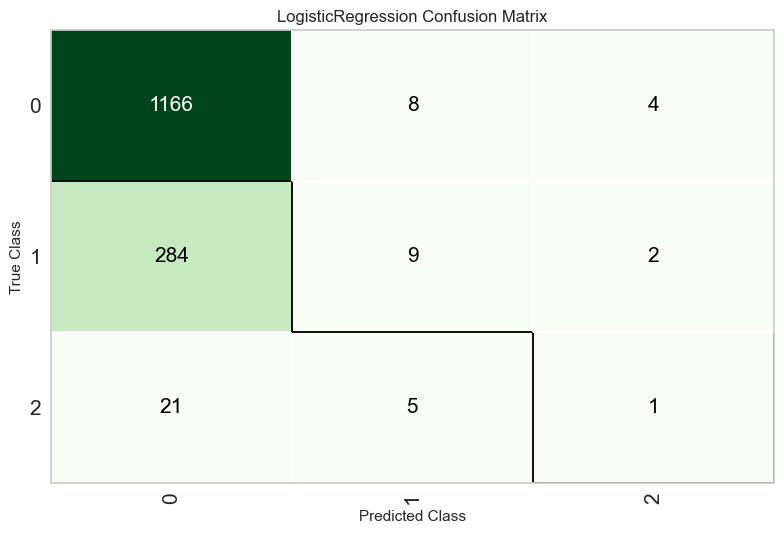

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

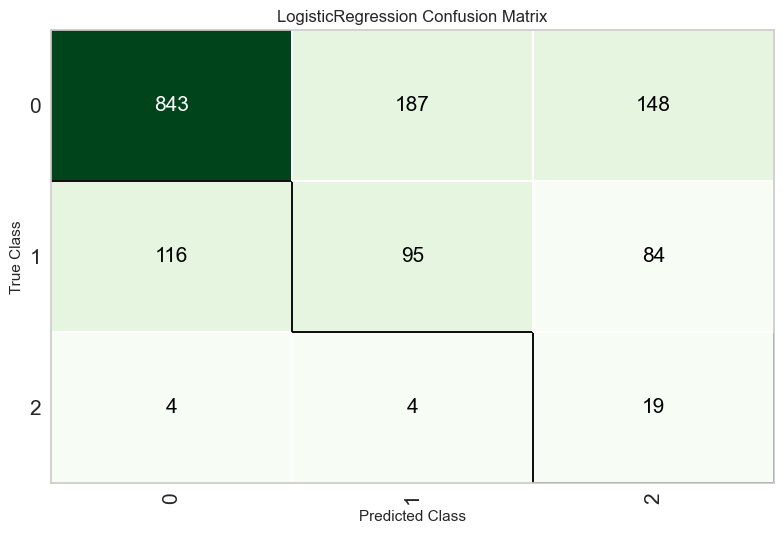

In [27]:
lr = create_model('lr')
plot_model(lr, plot = 'confusion_matrix')

lr = create_model('lr', class_weight = 'balanced')
plot_model(lr, plot = 'confusion_matrix')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

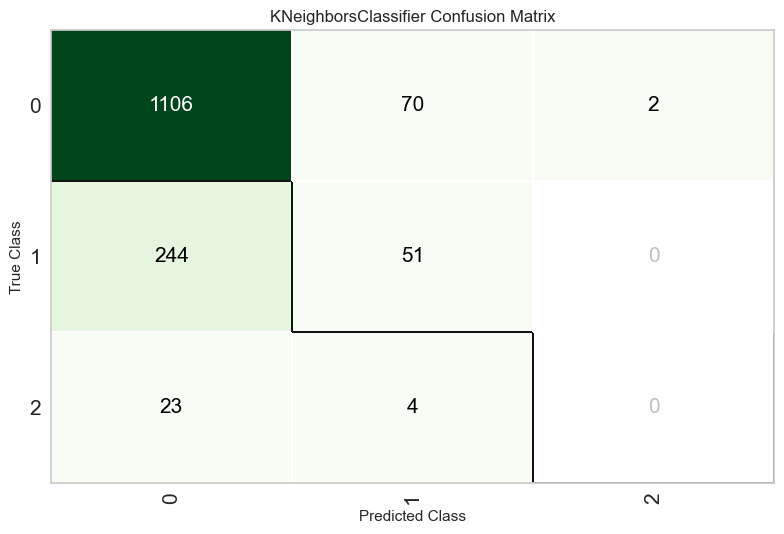

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

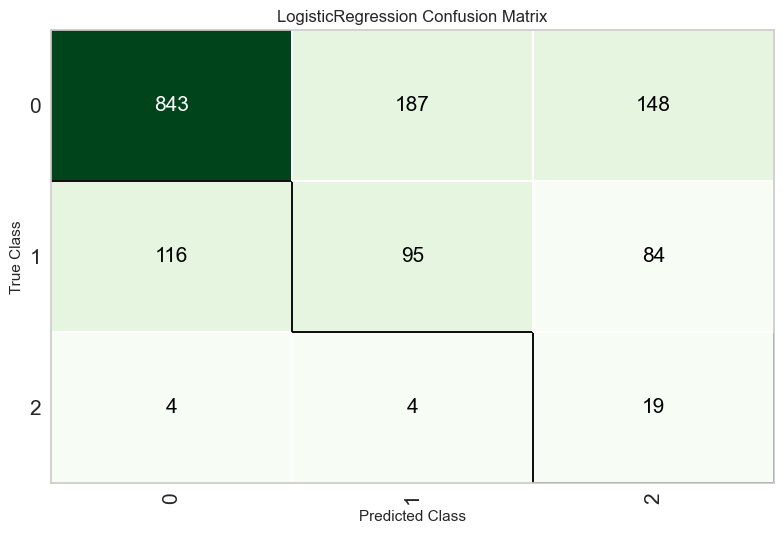

In [30]:
knn = create_model('knn')
plot_model(knn, plot = 'confusion_matrix')

knn = create_model('knn', weights = 'uniform')
plot_model(lr, plot = 'confusion_matrix')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

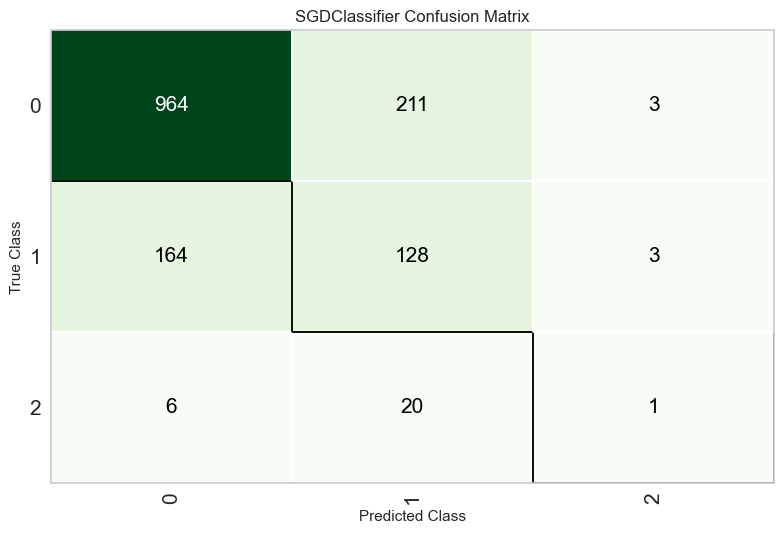

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

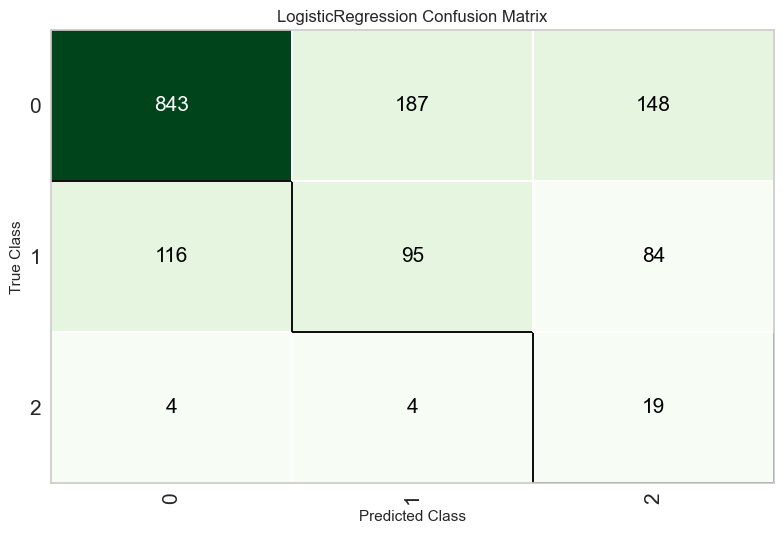

In [31]:
svm = create_model('svm')
plot_model(svm, plot = 'confusion_matrix')

svm = create_model('svm', class_weight = 'balanced')
plot_model(lr, plot = 'confusion_matrix')

In [40]:
df_2030

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
0         3         1.0          1.0  120.0  80.0       48.0      126.0   
1         2         0.9          1.2  130.0  82.0       55.0      148.0   
7         3         1.2          1.0  132.0  80.0       58.0      107.0   
13        2         1.2          1.2  118.0  72.0       55.0      129.0   
14        2         0.9          1.0  129.0  77.0       53.0      108.0   
...     ...         ...          ...    ...   ...        ...        ...   
991333    3         0.7          0.9  110.0  80.0       57.0      140.0   
991337    3         1.0          1.0  113.0  69.0       63.0       92.0   
991338    0         1.0          1.5  105.0  70.0       72.0      120.0   
991342    3         1.0          1.5  119.0  83.0       40.0       84.0   
991344    1         1.5          1.0  119.0  74.0       38.0       73.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
0               92.0        17.1              1      21.0      35.0   
1              121.0        15.8              1      20.0      36.0   
7              101.0        14.4              1      18.0      18.0   
13              77.0        15.7              1      13.0      16.0   
14             219.0        14.5              1      21.0      24.0   
...              ...         ...            ...       ...       ...   
991333          59.0        12.9              1      25.0      12.0   
991337          88.0        13.3              1      20.0      17.0   
991338          92.0        15.4              1      25.0      26.0   
991342          45.0        15.8              1      14.0      17.0   
991344          53.0        14.5              1      21.0      14.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
0            40.0                 1       1        0  25.951557  
1            27.0                 3       0        1  24.691358  
7            35.0                 3       1        0  21.224490  
13           19.0                 1       1        0  24.489796  
14           58.0                 1       0        0  19.531250  
...           ...               ...     ...      ...        ...  
991333       13.0                 1       1        0  27.055151  
991337       12.0                 1       0        0  25.711662  
991338       50.0                 2       1        0  21.224490  
991342       15.0                 1       0        0  25.951557  
991344       17.0                 1       0        0  19.591837  

[248667 rows x 17 columns]

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

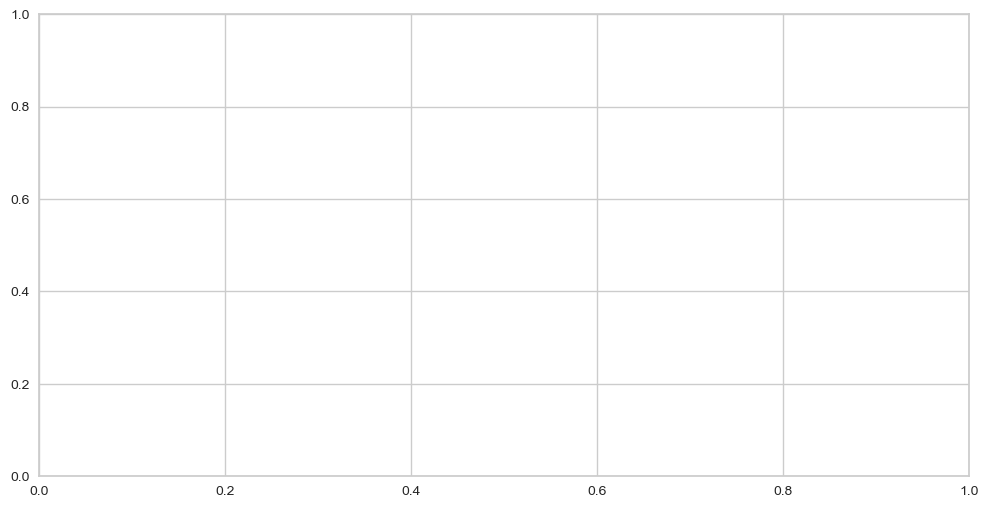

In [45]:
evaluate_model(create_model('knn', fold = 5))

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

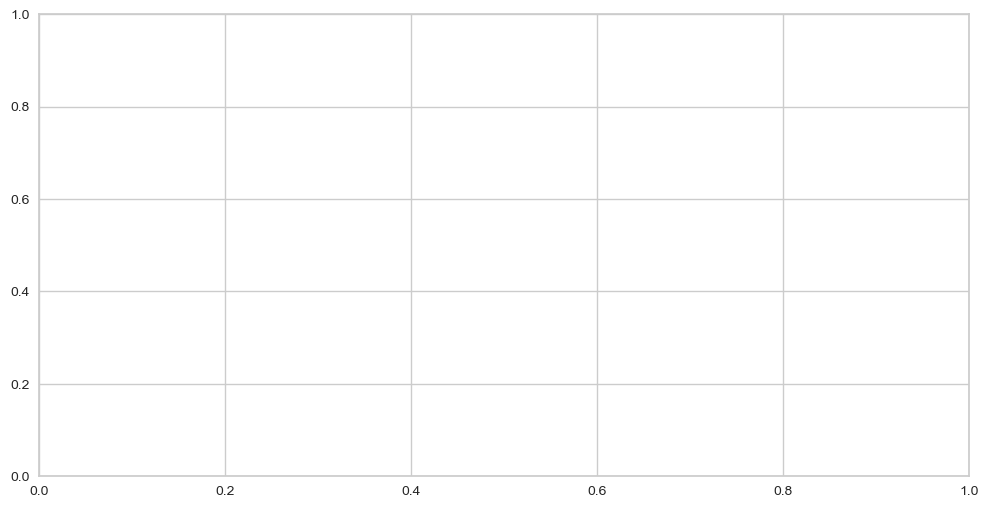

In [46]:
evaluate_model(create_model('svm', fold = 5))

### Reduce Data Imbalancement: CondensedNearestNeighbour (downsampling)

In [46]:
cnn = CondensedNearestNeighbour(random_state=42)
cnn

sample_for_cnn = df_2030.sample(n=30000)
X, y = cnn.fit_resample(sample_for_cnn.drop("diabete", axis=1), sample_for_cnn["diabete"])
sample_for_cnn = X
sample_for_cnn['diabete'] = y

print(sample_for_cnn['diabete'].value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_cnn,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

0    2488
1    1561
2     582
Name: diabete, dtype: int64


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

In [131]:
df_2030.diabete.value_counts()

0    194394
1     49606
2      4667
Name: diabete, dtype: int64

In [ ]:
# 얘를 최종적으로 사용해야겠다.
cnn = CondensedNearestNeighbour(random_state=42,
                                sampling_strategy = 'majority')
cnn

sample_for_cnn = df_2030.sample(n=248667)
X, y = cnn.fit_resample(sample_for_cnn.drop("diabete", axis=1), sample_for_cnn["diabete"])
sample_for_cnn = X
sample_for_cnn['diabete'] = y

print(sample_for_cnn['diabete'].value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_cnn,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

In [ ]:
# 얘를 최종적으로 사용해야겠다.
oss = OneSidedSelection(random_state=42)
oss

sample_for_oss = df_2030.sample(n=248667)
X, y = oss.fit_resample(sample_for_oss.drop("diabete", axis=1), sample_for_oss["diabete"])
sample_for_oss = X
sample_for_oss['diabete'] = y

print(sample_for_oss['diabete'].value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_oss,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

In [ ]:
# 얘를 최종적으로 사용해야겠다.
oss = OneSidedSelection(random_state=42)
oss

sample_for_oss = df_2030.sample(n=100000)
X, y = oss.fit_resample(sample_for_oss.drop("diabete", axis=1), sample_for_oss["diabete"])
sample_for_oss = X
sample_for_oss['diabete'] = y

print(sample_for_oss['diabete'].value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_oss,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

In [130]:
# 얘를 최종적으로 사용해야겠다.
cnn = CondensedNearestNeighbour(random_state=42,
                                sampling_strategy = 'majority')
cnn

sample_for_cnn = df_2030.sample(n=150000)
X, y = oss.fit_resample(sample_for_cnn.drop("diabete", axis=1), sample_for_cnn["diabete"])
sample_for_cnn = X
sample_for_cnn['diabete'] = y

print(sample_for_cnn['diabete'].value_counts())

from pycaret.classification import *
exp_name = setup(data =  sample_for_cnn,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

0    107051
1     20215
2      2822
Name: diabete, dtype: int64


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [128]:
sample_for_cnn

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
0         2         1.5          1.2  118.0  78.0       56.0      105.0   
1         3         2.0          1.5  132.0  74.0       56.0      109.0   
2         0         0.1          0.1  107.0  67.0       48.0       91.0   
3         2         1.0          1.0  120.0  83.0       53.0      145.0   
4         1         0.9          0.9  105.0  66.0       90.0      116.0   
...     ...         ...          ...    ...   ...        ...        ...   
215748    3         1.5          1.5  138.0  94.0       92.0      119.0   
215749    3         1.0          1.0  132.0  82.0       57.0      116.0   
215750    3         0.7          0.9  128.0  86.0       44.0      160.0   
215751    2         0.9          1.2  118.0  76.0       38.0      203.0   
215752    3         1.2          1.5  120.0  70.0       30.0       83.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
0              143.0        16.1              1      26.0      32.0   
1              122.0        15.2              1      16.0      16.0   
2               88.0        15.7              1      30.0      52.0   
3               76.0        13.3              1      17.0      13.0   
4               33.0        13.0              1      14.0      13.0   
...              ...         ...            ...       ...       ...   
215748         126.0        17.1              2      48.0      28.0   
215749         139.0        16.2              1      21.0      15.0   
215750         200.0        15.8              1      22.0      30.0   
215751         494.0        15.2              1      44.0      81.0   
215752         461.0        15.3              2      20.0      29.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN        bmi  diabete  
0            48.0                 3       1  22.491349        0  
1            26.0                 3       1  24.221453        0  
2            23.0                 3       1  17.959184        0  
3            15.0                 1       0  20.811655        0  
4            14.0                 1       1  21.484375        0  
...           ...               ...     ...        ...      ...  
215748       64.0                 3       1  18.991965        2  
215749       22.0                 3       1  24.489796        2  
215750       11.0                 1       0  24.444444        2  
215751       91.0                 3       1  29.296875        2  
215752       72.0                 3       1  26.234568        2  

[215753 rows x 17 columns]

In [129]:
sample_for_cnn.to_csv("DM_sample_for_model_ver1.csv", index = False)

In [127]:
cnn = CondensedNearestNeighbour(random_state=42,
                                sampling_strategy = 'majority')
cnn

CondensedNearestNeighbour(n_jobs=None, n_neighbors=None, n_seeds_S=1,
                          random_state=42, sampling_strategy='majority')

In [122]:
sample_for_cnn = df_2030.sample(n=100000)
X, y = oss.fit_resample(sample_for_cnn.drop("diabete", axis=1), sample_for_cnn["diabete"])
sample_for_cnn = X
sample_for_cnn['diabete'] = y
sample_for_cnn

age  sight_left  sight_right    SBP    DBP  HDL_chole  LDL_chole  \
0        2         1.0          1.0  110.0   67.0       72.0      130.0   
1        3         0.9          1.2  159.0  125.0       54.0      150.0   
2        3         0.8          1.0  127.0   76.0       59.0      152.0   
3        2         0.8          0.8  110.0   78.0       74.0      119.0   
4        2         0.9          1.0  106.0   65.0       78.0      150.0   
...    ...         ...          ...    ...    ...        ...        ...   
86535    3         0.5          1.0  134.0   89.0       49.0      110.0   
86536    3         0.1          0.2  130.0   80.0       39.0      126.0   
86537    3         1.5          1.5  120.0   80.0       44.0      133.0   
86538    3         1.0          1.2  123.0   79.0       36.0       91.0   
86539    2         1.5          1.0  122.0   78.0       55.0      122.0   

       triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  gamma_GTP  \
0              67.0        13.4              1      37.0      36.0       70.0   
1             484.0        17.2              1      33.0      49.0       61.0   
2             187.0        15.6              1      30.0      41.0       33.0   
3             109.0        14.8              1      25.0      19.0       13.0   
4              39.0        12.2              1      95.0      38.0        9.0   
...             ...         ...            ...       ...       ...        ...   
86535         232.0        16.9              1      21.0      40.0      103.0   
86536         581.0        16.7              1      94.0     101.0      260.0   
86537         763.0        17.0              3      30.0      40.0       76.0   
86538         381.0        15.3              1      31.0      60.0       56.0   
86539         142.0        14.7              1      23.0      33.0       28.0   

       SMK_stat_type_cd  DRK_YN        bmi  diabete  
0                     1       0  24.973985        0  
1                     3       1  25.390625        0  
2                     1       0  27.548209        0  
3                     1       0  20.811655        0  
4                     1       1  18.730489        0  
...                 ...     ...        ...      ...  
86535                 3       1  29.218408        2  
86536                 2       1  33.057851        2  
86537                 3       1  22.038567        2  
86538                 3       1  29.411765        2  
86539                 3       1  27.777778        2  

[86540 rows x 17 columns]

In [123]:
sample_for_cnn['diabete'].value_counts()

0    71326
1    13301
2     1913
Name: diabete, dtype: int64

In [124]:
from pycaret.classification import *
exp_name = setup(data =  sample_for_cnn,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### Reduce Data Imbalancement: Tomeklinks (downsampling)

In [111]:
tom = TomekLinks()
tom

TomekLinks(n_jobs=None, sampling_strategy='auto')

In [112]:
sample_for_tom = df_2030.sample(n=100000)
X, y = tom.fit_resample(sample_for_tom.drop("diabete", axis=1), sample_for_tom["diabete"])
sample_for_tom = X
sample_for_tom['diabete'] = y
sample_for_tom

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
0        3         1.5          1.5  130.0  78.0       55.0      109.0   
1        3         1.5          1.5  143.0  84.0       50.0      111.0   
2        1         0.4          0.3  100.0  60.0       81.0       69.0   
3        1         1.5          1.5  108.0  70.0       57.0       84.0   
4        3         0.2          0.3  117.0  81.0       55.0      142.0   
...    ...         ...          ...    ...   ...        ...        ...   
86798    1         0.8          1.0  120.0  70.0       53.0      131.0   
86799    3         1.5          1.5  129.0  83.0       46.0      135.0   
86800    3         1.2          1.2  139.0  70.0       48.0       75.0   
86801    3         0.9          1.2  120.0  80.0       53.0      104.0   
86802    3         1.5          1.2  130.0  80.0       63.0      100.0   

       triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  gamma_GTP  \
0              78.0        14.8              1      17.0      12.0        8.0   
1              43.0        16.7              1      19.0      17.0       21.0   
2              62.0        13.1              1      24.0      14.0       10.0   
3              50.0        13.0              1      15.0      10.0       12.0   
4              73.0        15.1              3      10.0       8.0       22.0   
...             ...         ...            ...       ...       ...        ...   
86798         107.0        16.1              1      17.0      27.0       26.0   
86799          84.0        13.9              1      23.0      19.0       23.0   
86800         147.0        12.1              1      18.0      10.0        9.0   
86801         145.0        14.5              3      42.0     106.0       94.0   
86802         121.0        14.3              1      22.0      17.0       15.0   

       SMK_stat_type_cd  DRK_YN        bmi  diabete  
0                     2       1  19.531250        0  
1                     2       1  24.489796        1  
2                     1       1  19.031142        0  
3                     1       0  18.730489        0  
4                     3       1  27.681661        2  
...                 ...     ...        ...      ...  
86798                 2       0  23.875115        0  
86799                 1       1  24.221453        0  
86800                 1       0  21.484375        0  
86801                 1       0  25.711662        2  
86802                 2       1  24.221453        1  

[86803 rows x 17 columns]

In [113]:
sample_for_tom['diabete'].value_counts()

0    71354
1    13581
2     1868
Name: diabete, dtype: int64

In [114]:
from pycaret.classification import *
exp_name = setup(data =  sample_for_tom,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### Reduce Data Imbalancement: One-sided selection (downsampling)

In [55]:
oss = OneSidedSelection(random_state=42)
oss

OneSidedSelection(n_jobs=None, n_neighbors=None, n_seeds_S=1, random_state=42,
                  sampling_strategy='auto')

In [86]:
sample_for_oss = df_2030.sample(n=248667)
sample_for_oss

age  sight_left  sight_right    SBP    DBP  HDL_chole  LDL_chole  \
869925    3         1.2          1.2  100.0   80.0       60.0       90.0   
889277    2         1.0          1.0  120.0   70.0       49.0       86.0   
118636    0         0.6          1.0  121.0   78.0       99.0       77.0   
123923    1         1.5          1.2  115.0   80.0       60.0      129.0   
692190    2         2.0          1.5  148.0  102.0       60.0      147.0   
...     ...         ...          ...    ...    ...        ...        ...   
60466     2         1.5          1.0  138.0   82.0       52.0      105.0   
477785    3         1.5          1.5  130.0   80.0       81.0       78.0   
593243    3         0.9          1.2  138.0   86.0       53.0       94.0   
228451    2         1.5          1.5  115.0   75.0       60.0      168.0   
247330    3         1.2          1.0  110.0   72.0       54.0       85.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
869925          80.0        12.5              1      17.0      10.0   
889277          42.0        14.4              1      22.0      14.0   
118636          61.0        13.0              1      16.0      12.0   
123923          85.0        15.0              1      19.0      22.0   
692190         196.0        15.6              1      34.0      61.0   
...              ...         ...            ...       ...       ...   
60466          125.0        15.3              1      23.0      23.0   
477785          66.0        16.3              1      13.0      14.0   
593243         193.0        13.8              1      21.0      22.0   
228451         193.0        15.7              1      21.0      29.0   
247330         150.0        16.1              1      23.0      32.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  diabete        bmi  
869925       18.0                 1       0        0  20.000000  
889277       13.0                 1       1        0  20.811655  
118636       27.0                 1       1        0  17.301038  
123923       38.0                 3       0        0  22.491349  
692190       28.0                 1       0        0  29.411765  
...           ...               ...     ...      ...        ...  
60466        17.0                 3       0        0  20.761246  
477785       45.0                 3       1        0  21.224490  
593243        7.0                 2       0        2  23.875115  
228451       55.0                 1       1        0  25.951557  
247330       40.0                 2       0        0  23.875115  

[248667 rows x 17 columns]

In [87]:
X, y = oss.fit_resample(sample_for_oss.drop("diabete", axis=1), sample_for_oss["diabete"])
sample_for_oss = X
sample_for_oss['diabete'] = y
sample_for_oss

age  sight_left  sight_right    SBP    DBP  HDL_chole  LDL_chole  \
0         3         1.2          1.2  100.0   80.0       60.0       90.0   
1         2         1.0          1.0  120.0   70.0       49.0       86.0   
2         0         0.6          1.0  121.0   78.0       99.0       77.0   
3         2         2.0          1.5  148.0  102.0       60.0      147.0   
4         1         0.6          0.7  138.0   88.0       48.0      130.0   
...     ...         ...          ...    ...    ...        ...        ...   
215699    3         1.0          0.8  146.0   90.0       58.0       65.0   
215700    3         0.6          0.8  144.0   96.0       46.0      173.0   
215701    3         1.5          1.5  115.0   79.0       52.0       64.0   
215702    3         0.8          1.2  136.0   96.0       40.0      139.0   
215703    3         0.9          1.2  138.0   86.0       53.0       94.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
0               80.0        12.5              1      17.0      10.0   
1               42.0        14.4              1      22.0      14.0   
2               61.0        13.0              1      16.0      12.0   
3              196.0        15.6              1      34.0      61.0   
4              138.0        15.5              1      52.0      69.0   
...              ...         ...            ...       ...       ...   
215699         180.0        16.7              1      33.0      77.0   
215700         204.0        17.3              2      80.0      78.0   
215701         181.0        14.7              1      23.0      46.0   
215702         179.0        15.5              1      56.0      97.0   
215703         193.0        13.8              1      21.0      22.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN        bmi  diabete  
0            18.0                 1       0  20.000000        0  
1            13.0                 1       1  20.811655        0  
2            27.0                 1       1  17.301038        0  
3            28.0                 1       0  29.411765        0  
4            63.0                 3       1  34.285714        0  
...           ...               ...     ...        ...      ...  
215699       45.0                 1       1  31.250000        2  
215700       68.0                 1       0  36.332180        2  
215701       51.0                 2       0  27.755102        2  
215702      112.0                 1       0  29.384757        2  
215703        7.0                 2       0  23.875115        2  

[215704 rows x 17 columns]

In [88]:
sample_for_oss['diabete'].value_counts()

0    177592
1     33445
2      4667
Name: diabete, dtype: int64

In [89]:
# One-sided selection
from pycaret.classification import *
exp_name = setup(data =  sample_for_oss,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

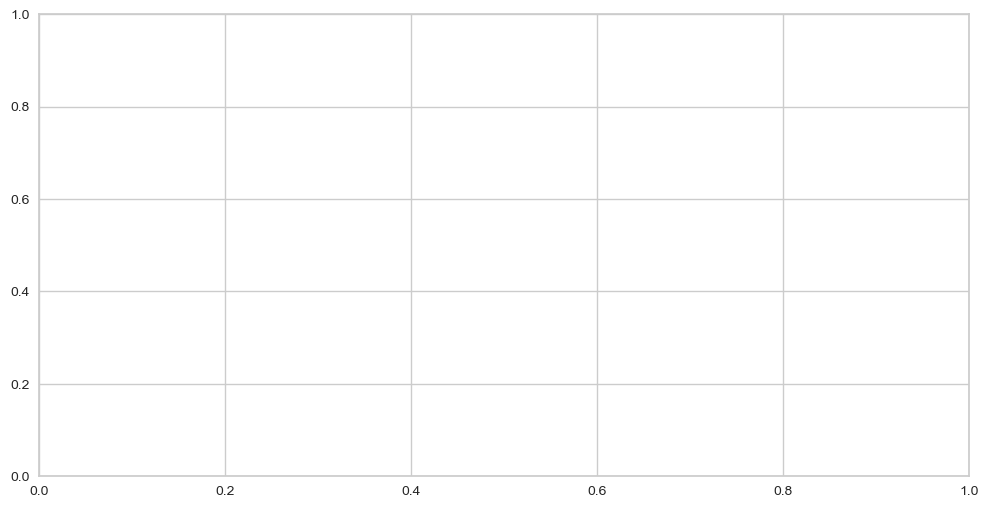

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [90]:
evaluate_model(create_model('knn', fold = 5))

### ?

In [93]:
sample_for_oss[sample_for_oss.diabete==0].sample(n=50000)

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
110045    3         1.5          1.5  112.0  69.0       51.0      139.0   
96626     2         1.0          1.0  106.0  71.0       75.0       94.0   
20827     0         2.0          1.5  113.0  66.0       56.0       96.0   
37942     3         1.0          1.2  110.0  70.0       46.0      112.0   
91742     3         0.9          0.7  120.0  85.0       51.0       83.0   
...     ...         ...          ...    ...   ...        ...        ...   
168664    2         1.0          1.2  113.0  72.0       81.0       88.0   
142860    2         1.5          1.2  109.0  71.0       65.0      103.0   
125309    2         0.7          0.9  120.0  80.0       57.0      155.0   
20720     2         0.5          0.5  100.0  70.0       55.0      107.0   
137840    3         1.5          1.2  138.0  88.0       45.0      157.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
110045          42.0        16.0              1      22.0      22.0   
96626           46.0        13.4              1      25.0      15.0   
20827           48.0        12.7              1      18.0       9.0   
37942           62.0        13.3              1      29.0      25.0   
91742          125.0        15.0              1      28.0      25.0   
...              ...         ...            ...       ...       ...   
168664          52.0        13.4              1      19.0      13.0   
142860          48.0        15.6              1      34.0      59.0   
125309         117.0        16.5              1      24.0      27.0   
20720           97.0        16.4              1      22.0      20.0   
137840          87.0        15.4              1      21.0      21.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN        bmi  diabete  
110045       17.0                 3       0  19.591837        0  
96626        15.0                 1       1  17.578125        0  
20827        10.0                 1       0  21.484375        0  
37942        16.0                 1       0  20.202020        0  
91742        44.0                 3       1  26.234568        0  
...           ...               ...     ...        ...      ...  
168664        9.0                 1       1  20.811655        0  
142860       24.0                 3       1  22.857143        0  
125309       16.0                 1       1  26.122449        0  
20720        16.0                 1       0  20.761246        0  
137840       21.0                 3       1  20.061728        0  

[50000 rows x 17 columns]

In [94]:
sample_for_oss[(sample_for_oss.diabete==1)|(sample_for_oss.diabete==2)]

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
177592    2         1.5          0.7  153.0  93.0       39.0      130.0   
177593    1         0.2          0.3  111.0  68.0       55.0      110.0   
177594    3         1.0          1.2  126.0  80.0       50.0      182.0   
177595    2         1.2          1.2  139.0  89.0       57.0      201.0   
177596    3         0.9          0.9  130.0  82.0       46.0      114.0   
...     ...         ...          ...    ...   ...        ...        ...   
215699    3         1.0          0.8  146.0  90.0       58.0       65.0   
215700    3         0.6          0.8  144.0  96.0       46.0      173.0   
215701    3         1.5          1.5  115.0  79.0       52.0       64.0   
215702    3         0.8          1.2  136.0  96.0       40.0      139.0   
215703    3         0.9          1.2  138.0  86.0       53.0       94.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
177592         413.0        15.4              1      26.0      51.0   
177593         119.0        12.5              1      16.0      10.0   
177594         174.0        15.5              1      35.0      51.0   
177595          93.0        16.6              1      63.0      99.0   
177596         237.0        14.9              1      31.0      36.0   
...              ...         ...            ...       ...       ...   
215699         180.0        16.7              1      33.0      77.0   
215700         204.0        17.3              2      80.0      78.0   
215701         181.0        14.7              1      23.0      46.0   
215702         179.0        15.5              1      56.0      97.0   
215703         193.0        13.8              1      21.0      22.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN        bmi  diabete  
177592       95.0                 1       0  29.296875        1  
177593       18.0                 1       0  21.484375        1  
177594       46.0                 3       1  24.489796        1  
177595       70.0                 1       1  29.218408        1  
177596       78.0                 3       1  26.234568        1  
...           ...               ...     ...        ...      ...  
215699       45.0                 1       1  31.250000        2  
215700       68.0                 1       0  36.332180        2  
215701       51.0                 2       0  27.755102        2  
215702      112.0                 1       0  29.384757        2  
215703        7.0                 2       0  23.875115        2  

[38112 rows x 17 columns]

In [99]:
ddff = pd.concat([sample_for_oss[sample_for_oss.diabete==0].sample(n=50000),
         sample_for_oss[(sample_for_oss.diabete==1)|(sample_for_oss.diabete==2)]])
ddff

age  sight_left  sight_right    SBP   DBP  HDL_chole  LDL_chole  \
76234     1         1.5          1.5  123.0  75.0       57.0      103.0   
136483    3         0.9          1.0  132.0  88.0       46.0      105.0   
129965    3         1.5          1.2  100.0  68.0       56.0       67.0   
76074     2         1.0          1.5  101.0  73.0       59.0       57.0   
5879      1         0.8          0.6  109.0  66.0       52.0       77.0   
...     ...         ...          ...    ...   ...        ...        ...   
215699    3         1.0          0.8  146.0  90.0       58.0       65.0   
215700    3         0.6          0.8  144.0  96.0       46.0      173.0   
215701    3         1.5          1.5  115.0  79.0       52.0       64.0   
215702    3         0.8          1.2  136.0  96.0       40.0      139.0   
215703    3         0.9          1.2  138.0  86.0       53.0       94.0   

        triglyceride  hemoglobin  urine_protein  SGOT_AST  SGOT_ALT  \
76234           54.0         9.5              1      27.0      13.0   
136483          69.0        16.0              1      18.0      23.0   
129965          75.0        14.2              1      12.0      10.0   
76074           29.0        12.2              1      18.0      10.0   
5879            99.0        15.6              1      29.0      32.0   
...              ...         ...            ...       ...       ...   
215699         180.0        16.7              1      33.0      77.0   
215700         204.0        17.3              2      80.0      78.0   
215701         181.0        14.7              1      23.0      46.0   
215702         179.0        15.5              1      56.0      97.0   
215703         193.0        13.8              1      21.0      22.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN        bmi  diabete  
76234        12.0                 1       1  17.578125        0  
136483       19.0                 1       0  25.951557        0  
129965       13.0                 1       1  19.531250        0  
76074        14.0                 1       0  19.531250        0  
5879         32.0                 1       0  25.711662        0  
...           ...               ...     ...        ...      ...  
215699       45.0                 1       1  31.250000        2  
215700       68.0                 1       0  36.332180        2  
215701       51.0                 2       0  27.755102        2  
215702      112.0                 1       0  29.384757        2  
215703        7.0                 2       0  23.875115        2  

[88112 rows x 17 columns]

In [100]:
from pycaret.classification import *
exp_name = setup(data =  ddff,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

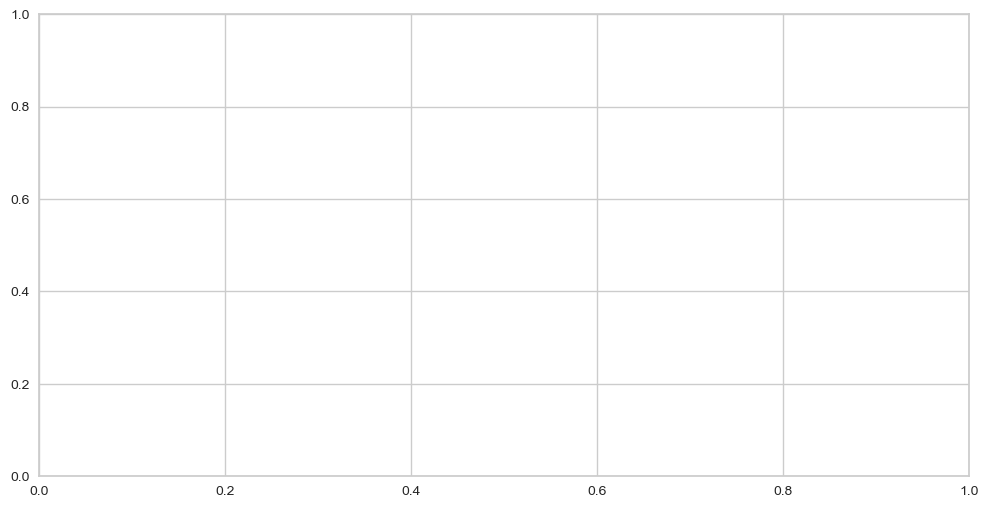

In [101]:
evaluate_model(create_model('nb', fold = 5))

### Reduce Data Imbalancement: SMOTEENN

In [41]:
sme = SMOTEENN(random_state=42)

In [42]:
sample_for_sme = df_2030.sample(n=50000)
X, y = sme.fit_resample(sample_for_sme.drop("diabete", axis=1), sample_for_sme["diabete"])

In [43]:
sample_for_sme = X
sample_for_sme['diabete'] = y
display(sample_for_sme)
print(sample_for_sme['diabete'].value_counts())

age  sight_left  sight_right         SBP        DBP  HDL_chole  \
0        1    0.800000     0.600000  110.000000  60.000000  93.000000   
1        1    1.000000     0.900000  112.000000  63.000000  71.000000   
2        1    1.200000     1.200000  115.000000  63.000000  67.000000   
3        3    0.800000     1.000000  132.000000  82.000000  89.000000   
4        3    0.800000     0.800000  123.000000  73.000000  49.000000   
...    ...         ...          ...         ...        ...        ...   
88243    2    1.199957     1.499872  130.004271  80.003203  44.001281   
88244    3    1.034808     1.034808  121.740411  78.348082  58.911507   
88245    3    0.969742     1.000000  130.000000  73.933559  39.210326   
88246    2    1.319694     1.319694  138.000000  86.803056  70.207131   
88247    3    0.943811     1.200000  139.707926  80.876222  50.977741   

        LDL_chole  triglyceride  hemoglobin  urine_protein   SGOT_AST  \
0       97.000000     46.000000   13.000000              1  32.000000   
1       91.000000     47.000000   12.700000              1  22.000000   
2      132.000000     38.000000   15.100000              1  21.000000   
3       74.000000    167.000000   15.100000              1  29.000000   
4       70.000000     30.000000   14.000000              1  18.000000   
...           ...           ...         ...            ...        ...   
88243  123.007261    217.001068   17.799808              1  27.000000   
88244  123.176986    241.784657   16.825959              1  44.997055   
88245  255.468474    170.959374   16.593356              1  25.763859   
88246  116.181662    161.792869   16.981834              1  37.005094   
88247  171.349074    123.438111   15.258415              2  42.809445   

        SGOT_ALT   gamma_GTP  SMK_stat_type_cd  DRK_YN        bmi  diabete  
0      31.000000   80.000000                 1       1  18.730489        0  
1      14.000000   25.000000                 1       1  19.531250        0  
2      15.000000   17.000000                 2       0  24.221453        0  
3      32.000000   35.000000                 3       1  21.224490        0  
4       9.000000    9.000000                 1       0  18.365473        0  
...          ...         ...               ...     ...        ...      ...  
88243  20.004271   97.998719                 3       1  36.331743        2  
88244  76.348082  132.262534                 3       1  30.315092        2  
88245  46.896741   65.272959                 3       1  27.916176        2  
88246  30.419357   56.005094                 2       1  26.130765        2  
88247  75.168296   53.853963                 1       0  35.473481        2  

[88248 rows x 17 columns]

2    38679
1    33858
0    15711
Name: diabete, dtype: int64


In [44]:
sample_for_sme.to_csv("DM_smoteen.csv", index = False)

2    11526
1     9949
0     4639
Name: diabete, dtype: int64

In [37]:
# SMOTEENN
from pycaret.classification import *
exp_name = setup(data =  sample_for_sme,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

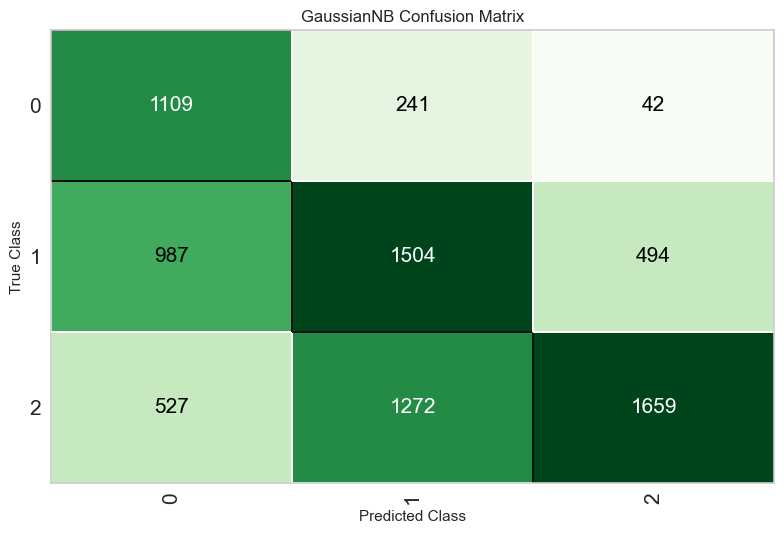

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

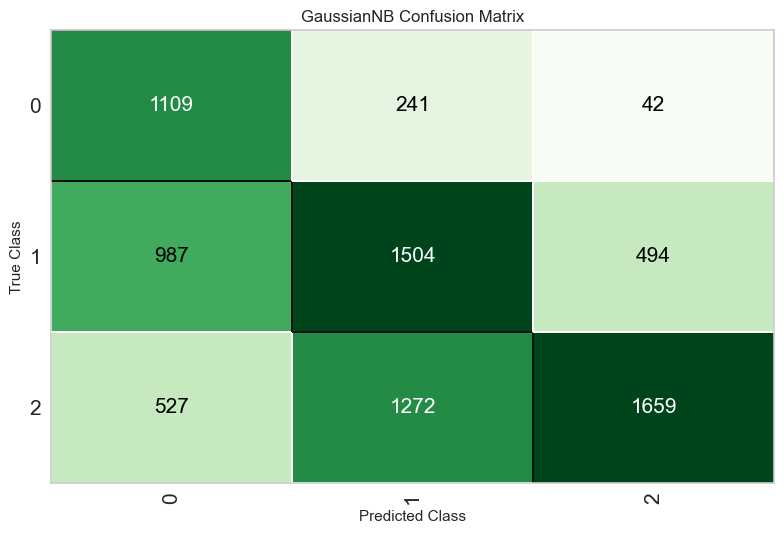

In [40]:
knn = create_model('knn')
plot_model(nb, plot = 'confusion_matrix')

knn = create_model('knn', weights = 'uniform')
plot_model(nb, plot = 'confusion_matrix')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

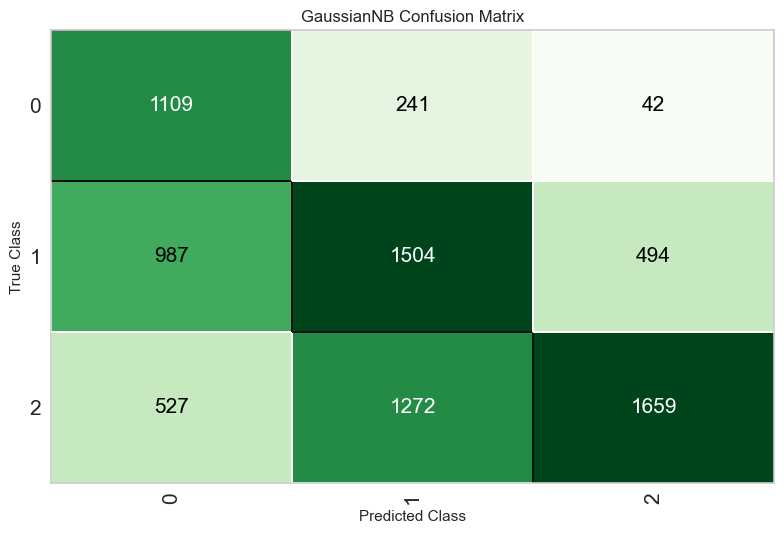

Initiated  . . . . . . . . . . . . . . . . . .             15:17:15
Status     . . . . . . . . . . . . . . . . . .  Selecting Estimator
Estimator  . . . . . . . . . . . . . . . . . .    Compiling Library

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [38]:
nb = create_model('nb')
plot_model(nb, plot = 'confusion_matrix')

nb = create_model('nb', class_weight = 'balanced')
plot_model(nb, plot = 'confusion_matrix')

### Reduce Data Imbalancement: SMOTETomek

In [76]:
sample_for_SMOTETomek = df_2030.sample(n=15000)
X, y = SMOTETomek.fit_resample(df_xy.drop("diabete", axis=1), df_xy["diabete"])

In [77]:
sample_for_SMOTETomek = X
sample_for_SMOTETomek['diabete'] = y
sample_for_SMOTETomek

age  sight_left  sight_right         SBP        DBP  HDL_chole  \
0         2    1.500000     1.500000  136.000000  84.000000  48.000000   
1         3    1.200000     1.200000  120.000000  80.000000  74.000000   
2         1    0.900000     0.900000  110.000000  70.000000  78.000000   
3         2    1.000000     1.200000  118.000000  72.000000  63.000000   
4         1    0.800000     0.900000  120.000000  80.000000  58.000000   
...     ...         ...          ...         ...        ...        ...   
116924    3    1.265478     0.647217  129.654782  73.055651  60.162610   
116925    1    1.121652     1.272991  130.000000  82.270091  49.433030   
116926    2    0.715107     0.715107  135.697859  88.043219  41.798572   
116927    3    0.827653     0.972347  112.212239  75.106119  46.829590   
116928    2    0.745217     0.836174  136.180869  84.090434  59.728697   

         LDL_chole  triglyceride  hemoglobin  urine_protein   SGOT_AST  \
0       157.000000    189.000000   16.000000              1  32.000000   
1        99.000000    135.000000   14.000000              1  20.000000   
2       102.000000     60.000000   13.000000              1  19.000000   
3        84.000000     69.000000   15.600000              1  40.000000   
4       102.000000     67.000000   13.500000              1  14.000000   
...            ...           ...         ...            ...        ...   
116924   60.075648    156.106959   15.049217              1  25.654782   
116925   89.892848    242.080364   15.329688              1  16.189727   
116926  223.050357    193.438937   15.820143              1  14.805710   
116927   78.530597    344.765298   16.031836              1  27.553060   
116928  138.994779    152.361738   13.836174              1  14.638262   

         SGOT_ALT   gamma_GTP  SMK_stat_type_cd  DRK_YN        bmi  diabete  
0       58.000000   58.000000                 3       1  23.148148        0  
1       23.000000   37.000000                 1       1  20.202020        0  
2       14.000000   10.000000                 1       0  19.531250        0  
3       50.000000   42.000000                 3       1  23.437500        0  
4       10.000000   12.000000                 1       0  23.437500        0  
...           ...         ...               ...     ...        ...      ...  
116924  37.000000  114.162610                 3       1  28.053380        2  
116925  17.270091   24.513394                 1       1  26.853129        2  
116926  16.266060   34.553926                 1       0  36.802754        2  
116927  32.511231   54.553060                 2       1  24.927738        2  
116928  10.361738   14.904345                 1       0  24.688741        2  

[116929 rows x 17 columns]

In [80]:
sample_for_SMOTETomek['diabete'].value_counts()

2    39141
1    38895
0    38893
Name: diabete, dtype: int64

In [78]:
from pycaret.classification import *
exp_name = setup(data =  sample_for_SMOTETomek,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
evaluate_model(create_model('knn', fold = 5))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_2030.drop("diabete", axis = 1), X['diabete'], test_size=0.25, random_state=321)

ValueError: Found input variables with inconsistent numbers of samples: [248667, 117188]

###  Reduce Data Imbalancement: SMOTETomek + Tomeklinks

In [64]:
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
smoteto

SMOTETomek(n_jobs=None, random_state=None, sampling_strategy='auto', smote=None,
           tomek=TomekLinks(n_jobs=None, sampling_strategy='majority'))

In [66]:
sample_for_smotomek = df_2030.sample(n=15000)
X, y = smoteto.fit_resample(df_xy.drop("diabete", axis=1), df_xy["diabete"])

In [67]:
sample_for_smotomek = X
sample_for_smotomek['diabete'] = y
sample_for_smotomek

age  sight_left  sight_right         SBP         DBP  HDL_chole  \
0         2    1.500000     1.500000  136.000000   84.000000  48.000000   
1         3    1.200000     1.200000  120.000000   80.000000  74.000000   
2         1    0.900000     0.900000  110.000000   70.000000  78.000000   
3         2    1.000000     1.200000  118.000000   72.000000  63.000000   
4         1    0.800000     0.900000  120.000000   80.000000  58.000000   
...     ...         ...          ...         ...         ...        ...   
117222    3    1.200000     1.271012  137.763293   85.763293  57.319028   
117223    1    1.170772     1.243842  157.730695  107.146139  53.807914   
117224    2    1.200000     1.200000  139.449943   89.449943  50.650171   
117225    0    1.470428     1.464514  110.000000   61.064581  44.290279   
117226    3    0.952719     0.952719  126.654847   79.273050  47.618203   

         LDL_chole  triglyceride  hemoglobin  urine_protein   SGOT_AST  \
0       157.000000    189.000000   16.000000              1  32.000000   
1        99.000000    135.000000   14.000000              1  20.000000   
2       102.000000     60.000000   13.000000              1  19.000000   
3        84.000000     69.000000   15.600000              1  40.000000   
4       102.000000     67.000000   13.500000              1  14.000000   
...            ...           ...         ...            ...        ...   
117222  148.603779    145.183536   15.262780              1  96.348177   
117223  144.538609    128.707722   15.446969              1  21.169113   
117224   77.324516     68.550057   15.350057              1  16.925199   
117225   95.591434    592.070018   16.899456              1  30.053706   
117226   88.799052    398.453899   15.767258              1  53.981086   

          SGOT_ALT   gamma_GTP  SMK_stat_type_cd  DRK_YN        bmi  diabete  
0        58.000000   58.000000                 3       1  23.148148        0  
1        23.000000   37.000000                 1       1  20.202020        0  
2        14.000000   10.000000                 1       0  19.531250        0  
3        50.000000   42.000000                 3       1  23.437500        0  
4        10.000000   12.000000                 1       0  23.437500        0  
...            ...         ...               ...     ...        ...      ...  
117222  149.893657  118.608906                 2       1  29.800678        2  
117223   23.215060   44.730695                 1       0  28.119648        2  
117224   15.449943   13.825085                 2       1  24.999265        2  
117225   38.876276   56.059143                 3       0  23.690950        2  
117226   74.234038  245.708036                 2       0  31.541710        2  

[117227 rows x 17 columns]

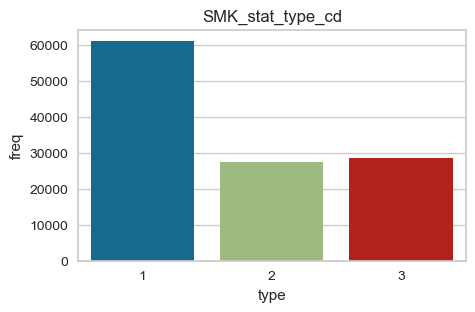

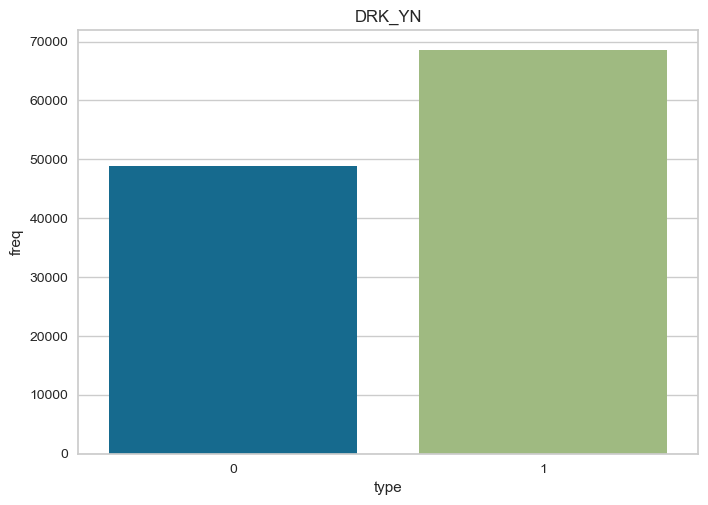

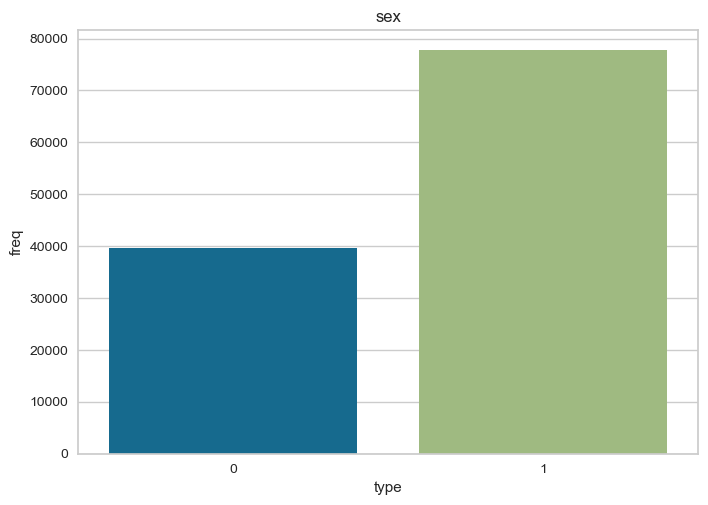

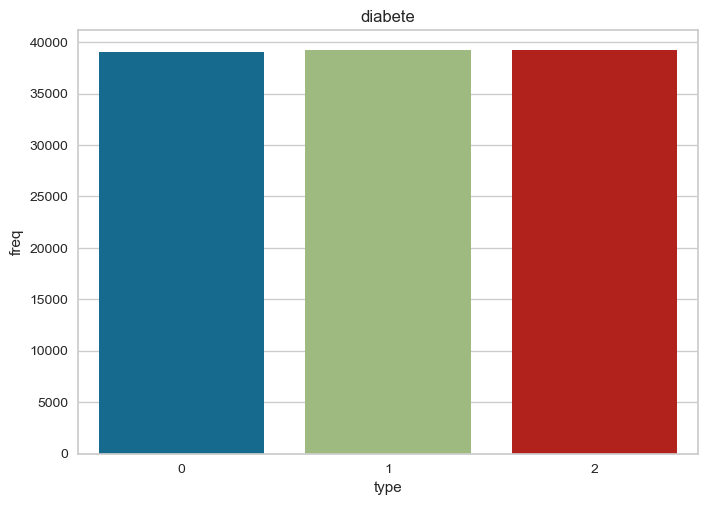

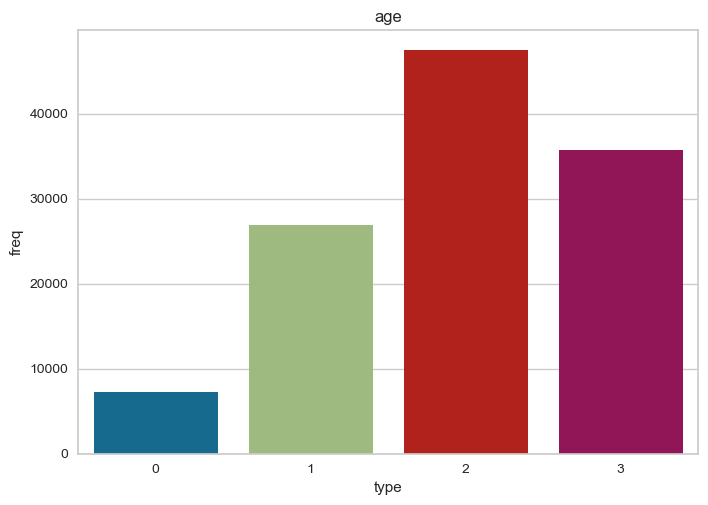

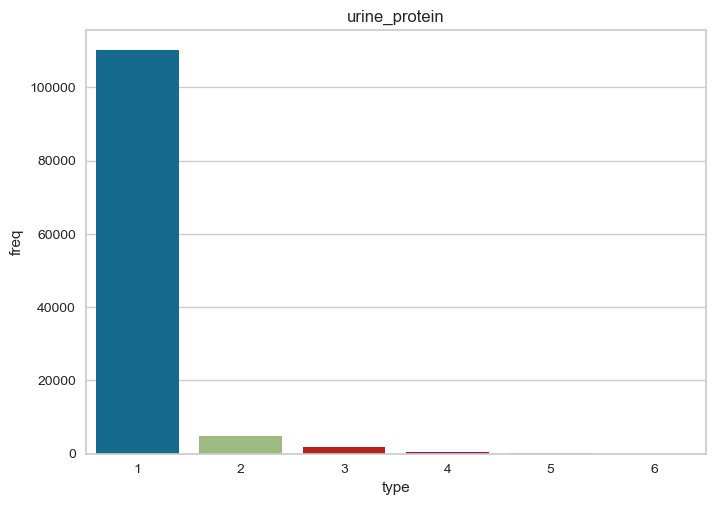

In [39]:
cate_list = ["SMK_stat_type_cd", "DRK_YN", "sex", "diabete", "age", "urine_protein"]

fig, ax = plt.subplots(1, figsize=(5, 3))

for i in range(len(cate_list)):
    freq = X[cate_list[i]].value_counts().reset_index()
    freq.columns = ['type','freq']
    sns.barplot(x = "type", y = "freq", data = freq)
    plt.title(cate_list[i])
    plt.show()

In [68]:
# 업/다운 샘플링 쓰면, knn만 성능이 올라가고 나머지는 성능이 크게 하락해버림... -> 업/다운 샘플링 둘 다 쓰는 방법은 부적절한 것 같다. 또는 다른 업, 다운 샘플링을 사용해봐야 할 듯.
from pycaret.classification import *
exp_name = setup(data =  sample_for_smotomek,  target = 'diabete')
compare_models(['nb', 'knn', 'svm'])

Initiated  . . . . . . . . . . . . . . . . . .                22:39:41
Status     . . . . . . . . . . . . . . . . . .        Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  K Neighbors Classifier

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [41]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [42]:
create_model("rbfsvm")

Initiated  . . . . . . . . . . . . . . . . . .             17:50:36
Status     . . . . . . . . . . . . . . . . . .     Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  SVM - Radial Kernel

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [44]:
cts_variables = [col for col in df_2030 if col not in cate_list]
cts_variables

['height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'SBP',
 'DBP',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'bmi']

In [45]:
df[cts_variables]

height  weight  waistline  sight_left  sight_right    SBP   DBP  \
0         1.70      75       90.0         1.0          1.0  120.0  80.0   
1         1.80      80       89.0         0.9          1.2  130.0  82.0   
2         1.65      75       91.0         1.2          1.5  120.0  70.0   
3         1.75      80       91.0         1.5          1.2  145.0  87.0   
4         1.65      60       80.0         1.0          1.2  138.0  82.0   
...        ...     ...        ...         ...          ...    ...   ...   
991341    1.75      80       92.1         1.5          1.5  114.0  80.0   
991342    1.70      75       86.0         1.0          1.5  119.0  83.0   
991343    1.55      50       68.0         1.0          0.7  110.0  70.0   
991344    1.75      60       72.0         1.5          1.0  119.0  74.0   
991345    1.60      70       90.5         1.0          1.5  133.0  79.0   

        tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0           193.0       48.0      126.0          92.0        17.1   
1           228.0       55.0      148.0         121.0        15.8   
2           136.0       41.0       74.0         104.0        15.8   
3           201.0       76.0      104.0         106.0        17.6   
4           199.0       61.0      117.0         104.0        13.8   
...           ...        ...        ...           ...         ...   
991341      198.0       46.0      125.0         132.0        15.0   
991342      133.0       40.0       84.0          45.0        15.8   
991343      205.0       96.0       77.0         157.0        14.3   
991344      122.0       38.0       73.0          53.0        14.5   
991345      225.0       39.0      153.0         163.0        15.8   

        serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP        bmi  
0                    1.0      21.0      35.0       40.0  25.951557  
1                    0.9      20.0      36.0       27.0  24.691358  
2                    0.9      47.0      32.0       68.0  27.548209  
3                    1.1      29.0      34.0       18.0  26.122449  
4                    0.8      19.0      12.0       25.0  22.038567  
...                  ...       ...       ...        ...        ...  
991341               1.0      26.0      36.0       27.0  26.122449  
991342               1.1      14.0      17.0       15.0  25.951557  
991343               0.8      30.0      27.0       17.0  20.811655  
991344               0.8      21.0      14.0       17.0  19.591837  
991345               0.9      24.0      43.0       36.0  27.343750  

[991346 rows x 17 columns]

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[cts_variables])
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = cts_variables
X_scaled

height    weight  waistline  sight_left  sight_right       SBP  \
0      -1.121121 -1.128621  -1.250208   -0.233182     1.100886 -0.709905   
1       0.199865  0.199140   0.354467    0.284866     0.312158 -1.543157   
2      -0.460628  0.199140   0.354467    1.061937     1.100886  0.805099   
3       0.860358  1.858842   1.302684    0.284866    -0.213662  0.426348   
4       0.199865  0.863021   0.354467    0.284866    -0.213662  1.183850   
...          ...       ...        ...         ...          ...       ...   
117418  0.769550  1.659678   0.890587   -0.456593    -0.440425  0.661165   
117419  0.657002  0.066364   0.231044   -0.252957     0.191068 -1.170379   
117420  0.586886  1.128573   0.809766    0.070373     0.094447 -0.121698   
117421  0.506210  0.531081   0.544735   -0.113043     0.735064  0.809462   
117422  1.300484  2.257170   1.618813    0.112024     0.136723  0.931466   

             DBP  tot_chole  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0       1.252615  -0.859819   0.076117  -0.828731     -0.313461   -1.273797   
1      -1.758929  -0.327014  -0.758381  -0.115166     -0.022903    0.485957   
2       0.941076  -0.433575  -0.132508  -0.301314     -0.254164    0.978688   
3       1.148769  -0.993021  -1.384254  -1.294099      0.617510    0.978688   
4       1.148769   0.232432   0.701989   0.567374     -0.687036    0.767517   
...          ...        ...        ...        ...           ...         ...   
117418  1.700460   0.483182   0.122205   0.429313     -0.028025    1.406323   
117419 -1.072165  -0.845516  -0.940285  -1.150975      0.451054    0.318130   
117420 -0.290499   1.781692  -0.223769   2.580284     -0.498719    0.820864   
117421  0.317998   0.888011   0.791663   0.560637      0.011729   -0.585179   
117422  0.456779   0.028051  -0.364334  -0.187681      0.271573    1.565229   

        serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP       bmi  
0              -0.550241 -0.447099 -0.637106  -0.711696 -0.897859  
1               0.647499 -0.232332 -0.578881   0.148597  0.158488  
2              -0.550241  0.304584  0.702061   1.087098  0.536045  
3               0.348064  0.143509  0.236264   0.676504  1.743180  
4               0.348064 -0.286024 -0.578881  -0.574831  0.976717  
...                  ...       ...       ...        ...       ...  
117418          0.089797  1.106615  1.381838   5.422541  1.581556  
117419         -0.273667 -0.190804 -0.473618  -0.313043 -0.206709  
117420          0.523521  1.875029  2.774040   0.087952  1.085950  
117421         -0.571913 -0.190299  0.008440   0.014562  0.403619  
117422          1.046562  1.861642  2.506783   2.598917  1.947640  

[117423 rows x 17 columns]

In [51]:
df_standard_scaled = pd.concat([X_scaled, X[cate_list]], axis=1)
df_standard_scaled

height    weight  waistline  sight_left  sight_right       SBP  \
0      -1.121121 -1.128621  -1.250208   -0.233182     1.100886 -0.709905   
1       0.199865  0.199140   0.354467    0.284866     0.312158 -1.543157   
2      -0.460628  0.199140   0.354467    1.061937     1.100886  0.805099   
3       0.860358  1.858842   1.302684    0.284866    -0.213662  0.426348   
4       0.199865  0.863021   0.354467    0.284866    -0.213662  1.183850   
...          ...       ...        ...         ...          ...       ...   
117418  0.769550  1.659678   0.890587   -0.456593    -0.440425  0.661165   
117419  0.657002  0.066364   0.231044   -0.252957     0.191068 -1.170379   
117420  0.586886  1.128573   0.809766    0.070373     0.094447 -0.121698   
117421  0.506210  0.531081   0.544735   -0.113043     0.735064  0.809462   
117422  1.300484  2.257170   1.618813    0.112024     0.136723  0.931466   

             DBP  tot_chole  HDL_chole  LDL_chole  ...  SGOT_AST  SGOT_ALT  \
0       1.252615  -0.859819   0.076117  -0.828731  ... -0.447099 -0.637106   
1      -1.758929  -0.327014  -0.758381  -0.115166  ... -0.232332 -0.578881   
2       0.941076  -0.433575  -0.132508  -0.301314  ...  0.304584  0.702061   
3       1.148769  -0.993021  -1.384254  -1.294099  ...  0.143509  0.236264   
4       1.148769   0.232432   0.701989   0.567374  ... -0.286024 -0.578881   
...          ...        ...        ...        ...  ...       ...       ...   
117418  1.700460   0.483182   0.122205   0.429313  ...  1.106615  1.381838   
117419 -1.072165  -0.845516  -0.940285  -1.150975  ... -0.190804 -0.473618   
117420 -0.290499   1.781692  -0.223769   2.580284  ...  1.875029  2.774040   
117421  0.317998   0.888011   0.791663   0.560637  ... -0.190299  0.008440   
117422  0.456779   0.028051  -0.364334  -0.187681  ...  1.861642  2.506783   

        gamma_GTP       bmi  SMK_stat_type_cd  DRK_YN  sex  diabete  age  \
0       -0.711696 -0.897859                 1       0    0        1    2   
1        0.148597  0.158488                 3       1    1        0    3   
2        1.087098  0.536045                 2       1    1        0    3   
3        0.676504  1.743180                 2       1    1        0    1   
4       -0.574831  0.976717                 2       1    1        1    3   
...           ...       ...               ...     ...  ...      ...  ...   
117418   5.422541  1.581556                 2       1    1        2    2   
117419  -0.313043 -0.206709                 1       0    1        2    3   
117420   0.087952  1.085950                 3       1    1        2    2   
117421   0.014562  0.403619                 1       0    0        2    3   
117422   2.598917  1.947640                 1       0    1        2    2   

        urine_protein  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
117418              1  
117419              1  
117420              1  
117421              1  
117422              1  

[117423 rows x 23 columns]

In [52]:
from pycaret.classification import *
exp_name = setup(data =  df_standard_scaled,  target = 'diabete')
compare_models(['nb', 'knn', 'ridge', 'svm'])

Processing:   0%|          | 0/21 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X[cts_variables])
X_mm = pd.DataFrame(X_mm)
X_mm.columns = cts_variables
df_mm_scaled = pd.concat([X_mm, X[cate_list]], axis=1)
df_mm_scaled

height    weight  waistline  sight_left  sight_right       SBP  \
0       0.400000  0.190476   0.017914    0.091837     0.142857  0.237179   
1       0.600000  0.380952   0.041096    0.112245     0.112245  0.166667   
2       0.500000  0.380952   0.041096    0.142857     0.142857  0.365385   
3       0.700000  0.619048   0.054795    0.112245     0.091837  0.333333   
4       0.600000  0.476190   0.041096    0.112245     0.091837  0.397436   
...          ...       ...        ...         ...          ...       ...   
117418  0.686251  0.590476   0.048841    0.083036     0.083036  0.353204   
117419  0.669212  0.361905   0.039313    0.091058     0.107545  0.198213   
117420  0.658596  0.514286   0.047673    0.103795     0.103795  0.286956   
117421  0.646381  0.428571   0.043845    0.096570     0.128659  0.365754   
117422  0.766636  0.676190   0.059362    0.105436     0.105436  0.376078   

             DBP  tot_chole  HDL_chole  LDL_chole  ...  SGOT_AST  SGOT_ALT  \
0       0.319149   0.158805   0.091071   0.217054  ...  0.010916  0.005199   
1       0.113475   0.190252   0.069643   0.276486  ...  0.013341  0.006066   
2       0.297872   0.183962   0.085714   0.260982  ...  0.019406  0.025130   
3       0.312057   0.150943   0.053571   0.178295  ...  0.017586  0.018198   
4       0.312057   0.223270   0.107143   0.333333  ...  0.012735  0.006066   
...          ...        ...        ...        ...  ...       ...       ...   
117418  0.349735   0.238070   0.092255   0.321834  ...  0.028464  0.035247   
117419  0.160378   0.159649   0.064972   0.190215  ...  0.013810  0.007632   
117420  0.213762   0.314709   0.083371   0.500985  ...  0.037143  0.055967   
117421  0.255319   0.261963   0.109446   0.332772  ...  0.013816  0.014807   
117422  0.264797   0.211208   0.079761   0.270446  ...  0.036992  0.051989   

        gamma_GTP       bmi  SMK_stat_type_cd  DRK_YN  sex  diabete  age  \
0        0.011249  0.243817                 1       0    0        1    2   
1        0.060742  0.383232                 3       1    1        0    3   
2        0.114736  0.433061                 2       1    1        0    3   
3        0.091114  0.592377                 2       1    1        0    1   
4        0.019123  0.491221                 2       1    1        1    3   
...           ...       ...               ...     ...  ...      ...  ...   
117418   0.364160  0.571046                 2       1    1        2    2   
117419   0.034184  0.335034                 1       0    1        2    3   
117420   0.057253  0.505637                 3       1    1        2    2   
117421   0.053031  0.415584                 1       0    0        2    3   
117422   0.201713  0.619361                 1       0    1        2    2   

        urine_protein  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
117418              1  
117419              1  
117420              1  
117421              1  
117422              1  

[117423 rows x 23 columns]

In [55]:
from pycaret.classification import *
exp_name = setup(data =  df_mm_scaled,  target = 'diabete')
compare_models(['knn', 'nb', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train, sample_weight= 1.9)

predict_train_nb = nb_clf.predict(X_train)
predict_test_nb = nb_clf.predict(X_test)

nb_train_accuracy = accuracy_score(predict_train_nb, y_train)
nb_train_recall = recall_score(predict_train_nb, y_train, average= 'micro')
nb_train_precision = precision_score(predict_train_nb, y_train, average= 'micro')
nb_train_f1 = f1_score(predict_train_nb, y_train, average= 'micro')

nb_test_accuracy = accuracy_score(predict_test_nb, y_test)
nb_test_recall = recall_score(predict_test_nb, y_test, average= 'micro')
nb_test_precision = precision_score(predict_test_nb, y_test, average= 'micro')
nb_test_f1 = f1_score(predict_test_nb, y_test, average= 'micro')

print(f'train_accuracy_score: {nb_train_accuracy}')
print(f'train_recall_score: {nb_train_recall}')
print(f'train_precision_score: {nb_train_precision}')
print(f'train_f1_score: {nb_train_f1}')
print()
print(f'test_accuracy_score: {nb_test_accuracy}')
print(f'test_recall_score: {nb_test_recall}')
print(f'test_precision_score: {nb_test_precision}')
print(f'test_f1_score: {nb_test_f1}')

In [57]:
scaler = Normalizer()
X_norm = scaler.fit_transform(X[cts_variables])
X_norm = pd.DataFrame(X_norm)
X_norm.columns = cts_variables
df_norm_scaled = pd.concat([X_norm, X[cate_list]], axis=1)
df_norm_scaled

from pycaret.classification import *
exp_name = setup(data =  df_norm_scaled,  target = 'diabete')
compare_models(['knn', 'nb', 'svm'])

Processing:   0%|          | 0/17 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
create_model("rbfsvm", fold = 2)

Initiated  . . . . . . . . . . . . . . . . . .             18:31:51
Status     . . . . . . . . . . . . . . . . . .     Finalizing Model
Estimator  . . . . . . . . . . . . . . . . . .  SVM - Radial Kernel

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
from pycaret.classification import *
exp_name = setup(data =  X,  target = 'diabete')
compare_models(['nb', 'knn', 'svm', 'rbfsvm'])

Initiated  . . . . . . . . . . . . . . . . . .             19:25:55
Status     . . . . . . . . . . . . . . . . . .     Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  SVM - Radial Kernel

Processing:   0%|          | 0/21 [00:00<?, ?it/s]

KeyboardInterrupt: 

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

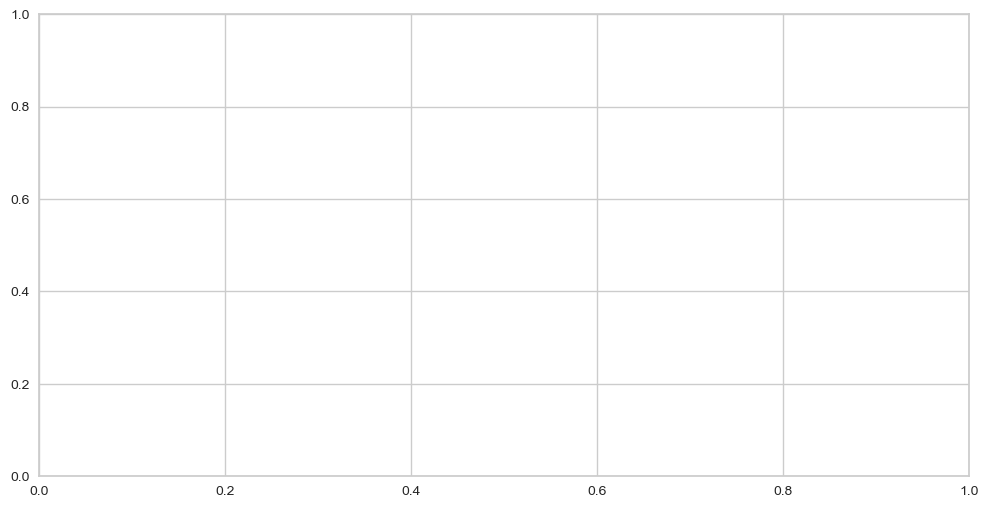

In [38]:
evaluate_model(create_model('knn'))

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

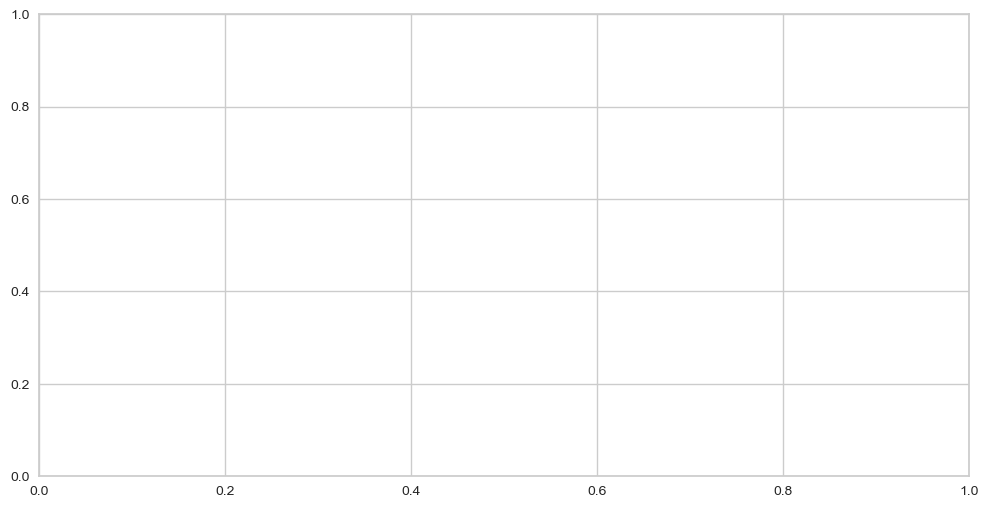

In [40]:
evaluate_model(create_model('nb'))

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

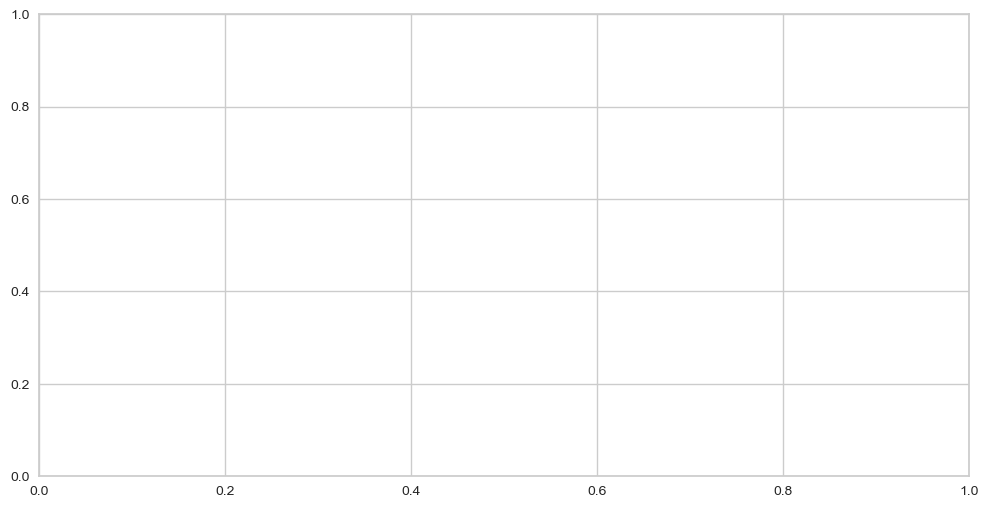

In [41]:
evaluate_model(create_model('svm'))

In [66]:
X = X.drop("urine_protein", axis = 1)
X

sex  age   waistline  sight_left  sight_right         SBP        DBP  \
0         1    2   67.200000    0.200000     0.100000  109.000000  67.000000   
1         0    3   58.500000    0.800000     0.800000  100.000000  60.000000   
2         0    2   77.500000    1.500000     1.500000  137.000000  87.000000   
3         1    3  110.600000    1.000000     1.000000  126.000000  74.000000   
4         1    0  112.100000    0.900000     1.000000  155.000000  96.000000   
...     ...  ...         ...         ...          ...         ...        ...   
117211    1    3   85.073934    0.943385     1.200000  135.227624  81.698443   
117212    0    3   77.653034    1.200000     1.000000  126.507768  79.716505   
117213    1    3   85.834884    0.724681     0.600000  135.096174  89.150638   
117214    0    2   95.346033    0.556402     1.200000  118.910055  75.000000   
117215    0    1   94.676513    1.178434     1.435303  139.784342  79.353026   

         tot_chole  HDL_chole   LDL_chole  triglyceride  hemoglobin  \
0       167.000000  59.000000   96.000000     58.000000   15.200000   
1       162.000000  43.000000   95.000000    118.000000   10.600000   
2       238.000000  75.000000  147.000000     76.000000   14.600000   
3       183.000000  51.000000  111.000000    105.000000   14.600000   
4       153.000000  55.000000   82.000000     82.000000   17.300000   
...            ...        ...         ...           ...         ...   
117211  143.507786  48.095328   23.677048    356.809343   15.533852   
117212  206.104368  46.820874  122.283495    181.820874   14.453738   
117213  280.205101  60.794899  186.150638    223.451913   16.224681   
117214  173.217989  36.782011  101.782011    170.833857   14.604497   
117215  205.813882  43.137369  123.107829    196.274737   14.283309   

        serum_creatinine   SGOT_AST    SGOT_ALT   gamma_GTP  SMK_stat_type_cd  \
0               0.900000  22.000000   23.000000   26.000000                 3   
1               0.600000  16.000000   10.000000    9.000000                 1   
2               0.700000  15.000000   11.000000   13.000000                 1   
3               0.800000  38.000000   84.000000   60.000000                 1   
4               1.000000  44.000000  110.000000   43.000000                 1   
...                  ...        ...         ...         ...               ...   
117211          1.069844  38.603114   48.190657  128.941638                 3   
117212          0.776869  14.641747   14.358253   21.410437                 2   
117213          1.184936  27.096174   40.000000   72.163391                 3   
117214          0.721799  18.000000   19.044973   22.564022                 1   
117215          0.643132  21.646974   17.078289   40.323487                 2   

        DRK_YN        bmi  diabete  
0            1  19.031142        0  
1            0  16.649324        0  
2            0  28.888889        0  
3            1  36.730946        2  
4            1  32.653061        1  
...        ...        ...      ...  
117211       1  25.755570        2  
117212       1  21.801941        2  
117213       1  25.752468        2  
117214       0  27.244603        2  
117215       1  29.299475        2  

[117216 rows x 20 columns]

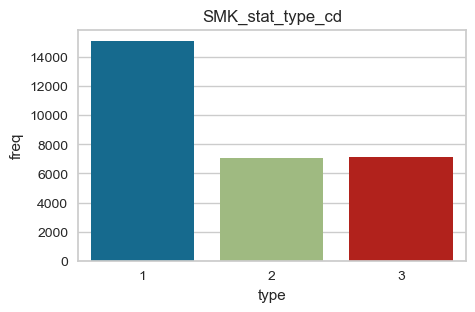

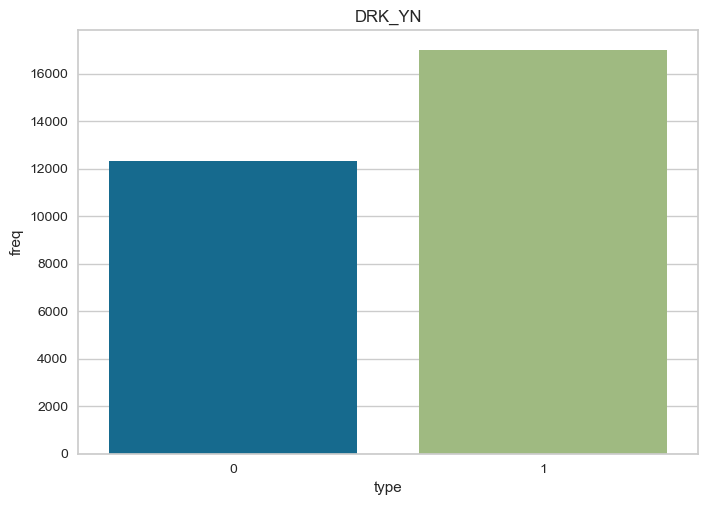

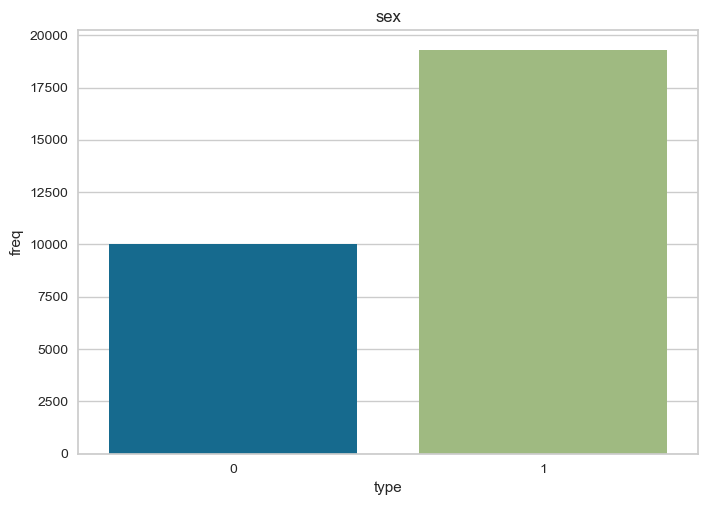

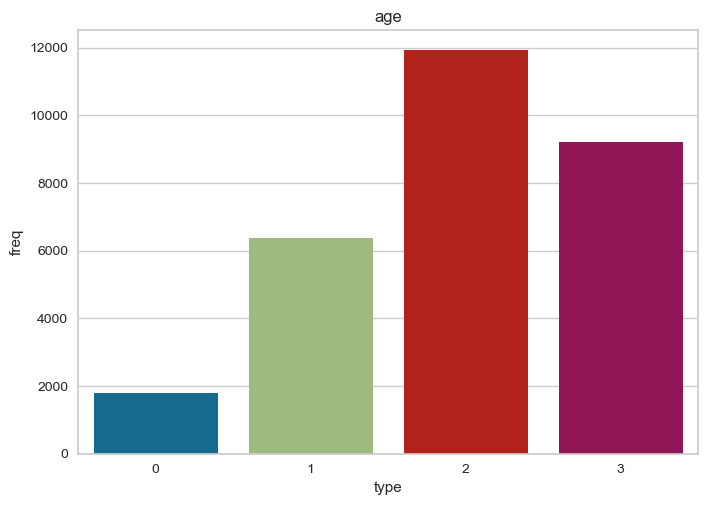

In [73]:
cate_list = ["SMK_stat_type_cd", "DRK_YN", "sex", "age"]

fig, ax = plt.subplots(1, figsize=(5, 3))

for i in range(len(cate_list)):
    freq = X_test[cate_list[i]].value_counts().reset_index()
    freq.columns = ['type','freq']
    sns.barplot(x = "type", y = "freq", data = freq)
    plt.title(cate_list[i])
    plt.show()

In [67]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X.drop("diabete", axis = 1), X['diabete'], test_size=0.25, random_state=321)

In [76]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [82]:
from sklearn.naive_bayes import CategoricalNB
nb_clf = CategoricalNB(min_categories=1)
nb_clf.fit(X_train, y_train)

predict_train_nb = nb_clf.predict(X_train)
predict_test_nb = nb_clf.predict(X_test)

nb_train_accuracy = accuracy_score(predict_train_nb, y_train)
nb_train_recall = recall_score(predict_train_nb, y_train, average= 'micro')
nb_train_precision = precision_score(predict_train_nb, y_train, average= 'micro')
nb_train_f1 = f1_score(predict_train_nb, y_train, average= 'micro')

nb_test_accuracy = accuracy_score(predict_test_nb, y_test)
nb_test_recall = recall_score(predict_test_nb, y_test, average= 'micro')
nb_test_precision = precision_score(predict_test_nb, y_test, average= 'micro')
nb_test_f1 = f1_score(predict_test_nb, y_test, average= 'micro')

print(f'train_accuracy_score: {nb_train_accuracy}')
print(f'train_recall_score: {nb_train_recall}')
print(f'train_precision_score: {nb_train_precision}')
print(f'train_f1_score: {nb_train_f1}')

print(f'test_accuracy_score: {nb_test_accuracy}')
print(f'test_recall_score: {nb_test_recall}')
print(f'test_precision_score: {nb_test_precision}')
print(f'test_f1_score: {nb_test_f1}')

IndexError: index 238 is out of bounds for axis 1 with size 231

In [88]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train, sample_weight= 1.9)

predict_train_nb = nb_clf.predict(X_train)
predict_test_nb = nb_clf.predict(X_test)

nb_train_accuracy = accuracy_score(predict_train_nb, y_train)
nb_train_recall = recall_score(predict_train_nb, y_train, average= 'micro')
nb_train_precision = precision_score(predict_train_nb, y_train, average= 'micro')
nb_train_f1 = f1_score(predict_train_nb, y_train, average= 'micro')

nb_test_accuracy = accuracy_score(predict_test_nb, y_test)
nb_test_recall = recall_score(predict_test_nb, y_test, average= 'micro')
nb_test_precision = precision_score(predict_test_nb, y_test, average= 'micro')
nb_test_f1 = f1_score(predict_test_nb, y_test, average= 'micro')

print(f'train_accuracy_score: {nb_train_accuracy}')
print(f'train_recall_score: {nb_train_recall}')
print(f'train_precision_score: {nb_train_precision}')
print(f'train_f1_score: {nb_train_f1}')
print()
print(f'test_accuracy_score: {nb_test_accuracy}')
print(f'test_recall_score: {nb_test_recall}')
print(f'test_precision_score: {nb_test_precision}')
print(f'test_f1_score: {nb_test_f1}')

train_accuracy_score: 0.49526799526799525
train_recall_score: 0.49526799526799525
train_precision_score: 0.49526799526799525
train_f1_score: 0.49526799526799525

test_accuracy_score: 0.49225361725361727
test_recall_score: 0.49225361725361727
test_precision_score: 0.49225361725361727
test_f1_score: 0.49225361725361727


In [48]:
X = X.drop(['height', 'weight'], axis = 1)
X

sex  age   waistline  sight_left  sight_right         SBP        DBP  \
0         1    2   67.200000    0.200000     0.100000  109.000000  67.000000   
1         0    3   58.500000    0.800000     0.800000  100.000000  60.000000   
2         0    2   77.500000    1.500000     1.500000  137.000000  87.000000   
3         1    3  110.600000    1.000000     1.000000  126.000000  74.000000   
4         1    0  112.100000    0.900000     1.000000  155.000000  96.000000   
...     ...  ...         ...         ...          ...         ...        ...   
117211    1    3   85.073934    0.943385     1.200000  135.227624  81.698443   
117212    0    3   77.653034    1.200000     1.000000  126.507768  79.716505   
117213    1    3   85.834884    0.724681     0.600000  135.096174  89.150638   
117214    0    2   95.346033    0.556402     1.200000  118.910055  75.000000   
117215    0    1   94.676513    1.178434     1.435303  139.784342  79.353026   

         tot_chole  HDL_chole   LDL_chole  triglyceride  hemoglobin  \
0       167.000000  59.000000   96.000000     58.000000   15.200000   
1       162.000000  43.000000   95.000000    118.000000   10.600000   
2       238.000000  75.000000  147.000000     76.000000   14.600000   
3       183.000000  51.000000  111.000000    105.000000   14.600000   
4       153.000000  55.000000   82.000000     82.000000   17.300000   
...            ...        ...         ...           ...         ...   
117211  143.507786  48.095328   23.677048    356.809343   15.533852   
117212  206.104368  46.820874  122.283495    181.820874   14.453738   
117213  280.205101  60.794899  186.150638    223.451913   16.224681   
117214  173.217989  36.782011  101.782011    170.833857   14.604497   
117215  205.813882  43.137369  123.107829    196.274737   14.283309   

        urine_protein  serum_creatinine   SGOT_AST    SGOT_ALT   gamma_GTP  \
0                   1          0.900000  22.000000   23.000000   26.000000   
1                   1          0.600000  16.000000   10.000000    9.000000   
2                   1          0.700000  15.000000   11.000000   13.000000   
3                   1          0.800000  38.000000   84.000000   60.000000   
4                   1          1.000000  44.000000  110.000000   43.000000   
...               ...               ...        ...         ...         ...   
117211              1          1.069844  38.603114   48.190657  128.941638   
117212              1          0.776869  14.641747   14.358253   21.410437   
117213              1          1.184936  27.096174   40.000000   72.163391   
117214              1          0.721799  18.000000   19.044973   22.564022   
117215              1          0.643132  21.646974   17.078289   40.323487   

        SMK_stat_type_cd  DRK_YN        bmi  diabete  
0                      3       1  19.031142        0  
1                      1       0  16.649324        0  
2                      1       0  28.888889        0  
3                      1       1  36.730946        2  
4                      1       1  32.653061        1  
...                  ...     ...        ...      ...  
117211                 3       1  25.755570        2  
117212                 2       1  21.801941        2  
117213                 3       1  25.752468        2  
117214                 1       0  27.244603        2  
117215                 2       1  29.299475        2  

[117216 rows x 21 columns]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X.drop("diabete", axis = 1), X['diabete'], test_size=0.2)

In [54]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

predict_train_nb = nb_clf.predict(X_train)
predict_test_nb = nb_clf.predict(X_test)

nb_train_accuracy = accuracy_score(predict_train_nb, y_train)
nb_train_recall = recall_score(predict_train_nb, y_train, average= 'micro')
nb_train_precision = precision_score(predict_train_nb, y_train, average= 'micro')
nb_train_f1 = f1_score(predict_train_nb, y_train, average= 'micro')

nb_test_accuracy = accuracy_score(predict_test_nb, y_test)
nb_test_recall = recall_score(predict_test_nb, y_test, average= 'micro')
nb_test_precision = precision_score(predict_test_nb, y_test, average= 'micro')
nb_test_f1 = f1_score(predict_test_nb, y_test, average= 'micro')

print(f'train_accuracy_score: {nb_train_accuracy}')
print(f'train_recall_score: {nb_train_recall}')
print(f'train_precision_score: {nb_train_precision}')
print(f'train_f1_score: {nb_train_f1}')

print(f'test_accuracy_score: {nb_test_accuracy}')
print(f'test_recall_score: {nb_test_recall}')
print(f'test_precision_score: {nb_test_precision}')
print(f'test_f1_score: {nb_test_f1}')

train_accuracy_score: 0.4944119779891652
train_recall_score: 0.4944119779891652
train_precision_score: 0.4944119779891652
train_f1_score: 0.4944119779891652
test_accuracy_score: 0.4954359324347381
test_recall_score: 0.4954359324347381
test_precision_score: 0.4954359324347381
test_f1_score: 0.4954359324347381
